> # Forecasting Military Expenditure and Analyzing Spending Patterns Across Nations
 ![Forecasting Military Expenditure and Analyzing Spending Patterns Across Nations](Data/header.png)

1. [Introduction](#introduction)
1. [Goal](#goal)
1. [Dataset](#dataset)
1. [Data Cleaning](#datacleaning)
1. [Exploratory Data Analysis](#exploratory)
1. [Model Selection](#modelselection):
    - [Supervised Learning](#modelselectionsupervised)
        - [Linear Regression](#linearregression)
        - [Random Forest Regression](#randomforestregression)
        - [Gradient Boosting Regression](#gradientboostingregression)
        - [Prophet](#prophet)
    - [Unsupervised Learning](#modelselectionunsupervised)
        - [Steps](#modelselectionunsupervisedsteps)
            - [Feature Selection](#featureselection)
            - [Normalization](#normalization)        
            - [Dimensionality Reduction](#dimensionalityreduction)   
            - [Optimal Clusters Identification using Elbow Method Analysis](#elbowmethod)
        - [K-Means Clustering](#kmeans)
        - [Gaussian Mixture Model (GMM)](#gaussianmixturemodel)
        - [Agglomerative Hierarchical Clustering](#agglomerativehierarchicalclustering)
        - [DBSCAN (Density-Based Spatial Clustering of Applications with Noise)](#dbscan)
1. [Model Evaluation](#evaluation)
    - [Hyper Parameter Tuning for Supervised Learning: Random Forest Regression](#hypertuningrandomforest)
    - [Hyper Parameter Tuning for Unsupervised Learning: K-Means ](#hypertuningkmeans)
1. [Model Analysis](#modelanalysis)    
    - [Supervised Learning using Random Forest Regression)](#analysisrandomforest)
    - [Unsupervised Learning using K-Means Clustering](#analysiskmeans)
1. [Conclusion](#conclusion)
1. [Recommendations](#recommendations)
1. [References](#references)

<a id='introduction'></a>
## 1. Introduction:
---

Understanding trends of global military expenditures is critical for defense contractors seeking to expand their markets. This project uses Artificial Intelligence (AI) to analyze and forecast military spending while evaluating the relationship between military expenditure and geopolitical conflicts. By integrating data from the Stockholm International Peace Research Institute (SIPRI) and the Armed Conflict Location & Event Data (ACLED), this project identifies emerging markets and countries likely to increase their defense budgets due to conflict-driven demand.

<a id='goal'></a>
## 2. Goal:
---

The primary goal of this study is to forecast military expenditures and evaluate the relationships between military expenditures and conflict intensity and diversity. Defense contractors require insights into potential customers to effectively allocate resources and tailor their offerings. This project specifically aims to forecast military spending for countries based on historical expenditure data and conflict patterns. Additionally, it aims to identify countries with high potential as defense market customers by evaluating the influence of conflict-related factors such as fatalities, conflict type, and conflict severity. Lastly, the intention is to provide a robust, AI-driven methodology for understanding the intersection of geopolitical conflict and military spending.


<a id='dataset'></a>
## 3. Dataset:
---

The project relies on two primary datasets, SIPRI Military Expenditure Data and ACLED Conflict Data, The SIPRI dataset includes annual military expenditures for countries, normalized to USD (2022 constant prices). It provides a reliable benchmark for tracking defense budgets over time. The ACLED Conflict Data dataset contains detailed information on global conflict events, such as fatalities, conflict types (e.g., protests, armed conflicts), and geographical scope. ACLED data is aggregated annually to align with SIPRI data, creating a unified framework for analysis. Both datasets were merged on a country-year basis, creating a cohesive dataset for the purpose of analysis.

### 3.1 **Package Requirements**:

In [ ]:
%pip install folium kneed prophet

### 3.2 **Imports**:

In [426]:
import numpy as np                   
import pandas as pd   
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats          
import cvxpy as cp

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from folium.plugins import HeatMap
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from pathlib import Path
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV
from kneed import KneeLocator
from prophet import Prophet
from pandas import to_datetime
from prophet.diagnostics import cross_validation, performance_metrics

# Setting up inline plotting
%matplotlib inline

### 3.3 **Data Import**:

In [427]:
# Load Dataset
file_path = Path("") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv"     


# Load the CSV file
data = pd.read_csv(file_path)          

columns = data.info() # Create a Dataframe of Descriptive Statistics
columns             # Display the Dataframe of Descriptive Statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             3716 non-null   object 
 1   Year                                3716 non-null   int64  
 2   Expenditure-Share_of_Govt_spending  3533 non-null   float64
 3   Expenditure-Share_of_GDP            3602 non-null   float64
 4   Expenditure_Per_Capita              3604 non-null   float64
 5   Expenditure_Constant_2022           3673 non-null   float64
 6   Region                              3716 non-null   object 
 7   Subregion                           3716 non-null   object 
 8   index_level                         3716 non-null   int64  
 9   total_rank_from_avg_rank            3716 non-null   int64  
 10  avg_rank                            3716 non-null   float64
 11  Deadliness_rank                     3716 no

In [428]:
# Descriptive Statistics
summary_stats = data.describe() # Create a Dataframe of Descriptive Statistics
summary_stats   # Display the Dataframe of Descriptive Statistics

Year  Expenditure-Share_of_Govt_spending  \
count  3716.000000                         3533.000000   
mean   2011.556512                            0.071187   
std       6.889732                            0.060611   
min    2000.000000                            0.000672   
25%    2006.000000                            0.031740   
50%    2012.000000                            0.051833   
75%    2018.000000                            0.091994   
max    2023.000000                            0.581707   

       Expenditure-Share_of_GDP  Expenditure_Per_Capita  \
count               3602.000000             3604.000000   
mean                   0.019767              243.374084   
std                    0.018137              426.197550   
min                    0.000163                0.071803   
25%                    0.010229               17.077744   
50%                    0.014996               69.809759   
75%                    0.023754              270.439168   
max                    0.366531             5718.771025   

       Expenditure_Constant_2022  index_level  total_rank_from_avg_rank  \
count                3673.000000  3716.000000               3716.000000   
mean                11760.889052     3.491119                 86.736006   
std                 68296.745904     0.894834                 49.421439   
min                     0.000000     1.000000                  2.000000   
25%                   144.314628     3.000000                 45.000000   
50%                   739.329049     4.000000                 85.000000   
75%                  4523.330790     4.000000                131.000000   
max                990485.412100     4.000000                160.000000   

          avg_rank  Deadliness_rank  Diffusion_rank  ...  total_score_rank  \
count  3716.000000      3716.000000     3716.000000  ...       3716.000000   
mean     71.252758        79.672497       43.389397  ...         80.705867   
std      33.403444        40.775882       13.511428  ...         42.837423   
min       4.250000         2.000000        2.000000  ...          2.000000   
25%      42.750000        43.000000       37.000000  ...         45.000000   
50%      76.500000        84.000000       51.000000  ...         81.000000   
75%     101.000000       125.000000       51.000000  ...        117.000000   
max     114.750000       125.000000       51.000000  ...        136.000000   

       Deadliness_raw  Diffusion_raw   Danger_raw  Fragmentation_raw  \
count     3716.000000    3716.000000  3716.000000        3716.000000   
mean       918.312971       0.005629   252.864101          17.972282   
std       3629.622878       0.023324   710.539730         107.454813   
min          0.000000       0.000000     0.000000           0.000000   
25%          0.000000       0.000000     2.000000           0.000000   
50%          7.000000       0.000000    13.000000           2.000000   
75%        246.000000       0.001000   152.000000           9.000000   
max      37014.000000       0.176000  5426.000000        1519.000000   

       Deadliness_scaled  Diffusion_scaled  Danger_scaled  \
count        3716.000000       3716.000000    3716.000000   
mean            0.022999          0.008146       0.039034   
std             0.090902          0.033754       0.109685   
min             0.000000          0.000000       0.000000   
25%             0.000000          0.000000       0.000309   
50%             0.000175          0.000000       0.002007   
75%             0.006161          0.001447       0.023464   
max             0.926995          0.254703       0.837604   

       Fragmentation_scaled  total_score  
count           3716.000000  3716.000000  
mean               0.011832     0.081966  
std                0.070740     0.231303  
min                0.000000     0.000000  
25%                0.000000     0.001000  
50%                0.001317     0.005000  
75%                0.005925     0.037000  
max                1.000000     1.940

<a id='datacleaning'></a>
## 4. Data Cleaning:
---

### 4.1 Imputing missing values

- Missing values can negatively impact machine learning models and statistical analyses, leading to inaccurate results or errors.
- Imputation is a strategy to replace missing values with substitutes (like mean, median, mode, or predicted values) to make the dataset complete and usable.

In [429]:
# Drop the columns that are not relevant for the forecasting 
# model as mentioned by the user
columns_to_drop = [
    'Deadliness_scaled', 'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
    'Deadliness_rank', 'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank'
]
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Display the cleaned dataset to check the changes
data_cleaned.head()

Country  Year  Expenditure-Share_of_Govt_spending  Expenditure-Share_of_GDP  \
0  Brazil  2000                                 NaN                  0.017307   
1  Brazil  2001                            0.047167                  0.019519   
2  Brazil  2002                            0.041112                  0.018958   
3  Brazil  2003                            0.035175                  0.015035   
4  Brazil  2004                            0.035561                  0.014613   

   Expenditure_Per_Capita  Expenditure_Constant_2022    Region      Subregion  \
0               64.500907                15643.43168  Americas  South America   
1               61.332747                18119.43481  Americas  South America   
2               53.550103                18361.33076  Americas  South America   
3               45.956041                14647.82954  Americas  South America   
4               52.945029                15219.74744  Americas  South America   

   index_level  total_rank_from_avg_rank  ...  Deadliness_scaled_rank  \
0            1                         6  ...                      10   
1            1                         6  ...                      10   
2            1                         6  ...                      10   
3            1                         6  ...                      10   
4            1                         6  ...                      10   

   Diffusion_scaled_rank  Danger_scaled_rank  Fragmentation_scaled_rank  \
0                     31                   3                          9   
1                     31                   3                          9   
2                     31                   3                          9   
3                     31                   3                          9   
4                     31                   3                          9   

   total_score_rank  Deadliness_raw  Diffusion_raw  Danger_raw  \
0                 6            6678          0.003        4117   
1                 6            6678          0.003        4117   
2                 6            6678          0.003        4117   
3                 6            6678          0.003        4117   
4                 6            6678          0.003        4117   

   Fragmentation_raw  total_score  
0                 67        0.851  
1                 67        0.851  
2                 67        0.851  
3                 67        0.851  
4                 67        0.851  

[5 rows x 21 columns]

In [430]:
# Check for missing values in the cleaned dataset
missing_values = data_cleaned.isna().sum()

# Display the columns with missing values and the count of missing values
missing_values[missing_values > 0]

Expenditure-Share_of_Govt_spending    183
Expenditure-Share_of_GDP              114
Expenditure_Per_Capita                112
Expenditure_Constant_2022              43
dtype: int64

In [431]:
# Create a copy of the dataframe to avoid modifying the original data
data_cleaned = data_cleaned.copy()

# Handling missing values in "Expenditure_Constant_2022" using forward and backward filling
data_cleaned['Expenditure_Constant_2022'] = data_cleaned['Expenditure_Constant_2022'].ffill().bfill()

# Handling missing values in other numerical columns using median imputation
for column in ['Expenditure-Share_of_Govt_spending', 'Expenditure-Share_of_GDP', 
               'Expenditure_Per_Capita', 'Expenditure_Constant_2022']:
    median_value = data_cleaned[column].median()
    data_cleaned[column] = data_cleaned[column].fillna(median_value)

# Verify that there are no missing values left in the dataset
missing_values_after_imputation = data_cleaned.isna().sum()
missing_values_after_imputation[missing_values_after_imputation > 0]

Series([], dtype: int64)

In [432]:
data_for_clustering = data.copy()

In [433]:
# Checking the percentage of missing values in each column
missing_values = data_for_clustering.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

Expenditure-Share_of_Govt_spending    4.924650
Expenditure-Share_of_GDP              3.067815
Expenditure_Per_Capita                3.013994
Expenditure_Constant_2022             1.157158
dtype: float64

In [434]:
# Impute missing values in the specified columns using the median
columns_to_impute = [
    "Expenditure-Share_of_Govt_spending", 
    "Expenditure-Share_of_GDP", 
    "Expenditure_Per_Capita", 
    "Expenditure_Constant_2022"
]

# Impute missing values in the specified columns using the median
for column in columns_to_impute:
    data_for_clustering[column] = data_for_clustering[column]\
        .fillna(data_for_clustering[column].median())

# Verify if there are any missing values left in these columns
remaining_missing = data_for_clustering[columns_to_impute].isnull().sum()
remaining_missing

Expenditure-Share_of_Govt_spending    0
Expenditure-Share_of_GDP              0
Expenditure_Per_Capita                0
Expenditure_Constant_2022             0
dtype: int64

In [435]:
# Creating a mapping for renaming the columns
column_rename_map = {
    "Expenditure-Share_of_Govt_spending": "GovtSpending",
    "Expenditure-Share_of_GDP": "GDP",
    "Expenditure_Per_Capita": "PerCapita",
    "Expenditure_Constant_2022": "ExpenditureConstant",
    "total_score": "TotalScore",
    "Deadliness_raw": "Deadliness",
    "Diffusion_raw": "Diffusion",
    "Danger_raw": "Danger",
    "Fragmentation_raw": "Fragmentation"
}

# Renaming the columns in the dataset
data_for_clustering.rename(columns=column_rename_map, inplace=True)


<a id='exploratory'></a> 
## 5. Exploratory Data Analysis:
---

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing data sets to uncover patterns, detect anomalies, test hypotheses, and check assumptions using statistical and graphical methods. It is an essential step in the data analysis process to understand the structure and characteristics of the data before applying machine learning or statistical models (Tukey, 1977).

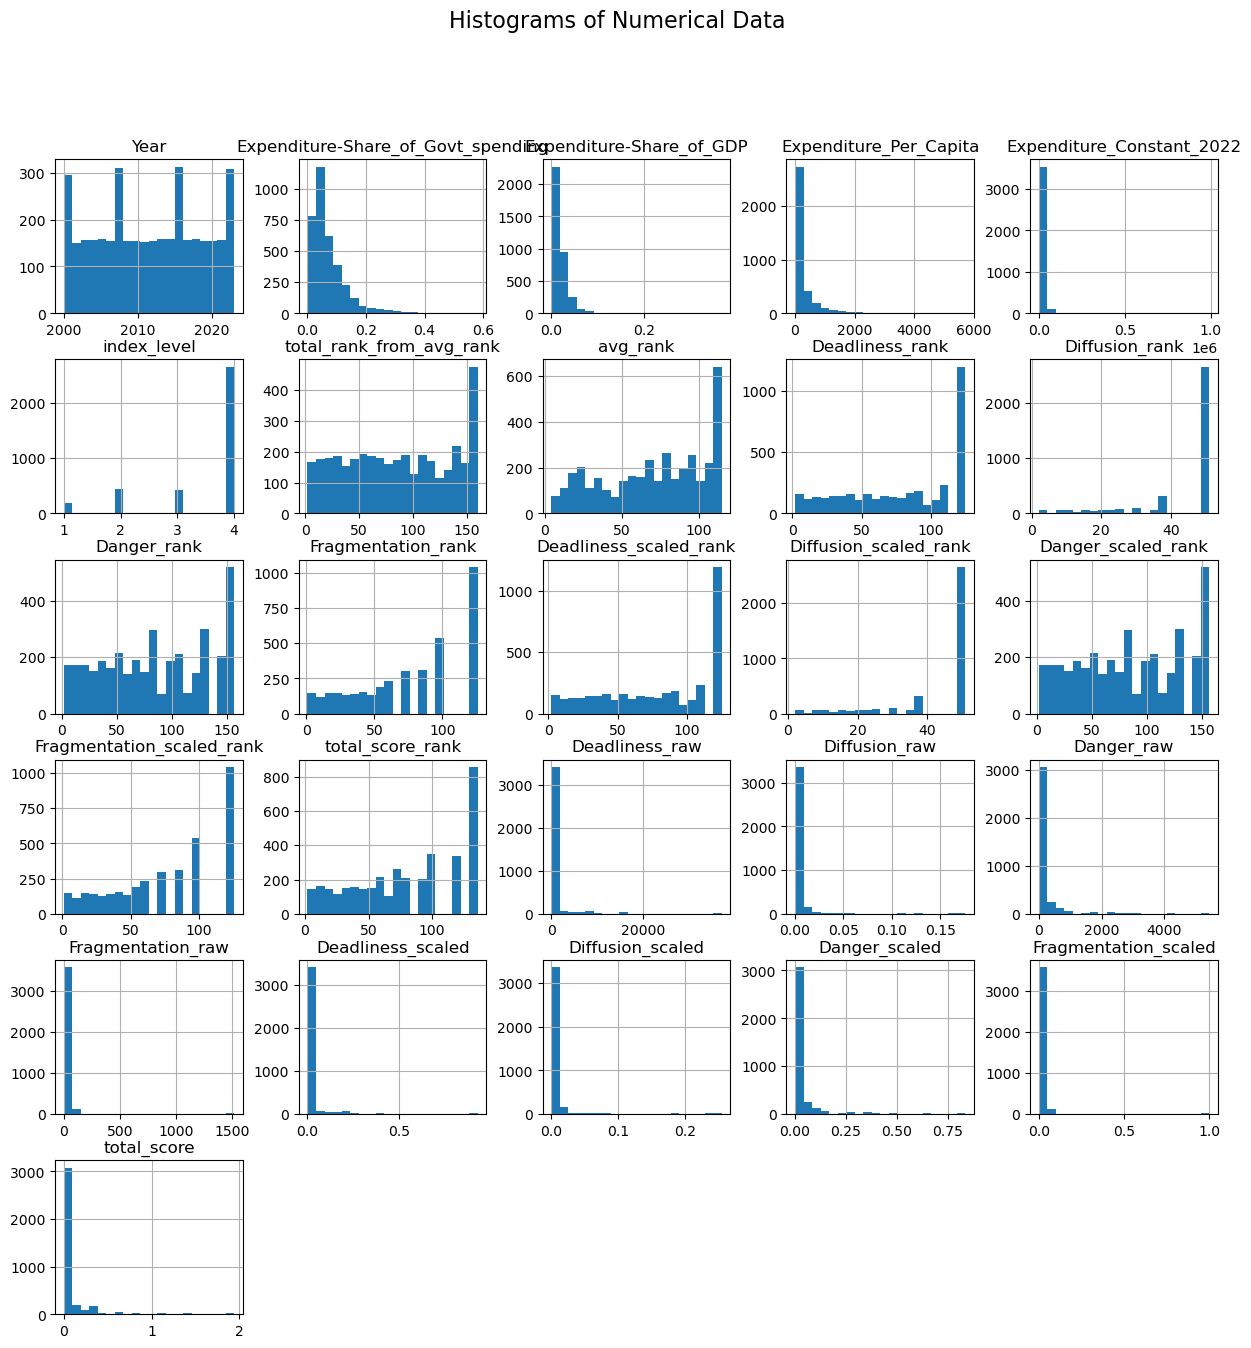

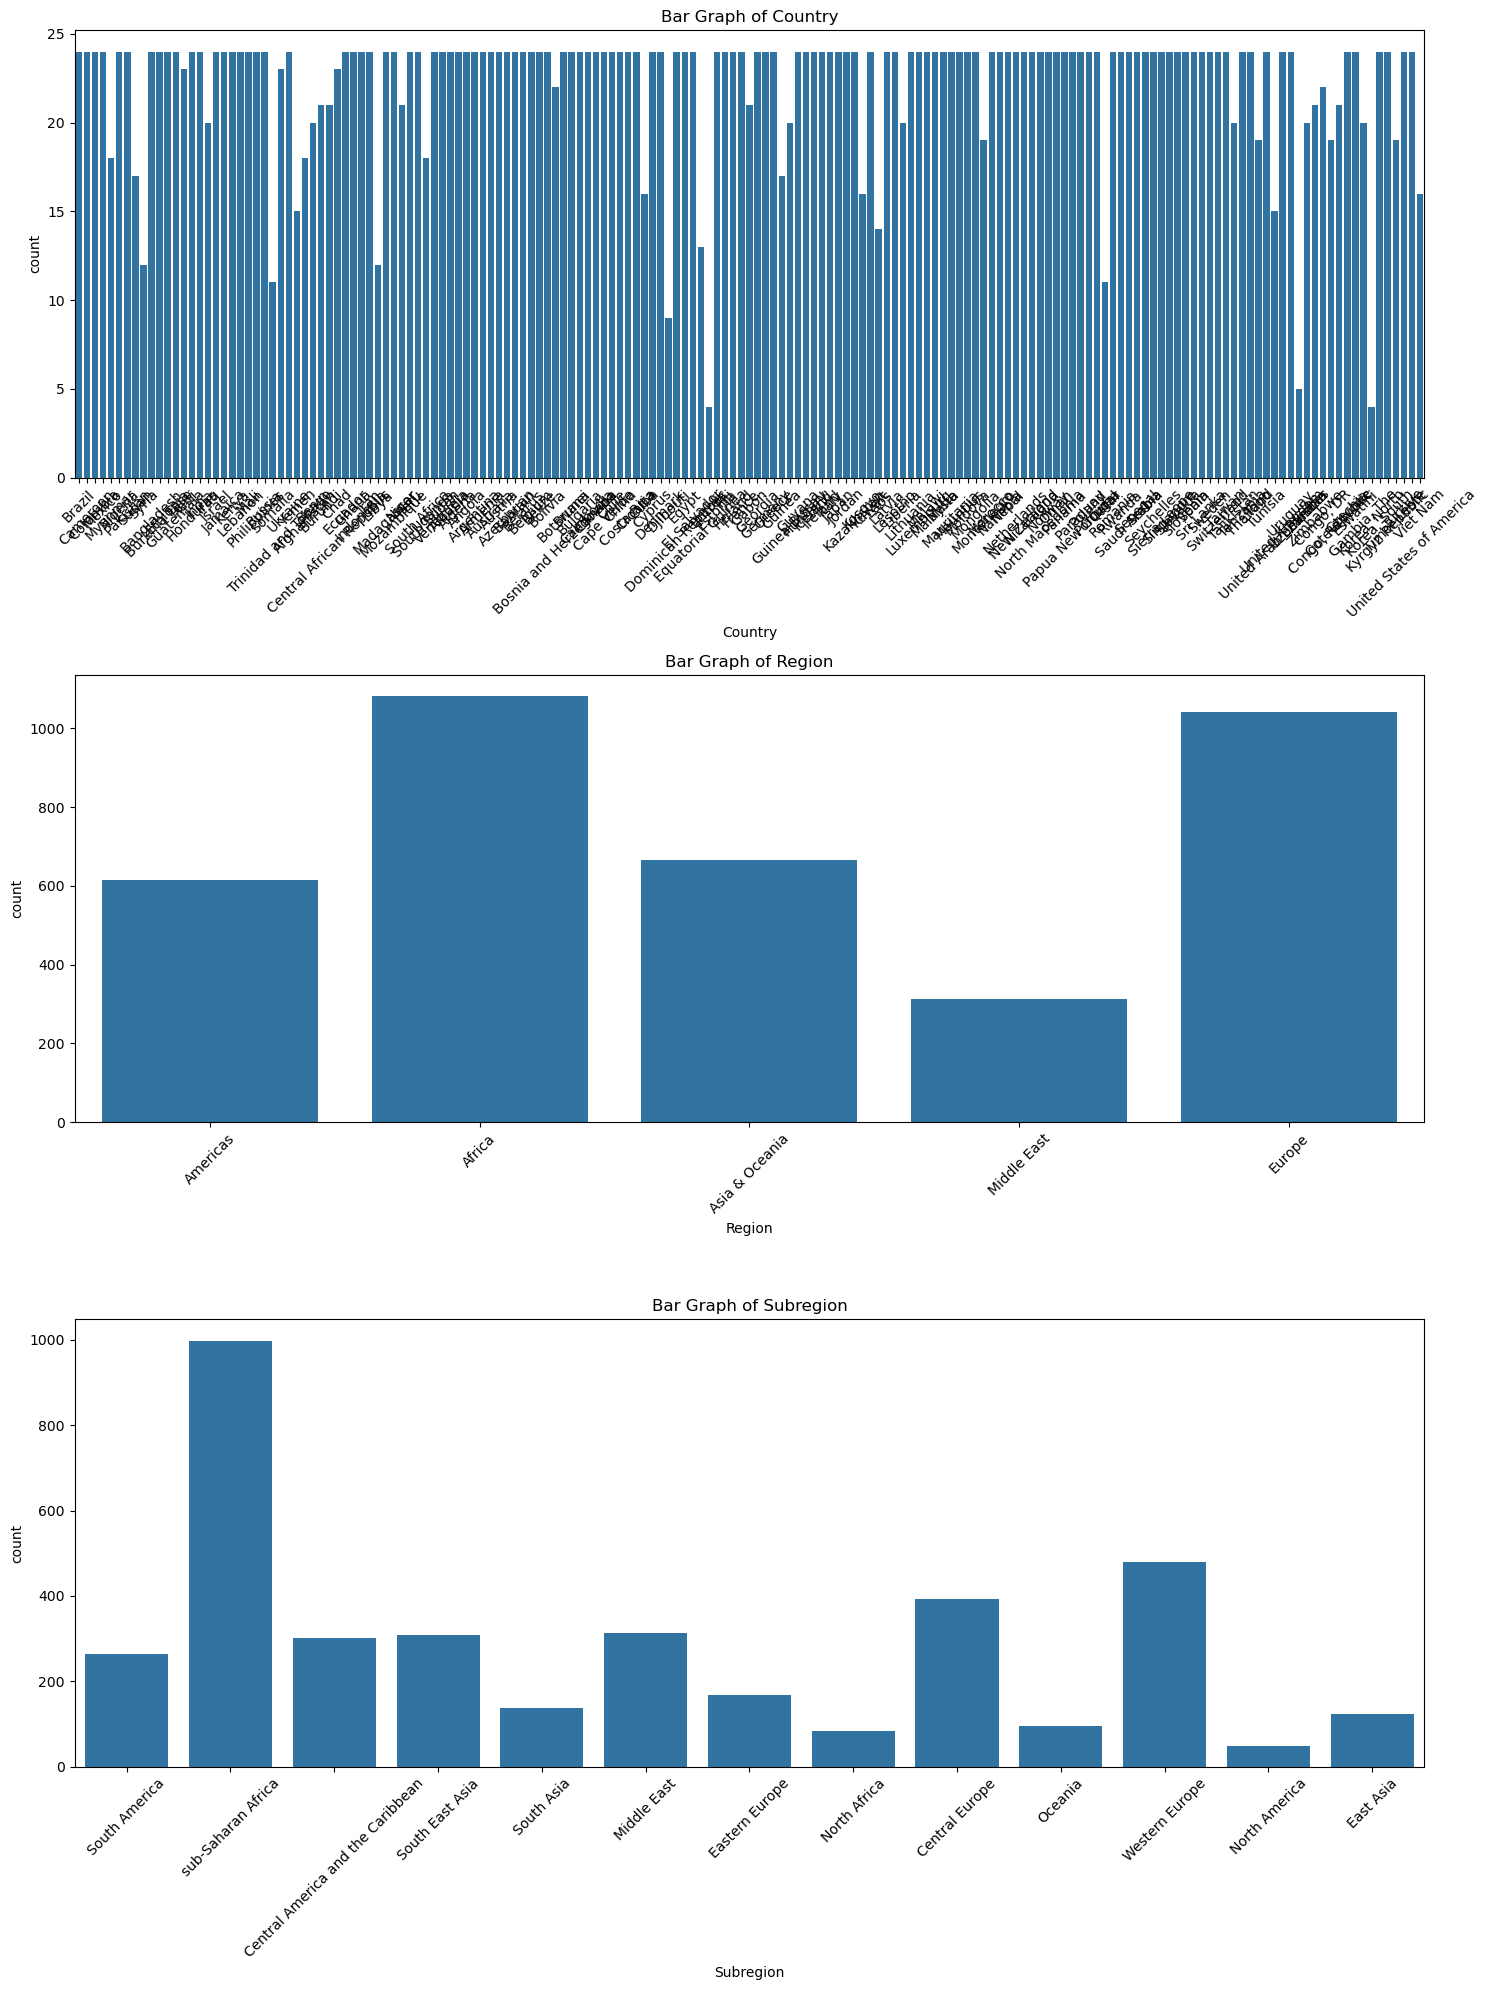

In [436]:
# Plotting histograms for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Data', size=16)
plt.show()

# Plotting bar graphs for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 20))
for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns), 1, i + 1)
    sns.countplot(data=data, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Bar Graph of {column}')

plt.tight_layout()
plt.show()

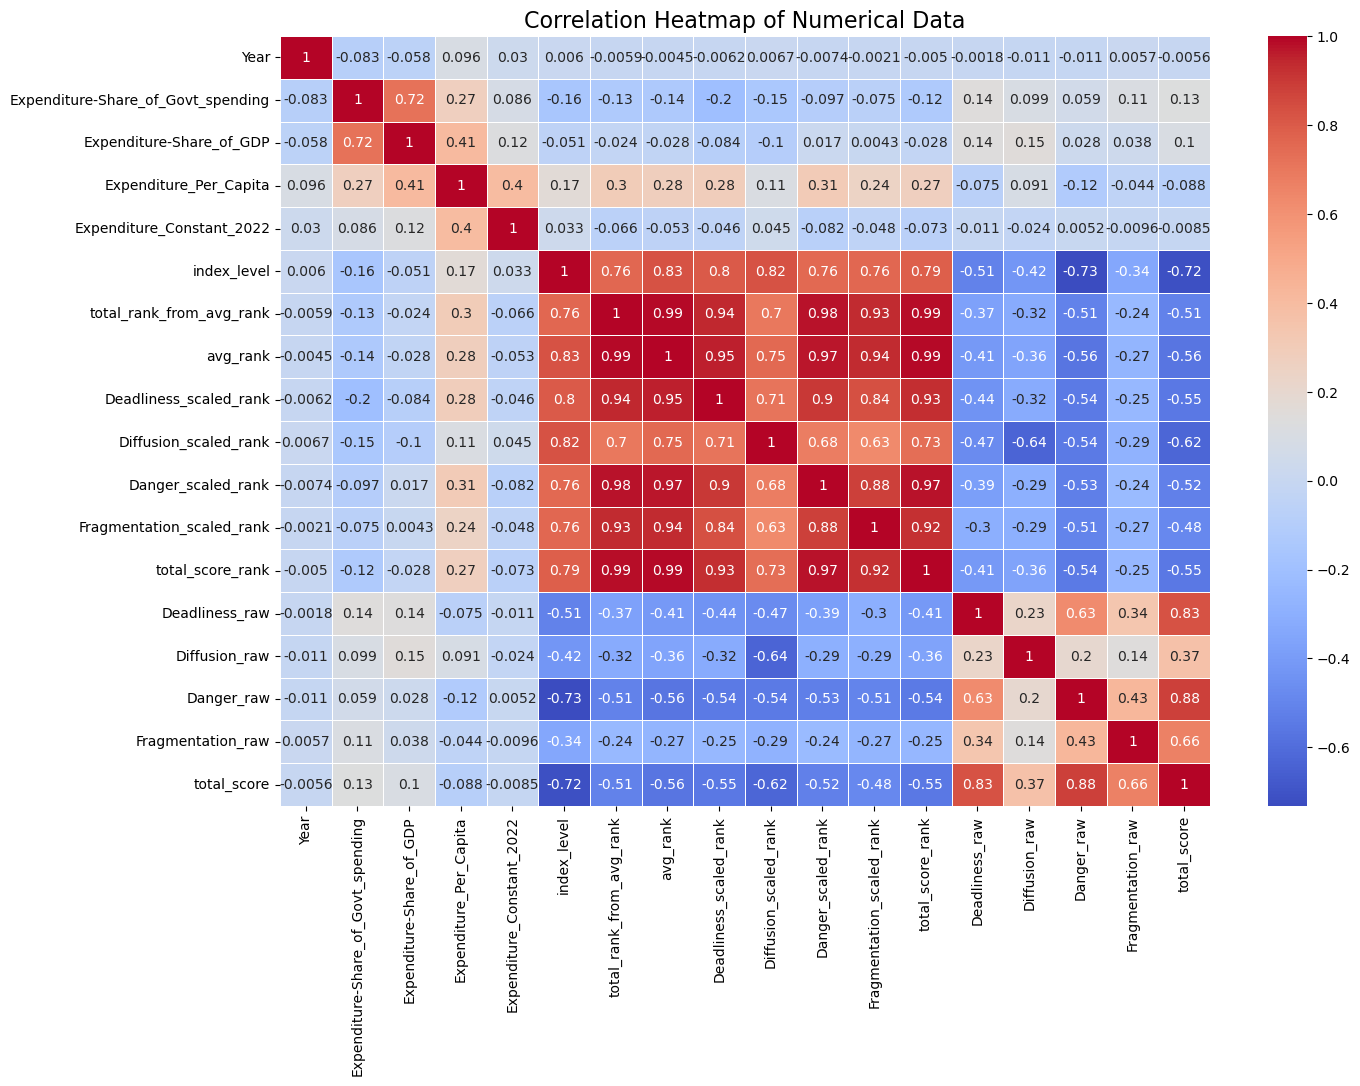

In [437]:
# Generating a correlation heatmap for numerical data
# Calculate the correlation matrix for numerical columns
numerical_columns_cleaned = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numerical_columns_cleaned].corr()

# Plotting the heatmap using seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Data', size=16)
plt.show()

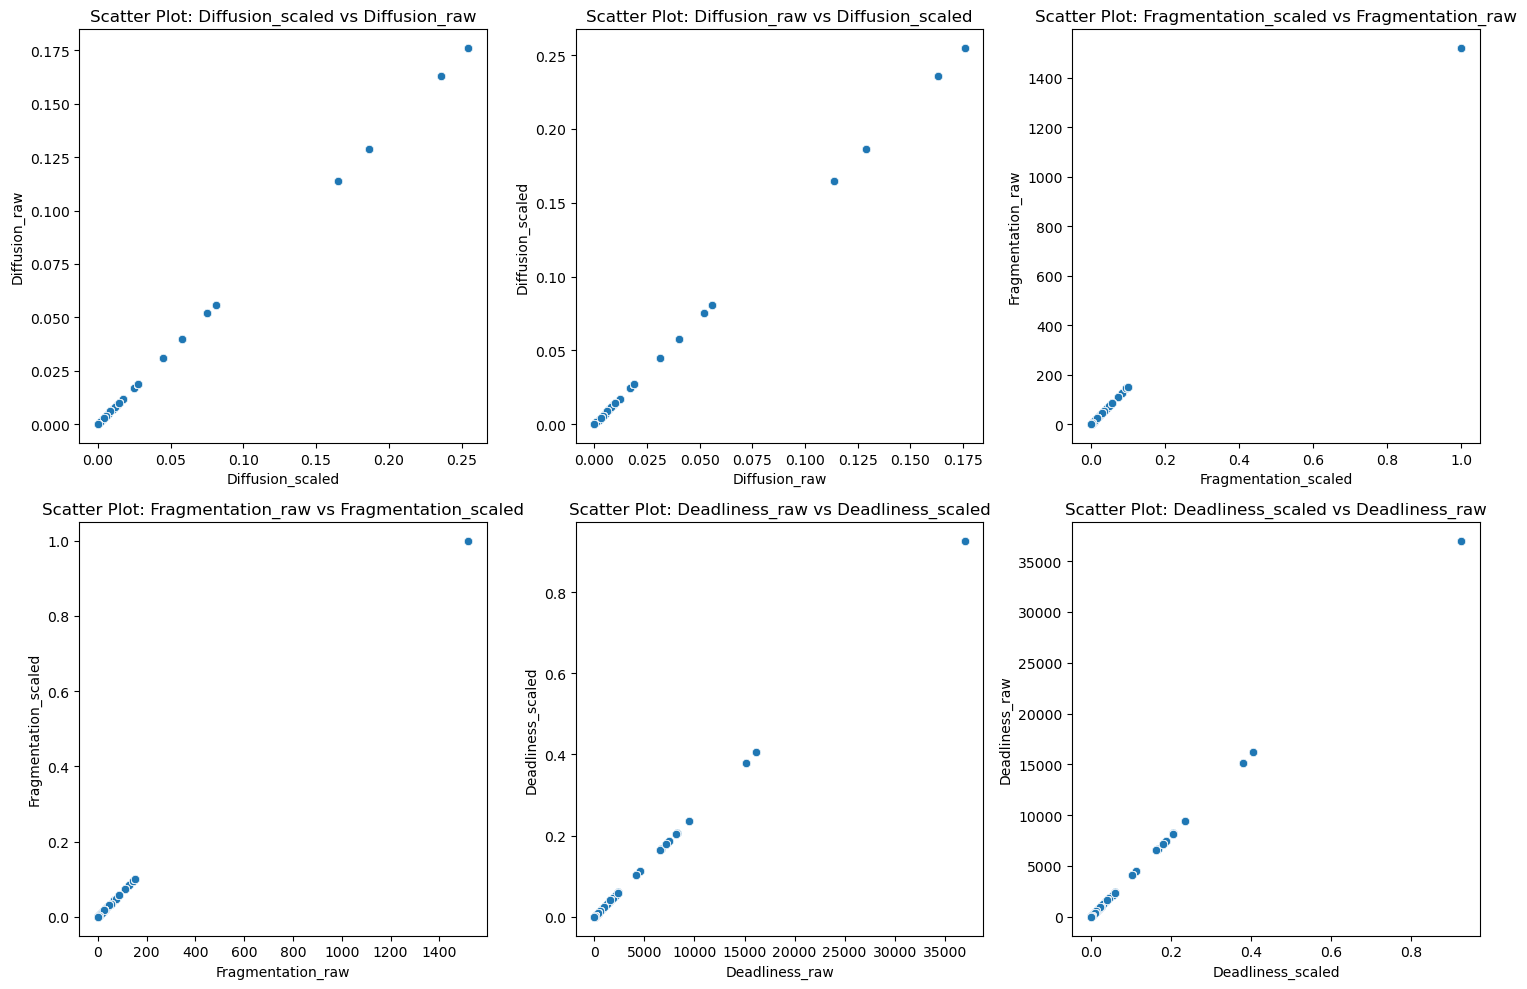

In [438]:
# Identifying highly correlated features (absolute correlation > 0.7)
correlation_matrix = data[numerical_columns].corr()
highly_correlated_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1.0]  
# Exclude self-correlation

# Get the top correlated pairs
top_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs > 0.7].index

# Plotting scatter plots for highly correlated feature pairs
plt.figure(figsize=(15, 10))
plot_index = 1
for (feature1, feature2) in top_correlated_pairs:
    if plot_index > 6:  # Limit the number of scatter plots to display
        break
    plt.subplot(2, 3, plot_index)
    sns.scatterplot(data=data, x=feature1, y=feature2)
    plt.title(f'Scatter Plot: {feature1} vs {feature2}')
    plot_index += 1

plt.tight_layout()
plt.show()

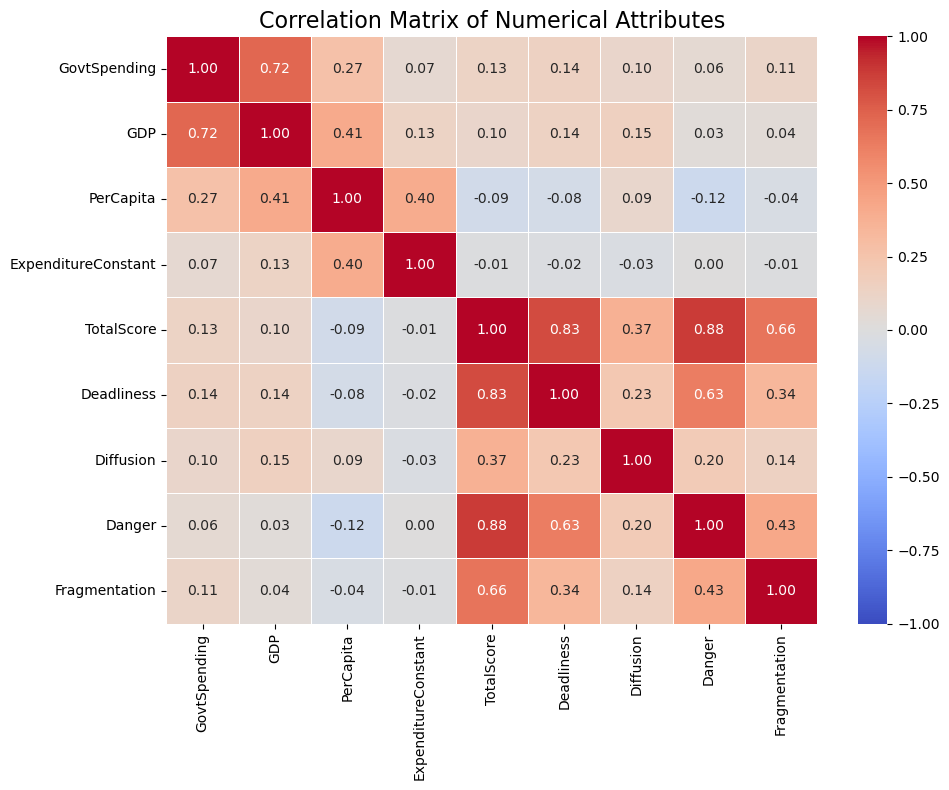

In [439]:
# Updating the numerical_columns list with the new names
numerical_columns = list(column_rename_map.values())

# Calculate the correlation matrix
correlation_matrix = data_for_clustering[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", \
            vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Attributes", fontsize=16)
plt.tight_layout()
plt.show()

1. **Strong Correlations**
    - Danger vs TotalScore
        - Correlation: Strong positive correlation (0.88).
        - Interpretation: Countries with higher levels of danger to civilians (Danger) strongly correlate with higher composite conflict scores (TotalScore). This suggests that the level of danger is a dominant factor influencing overall conflict severity.
    - GovtSpending vs GDP
        - Correlation: Strong positive correlation.
        - Interpretation: A higher share of government spending (GovtSpending) strongly aligns with a higher share of GDP (GDP) allocated to defense/security. This reflects consistent prioritization of military spending within government budgets and national economies.

1. **Moderate Correlations**
    - PerCapita vs ExpenditureConstant
        - Correlation: Moderate positive correlation (0.40).
        - Interpretation: Total expenditures (ExpenditureConstant) moderately influence expenditures per capita (PerCapita). Variations in per capita values are also significantly affected by population size, limiting the strength of this relationship.
    - Deadliness vs Diffusion
        - Correlation: Moderate positive correlation.
        - Interpretation: Geographic spread of conflicts (Diffusion) moderately aligns with conflict severity in terms of fatalities (Deadliness). This suggests that more severe conflicts tend to extend to broader areas.
    - Fragmentation vs TotalScore
        - Correlation: Moderate positive correlation.
        - Interpretation: Countries with higher fragmentation of armed groups (Fragmentation) tend to exhibit higher composite conflict severity scores (TotalScore). This highlights the compounding effect of factionalism on conflict dynamics.

1. **Weak or Negative Correlations**
    - PerCapita vs TotalScore
        - Correlation: Weak negative correlation.
        - Interpretation: Countries with higher defense spending per capita (PerCapita) exhibit little to no reduction in overall conflict severity (TotalScore), suggesting that higher spending does not directly translate to lower conflict.
    - Danger vs GDP
        - Correlation: Weak negative correlation.
        - Interpretation: The level of danger to civilians (Danger) does not align with the proportion of GDP allocated to defense (GDP). This could result from diverse geopolitical strategies or economic limitations.

### Key Insights:
- **Strongly Correlated Features**:
    - GovtSpending and GDP provide similar information, so one of these could be dropped for clustering.
    - Danger and TotalScore are also highly correlated, indicating redundancy for clustering algorithms.
- **Moderately Correlated Features**:
    - Attributes like Deadliness, Diffusion, and Fragmentation contribute additional insights, reflecting nuanced conflict dynamics.
- **Weakly Correlated Features**:
    - Features such as PerCapita add diversity to the clustering process by capturing unique patterns not directly related to conflict metrics.

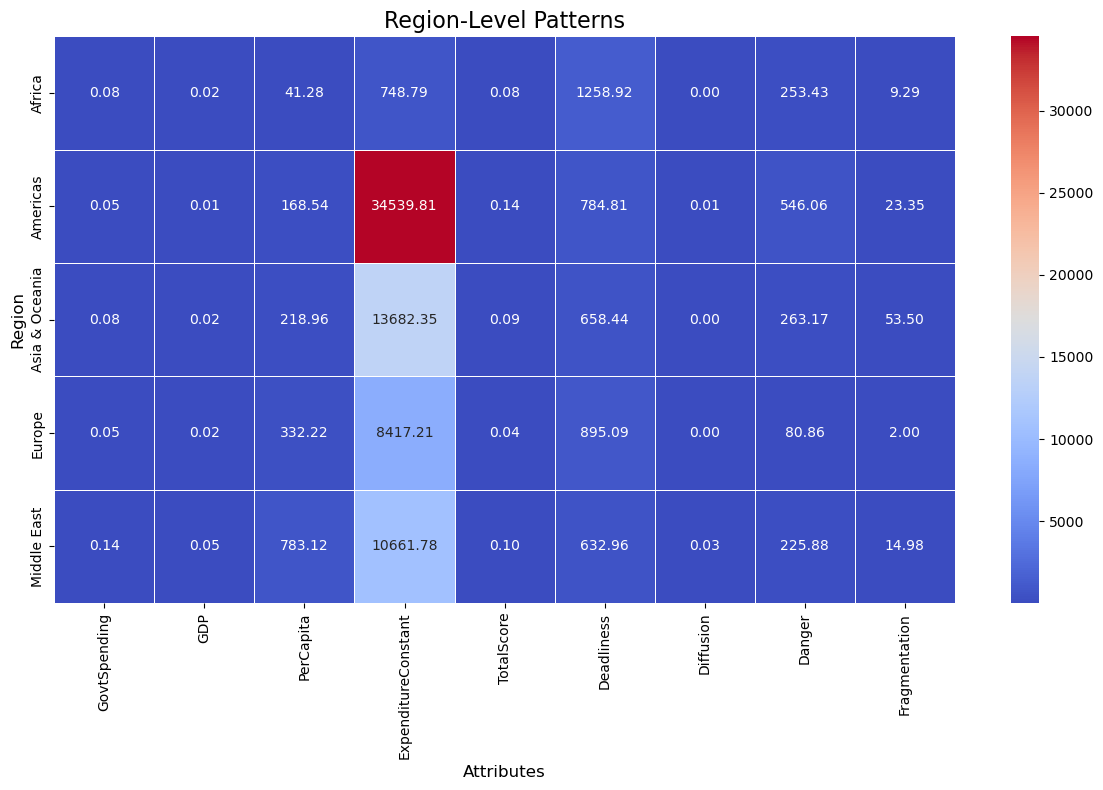

In [440]:
# Calculating the mean of numerical attributes grouped by 'Region' and 'Subregion'
region_patterns = data_for_clustering.groupby("Region")[numerical_columns].mean()
subregion_patterns = data_for_clustering.groupby("Subregion")[numerical_columns].mean()

# Plotting the region-level patterns as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_patterns, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Region-Level Patterns", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Attributes", fontsize=12)
plt.tight_layout()
plt.show()


Looking at this region-level heatmap, We can observe following key insights about the patterns of military expenditure and conflict metrics across regions:

1. **Military Expenditure Patterns**:
    - The Americas shows the highest military expenditure in constant terms (34,539.81), significantly higher than other regions
    - Middle East has relatively high per capita military spending (783.12), suggesting substantial military investment relative to population
    - Africa shows the lowest per capita spending (41.28) despite facing significant security challenges GDP share of military spending is highest in the Middle East (0.05), indicating a greater prioritization of military spending in their economy

1. **Conflict Metrics**:
    - Fragmentation is highest in Asia & Oceania (53.50), suggesting more diverse and complex conflict actors in this region
    - The Americas shows high danger scores (546.06) despite high military spending, indicating that expenditure alone may not guarantee security
    - Africa shows relatively high deadliness scores (1258.92) despite low military expenditure, pointing to severe conflict impacts with limited resources
    - Europe shows the lowest fragmentation (2.00) and relatively low danger scores (80.86), suggesting more stable security conditions

1. **Regional Contrasts**:
    - There's a notable disparity between military spending capacity (highest in Americas) and conflict metrics (high in Africa and Middle East)
    - The Middle East shows consistently high values across multiple metrics, indicating persistent security challenges despite significant military investment
    - Europe demonstrates a pattern of moderate military spending with lower conflict metrics, possibly indicating effective security management

1. **Policy Implications**:
    - The data suggests that higher military spending doesn't necessarily correlate with lower conflict metrics
    Regions with lower economic capacity (like Africa) might benefit from international security cooperation given their high conflict metrics but low spending capability
    - The varying patterns of fragmentation across regions might require different approaches to conflict resolution and peacekeeping.

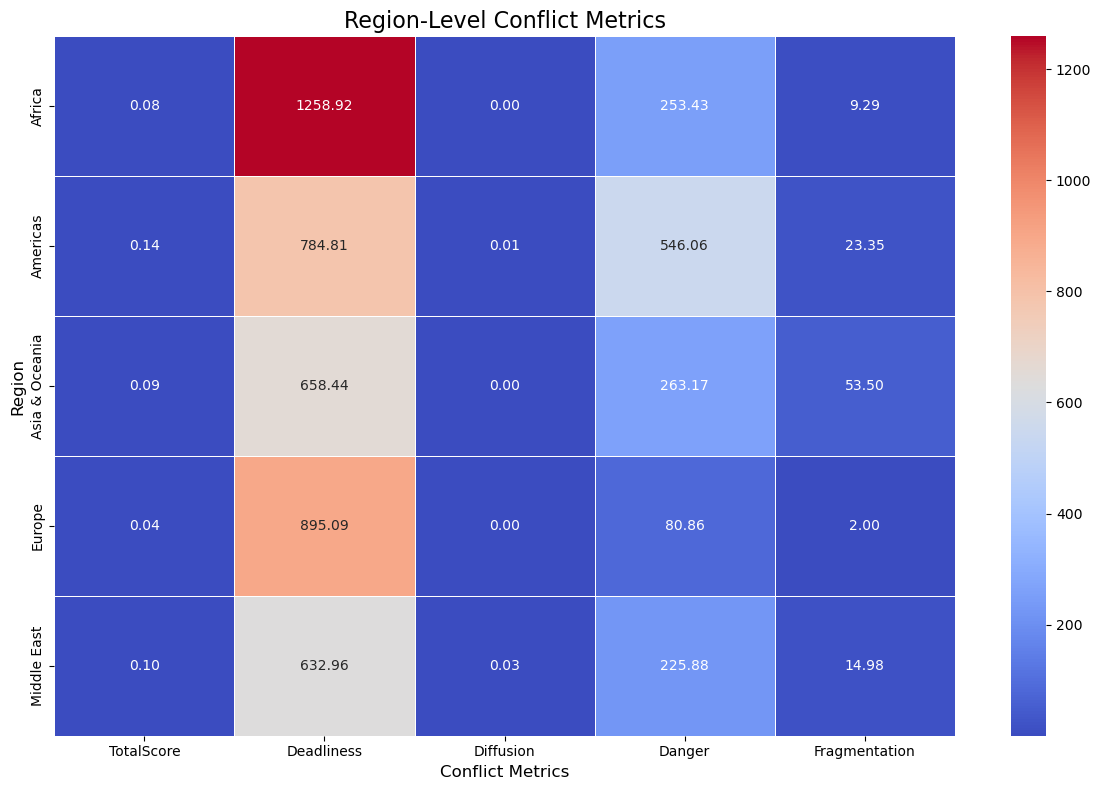

In [441]:
# Recalculating conflict metric averages at the region and subregion levels for a clearer reassessment
conflict_metrics = ["TotalScore", "Deadliness", "Diffusion", "Danger", "Fragmentation"]

# Region-level conflict metrics mean
region_conflict_patterns = data_for_clustering.groupby("Region")[conflict_metrics].mean()

# Subregion-level conflict metrics mean
subregion_conflict_patterns = data_for_clustering.groupby("Subregion")[conflict_metrics].mean()

# Plotting the region-level conflict metrics as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(region_conflict_patterns, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Region-Level Conflict Metrics", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Conflict Metrics", fontsize=12)
plt.tight_layout()
plt.show()


1. **Deadliness Patterns**:
    - Africa stands out with the highest deadliness score (1258.92), significantly higher than all other regions
    - Europe shows relatively high deadliness (895.09), which is somewhat surprising given its general stability
    - The Americas has the third-highest deadliness score (784.81)
    - The Middle East shows the lowest deadliness score (632.96), which is unexpected given its reputation for conflict

1. **Danger Metrics**:
    - The Americas leads in danger scores (546.06), suggesting high risk levels
    - Asia & Oceania shows moderate danger levels (263.17)
    - Africa's danger score (253.43) is relatively high but not the highest
    - Europe has notably low danger scores (80.86), aligning with its reputation for stability
    - The Middle East shows moderate danger levels (225.88)

1. **Fragmentation Analysis**:
    - Asia & Oceania shows the highest fragmentation (53.50), indicating multiple competing conflict actors
    - The Americas has significant fragmentation (23.35)
    - The Middle East shows moderate fragmentation (14.98)
    - Africa has relatively low fragmentation (9.29) despite high deadliness
    - Europe has minimal fragmentation (2.00), suggesting more unified conflict patterns


1. **Total Score and Diffusion**:
    - Total scores are relatively low across all regions (ranging from 0.04 to 0.14)
    - Diffusion rates are minimal across regions (all near 0.00-0.03)
    - The Americas shows slightly higher diffusion (0.01) compared to most regions

### Key Insights:

- There's a clear disconnect between deadliness and other conflict metrics
- Regional conflict patterns are highly varied, with each region showing distinct characteristics
- The traditional perception of conflict-prone regions doesn't always align with the metrics
- Low diffusion rates suggest conflicts tend to remain geographically contained
- High fragmentation doesn't necessarily correlate with high deadliness

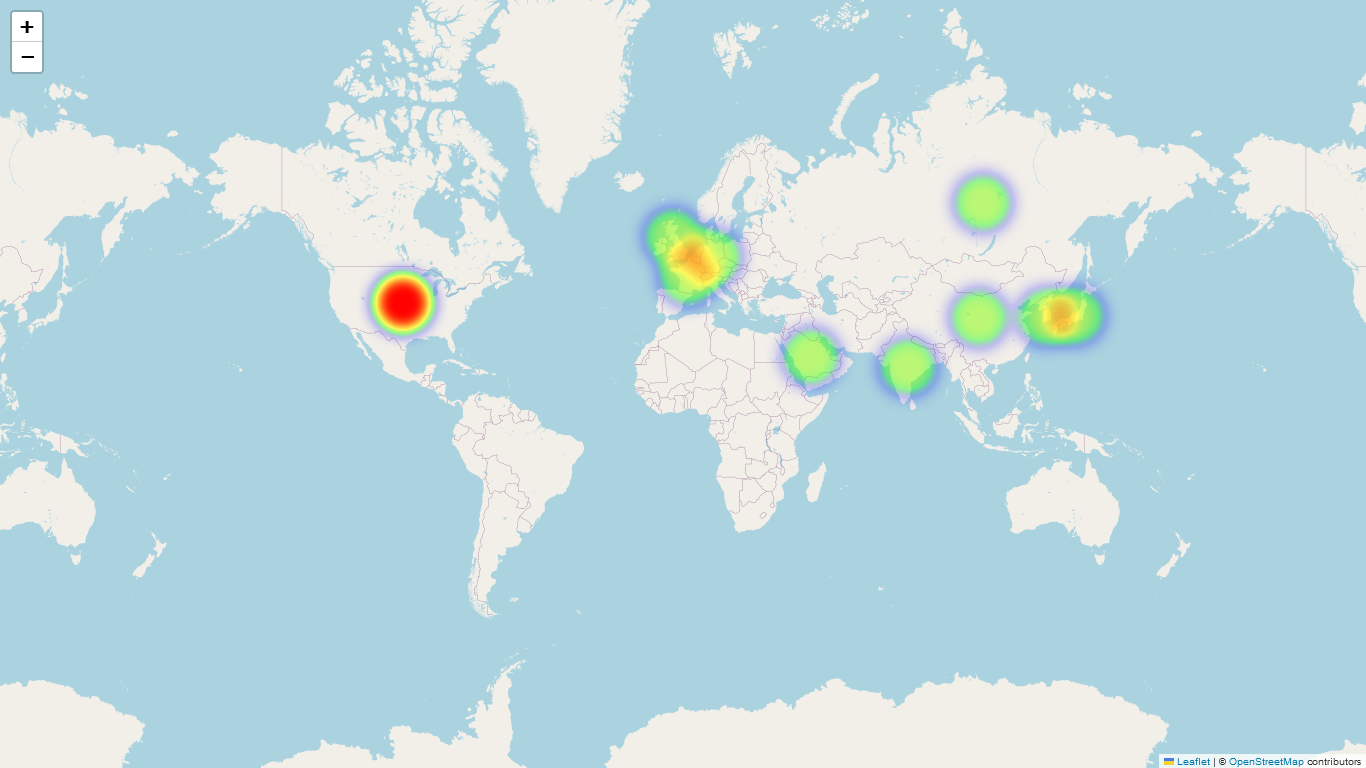

In [442]:
# Ensure aggregation is applied only to numeric columns for countries
numeric_columns = data_for_clustering.select_dtypes(include=['number']).columns
country_summary = data_for_clustering.groupby('Country', as_index=False)[numeric_columns].mean()

# Define exact latitude and longitude for the given top countries
country_coordinates = {
    "United States of America": [39.8283, -98.5795],
    "China": [35.8617, 104.1954],
    "Russia": [61.5240, 105.3188],
    "United Kingdom": [55.3781, -3.4360],
    "Saudi Arabia": [23.8859, 45.0792],
    "India": [20.5937, 78.9629],
    "France": [46.6034, 1.8883],
    "Germany": [51.1657, 10.4515],
    "Japan": [36.2048, 138.2529],
    "Korea, South": [35.9078, 127.7669]
}

# Filter the dataset for the top countries
top_countries = data_for_clustering[data_for_clustering['Country'].isin(country_coordinates.keys())]

# Aggregate the numeric columns for the selected countries
numeric_columns = top_countries.select_dtypes(include=['number']).columns
top_countries_summary = top_countries.groupby('Country', as_index=False)[numeric_columns].mean()

# Add latitude and longitude for the selected countries
top_countries_summary['Latitude'] = top_countries_summary['Country']\
    .map(lambda x: country_coordinates[x][0])
top_countries_summary['Longitude'] = top_countries_summary['Country']\
    .map(lambda x: country_coordinates[x][1])

# Prepare data for the HeatMap layer
heat_data = top_countries_summary[['Latitude', 'Longitude', 'ExpenditureConstant']]\
    .dropna().values.tolist()

# Create a base map
m = folium.Map(location=[15, 0], zoom_start=2, png_enabled=True)

# Add HeatMap for the top countries
HeatMap(heat_data, radius=30, max_zoom=10, gradient={0.2: 'blue', 0.4: 'lime', \
                                                     0.6: 'yellow', 1: 'red'}).add_to(m)

# Add markers for each country
# for _, row in top_countries_summary.iterrows():
#     folium.Marker(
#         location=[row['Latitude'], row['Longitude']],
#         popup=f"Country: {row['Country']}<br>Expenditure: {row['ExpenditureConstant']:.2f}",
#         icon=folium.Icon(color="blue", icon="info-sign")
#     ).add_to(m)
    
m

<a id='modelselection'></a>
## 6. Model Selection:
---

<a id='modelselectionsupervised'></a>
### 1. Supervised Learning

For military expenditure forecasting, the following algorithms will be considered:

1. **Linear Regression**:

    Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It assumes a direct linear relationship between the variables. (Scikit-learn, n.d.-a).

1. **Random Forest Regression**:

    Random forest regression is an ensemble learning method that uses multiple decision trees to predict a target variable. It averages the predictions of individual trees to improve accuracy and reduce overfitting. (Breiman, 2001)

1. **Gradient Boosting Regression**:

    Gradient boosting regression is a machine learning technique that builds an ensemble of weak prediction models (usually decision trees) sequentially. Each model corrects the errors of the previous one, optimizing performance through gradient descent. (Friedman, 2001).


1. **Prophet**:

    Prophet is a forecasting tool developed by Facebook (Meta) designed for time series data. It is effective for data that exhibits seasonality, trends, and irregular patterns and is robust against outliers and missing data. It is easily employed to predict future spending values based on historical data. Prophet primarily focuses on identifying patterns within the data like yearly yyand weekly seasonality and incorporating custom holiday events to improve forecast accuracy; essentially, it fits an additive regression model to capture these components separately, making it particularly useful for data with strong seasonal trends and multiple seasons of historical information. For yearly data, Prophet focuses on detecting and forecasting long-term trends and changes in growth (Meta, XX)

<a id='linearregression'></a>
#### 6.1.1 **Linear Regression**

In [443]:
# Selecting relevant features for forecasting
# We will primarily use 'Year' and 'Expenditure_Constant_2022' for the time-series analysis.
forecast_data = data_cleaned[['Country', 'Year', 'Expenditure_Constant_2022']]

# Sorting the data by Country and Year to prepare for time-series modeling
forecast_data = forecast_data.sort_values(by=['Country', 'Year'])

# Display the prepared data for forecasting
forecast_data.head()

Country  Year  Expenditure_Constant_2022
619  Afghanistan  2004                 183.648324
620  Afghanistan  2005                 165.378054
621  Afghanistan  2006                 167.189480
622  Afghanistan  2007                 257.366345
623  Afghanistan  2008                 224.292155

In [444]:
# Split the data into training and testing sets for each country
# We will create a dictionary to hold the train-test split for each country
countries = forecast_data['Country'].unique()
train_test_data = {}

for country in countries:
    country_data = forecast_data[forecast_data['Country'] == country]
    X = country_data[['Year']]
    y = country_data['Expenditure_Constant_2022']
    
    # Split the data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    train_test_data[country] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# Display the train-test split information for a sample country
sample_country = countries[37]
print(sample_country)
train_test_data[sample_country]

Cuba


{'X_train':       Year
 1587  2003
 1588  2004
 1589  2005
 1590  2006
 1591  2007
 1592  2008
 1593  2009
 1594  2010
 1595  2011
 1596  2012
 1597  2013
 1598  2014,
 'X_test':       Year
 1599  2015
 1600  2016
 1601  2017
 1602  2018,
 'y_train': 1587    1290.519382
 1588    1290.519382
 1589    1290.519382
 1590    1290.519382
 1591    1290.519382
 1592    1290.519382
 1593    1290.519382
 1594    1290.519382
 1595    1290.519382
 1596    1290.519382
 1597    1290.519382
 1598    1290.519382
 Name: Expenditure_Constant_2022, dtype: float64,
 'y_test': 1599    1290.519382
 1600    1290.519382
 1601    1290.519382
 1602    1290.519382
 Name: Expenditure_Constant_2022, dtype: float64}

In [445]:
# Initialize a dictionary to store the models for each country
models = {}

# Train a Linear Regression model for each country
for country in countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Store the trained model
    models[country] = model

# Forecast the next 5 and 10 years for each country using the trained models
forecast_years_5 = pd.DataFrame({'Year': np.arange(2022, 2027)})
forecast_years_10 = pd.DataFrame({'Year': np.arange(2022, 2032)})

# Create a dictionary to store forecasts for each country
forecasts = {}
for country in countries:
    # Use the trained model to make predictions for the next 5 and 10 years
    model = models[country]
    forecast_5 = model.predict(forecast_years_5)
    forecast_10 = model.predict(forecast_years_10)
  
    forecasts[country] = {
        '5_year_forecast': forecast_5,
        '10_year_forecast': forecast_10
    }
# Display the forecast for the first country as a sample
forecasts[sample_country]

{'5_year_forecast': array([1290.519382, 1290.519382, 1290.519382, 1290.519382, 1290.519382]),
 '10_year_forecast': array([1290.519382, 1290.519382, 1290.519382, 1290.519382, 1290.519382,
        1290.519382, 1290.519382, 1290.519382, 1290.519382, 1290.519382])}

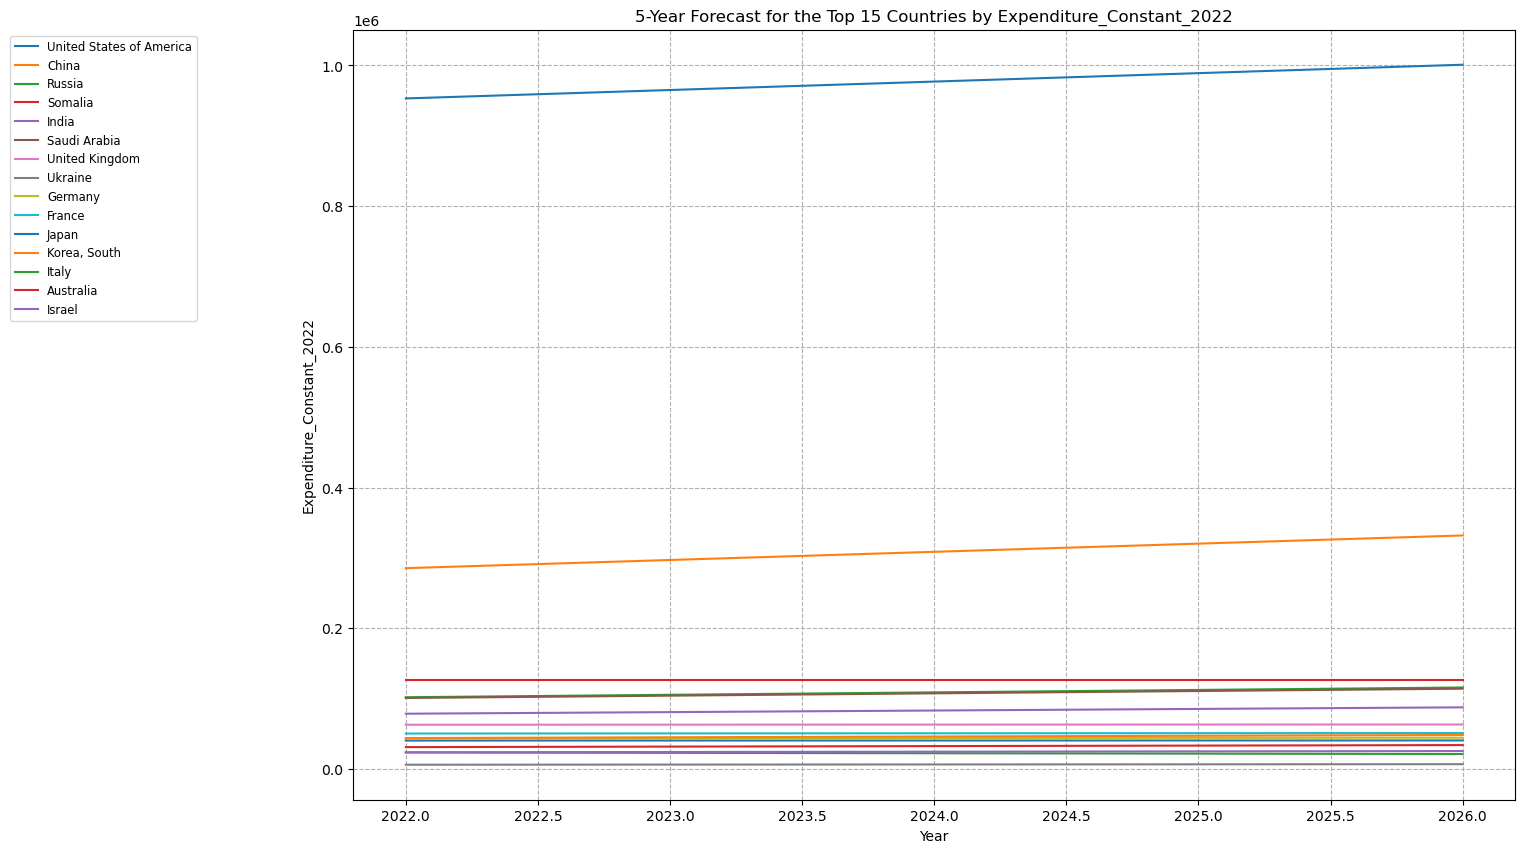

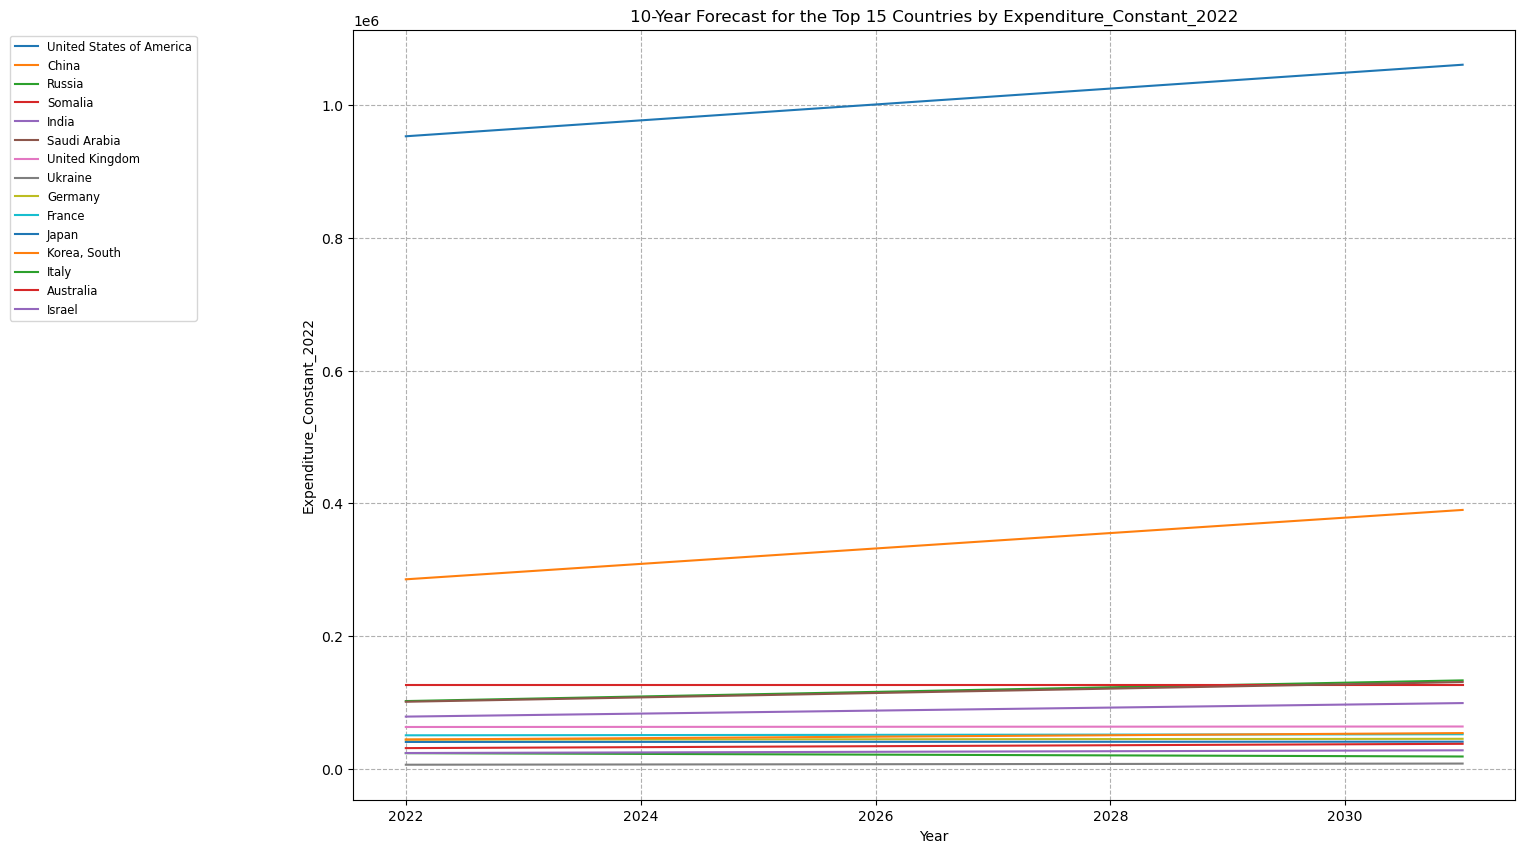

In [446]:

# Get the most recent "Expenditure_Constant_2022" for each country
latest_expenditure = forecast_data.sort_values(['Country', 'Year'])\
    .groupby('Country').last()['Expenditure_Constant_2022']

# Sort and select the top 15 countries
top_15_countries = latest_expenditure.sort_values(ascending=False).head(15).index

# Plotting the 5-year forecast for the top 15 countries
plt.figure(figsize=(15, 10))
for country in top_15_countries:
    years = np.arange(2022, 2027)
    expenditure_forecast = forecasts[country]['5_year_forecast']
    plt.plot(years, expenditure_forecast, label=country)

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('5-Year Forecast for the Top 15 Countries by Expenditure_Constant_2022')
plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

# Plotting the 10-year forecast for the top 15 countries
plt.figure(figsize=(15, 10))
for country in top_15_countries:
    years = np.arange(2022, 2032)
    expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(years, expenditure_forecast, label=country)

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('10-Year Forecast for the Top 15 Countries by Expenditure_Constant_2022')
plt.legend(loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

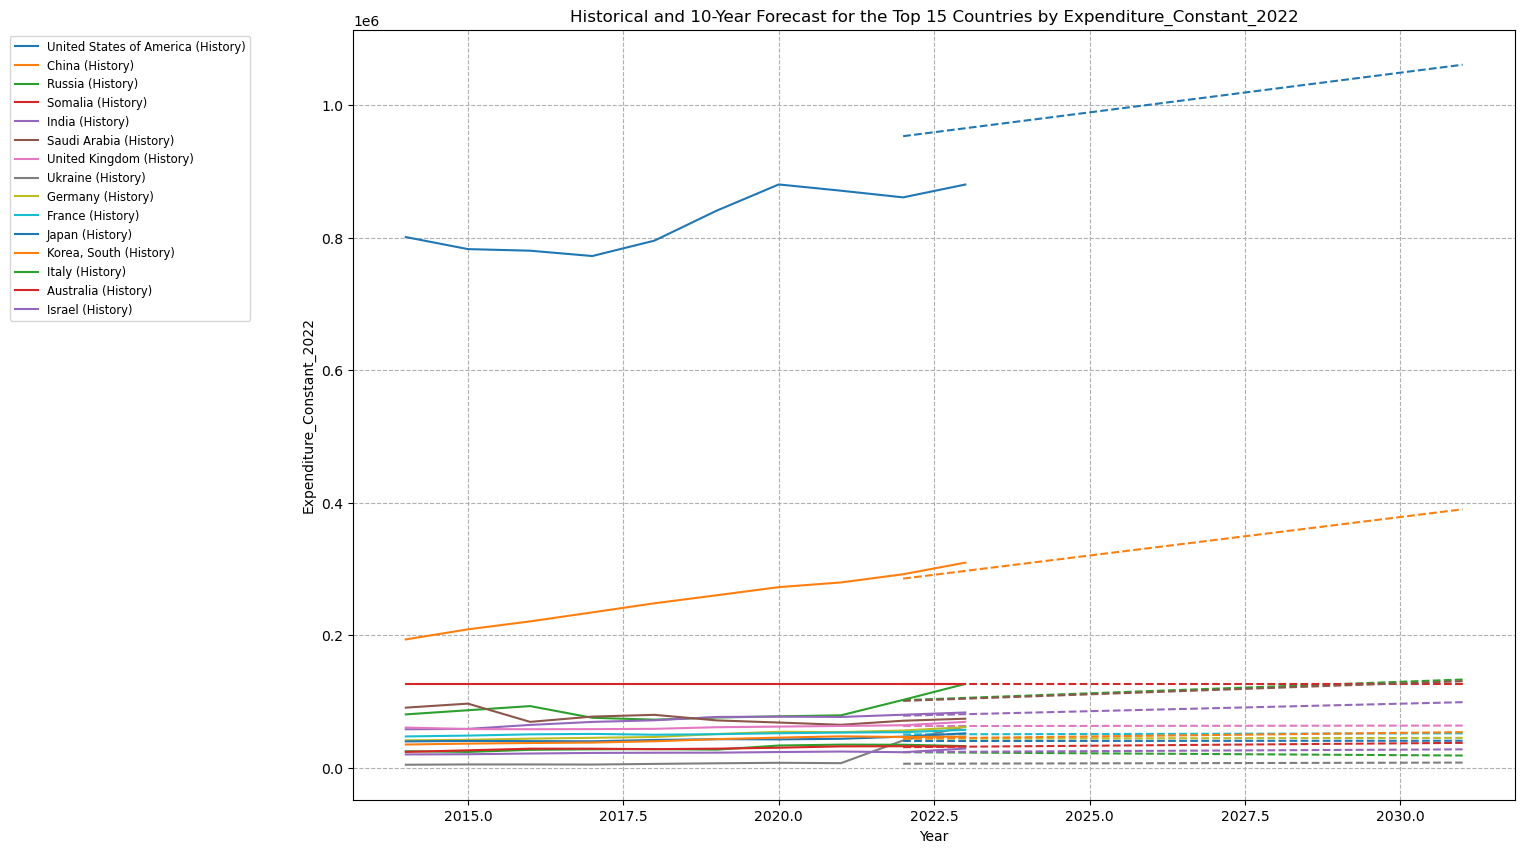

In [447]:
# Sort the top 15 countries by the most recent expenditure level for legend ranking
latest_expenditure_sorted = latest_expenditure[top_15_countries].sort_values(ascending=False)

plt.figure(figsize=(15, 10))

country_lines = []

for country in latest_expenditure_sorted.index:
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the forecast for the next 10 years with a dashed line, using the same color
    plt.plot(
        np.arange(2022, 2032), forecasts[country]['10_year_forecast'], 
        linestyle='--', color=historical_line.get_color(), label=f'{country} (Forecast)'
    )
    
    # Store reference for legend sorting
    country_lines.append((country, historical_line))

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in \
                         sorted(country_lines, key=lambda x: latest_expenditure_sorted[country], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical and 10-Year Forecast for the Top 15 Countries by Expenditure_Constant_2022')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

In [448]:
# Displaying the formulas (coefficients and intercepts) of the Linear Regression models for each country

# Store the forecast formulas for each of the top 15 countries
forecast_formulas = {}

for country in top_15_countries:
    # Extract the model for the current country
    model = models[country]
    
    # Get the coefficient (slope) and intercept of the linear regression model
    coefficient = model.coef_[0]
    intercept = model.intercept_
    
    # Store the formula
    forecast_formulas[country] = f"Expenditure_Constant_2022 = {coefficient:.2f} * Year + {intercept:.2f}"

# Display the forecast formulas for the top 15 countries
forecast_formulas

{'United States of America': 'Expenditure_Constant_2022 = 11981.00 * Year + -23272546.56',
 'China': 'Expenditure_Constant_2022 = 11618.69 * Year + -23207588.84',
 'Russia': 'Expenditure_Constant_2022 = 3464.69 * Year + -6903680.88',
 'Somalia': 'Expenditure_Constant_2022 = 0.00 * Year + 126473.35',
 'India': 'Expenditure_Constant_2022 = 2265.94 * Year + -4503217.61',
 'Saudi Arabia': 'Expenditure_Constant_2022 = 3301.45 * Year + -6574677.22',
 'United Kingdom': 'Expenditure_Constant_2022 = 81.02 * Year + -100966.65',
 'Ukraine': 'Expenditure_Constant_2022 = 194.25 * Year + -386780.27',
 'Germany': 'Expenditure_Constant_2022 = 135.10 * Year + -229344.53',
 'France': 'Expenditure_Constant_2022 = 174.92 * Year + -303368.71',
 'Japan': 'Expenditure_Constant_2022 = 43.12 * Year + -46864.64',
 'Korea, South': 'Expenditure_Constant_2022 = 1086.85 * Year + -2153701.90',
 'Italy': 'Expenditure_Constant_2022 = -558.10 * Year + 1151893.60',
 'Australia': 'Expenditure_Constant_2022 = 719.24 * Yea

<a id='randomforestregression'></a>
#### 6.1.2 **Random Forest Regression**

In [449]:
# Initialize a dictionary to store the Random Forest models for each country
rf_models = {}

# Train a Random Forest Regressor for each country
for country in top_15_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Store the trained model
    rf_models[country] = rf_model

# Forecast the next 10 years for each country using the trained Random Forest models
rf_forecasts = {}

for country in top_15_countries:
    # Use the trained model to make predictions for the next 10 years
    rf_model = rf_models[country]
    forecast_10 = rf_model.predict(forecast_years_10)
    
    rf_forecasts[country] = {
        '10_year_forecast': forecast_10
    }

# Display the forecast for one of the top 15 countries
sample_country = top_15_countries[0]
rf_forecasts[sample_country]

{'10_year_forecast': array([789481.619213, 789481.619213, 789481.619213, 789481.619213,
        789481.619213, 789481.619213, 789481.619213, 789481.619213,
        789481.619213, 789481.619213])}

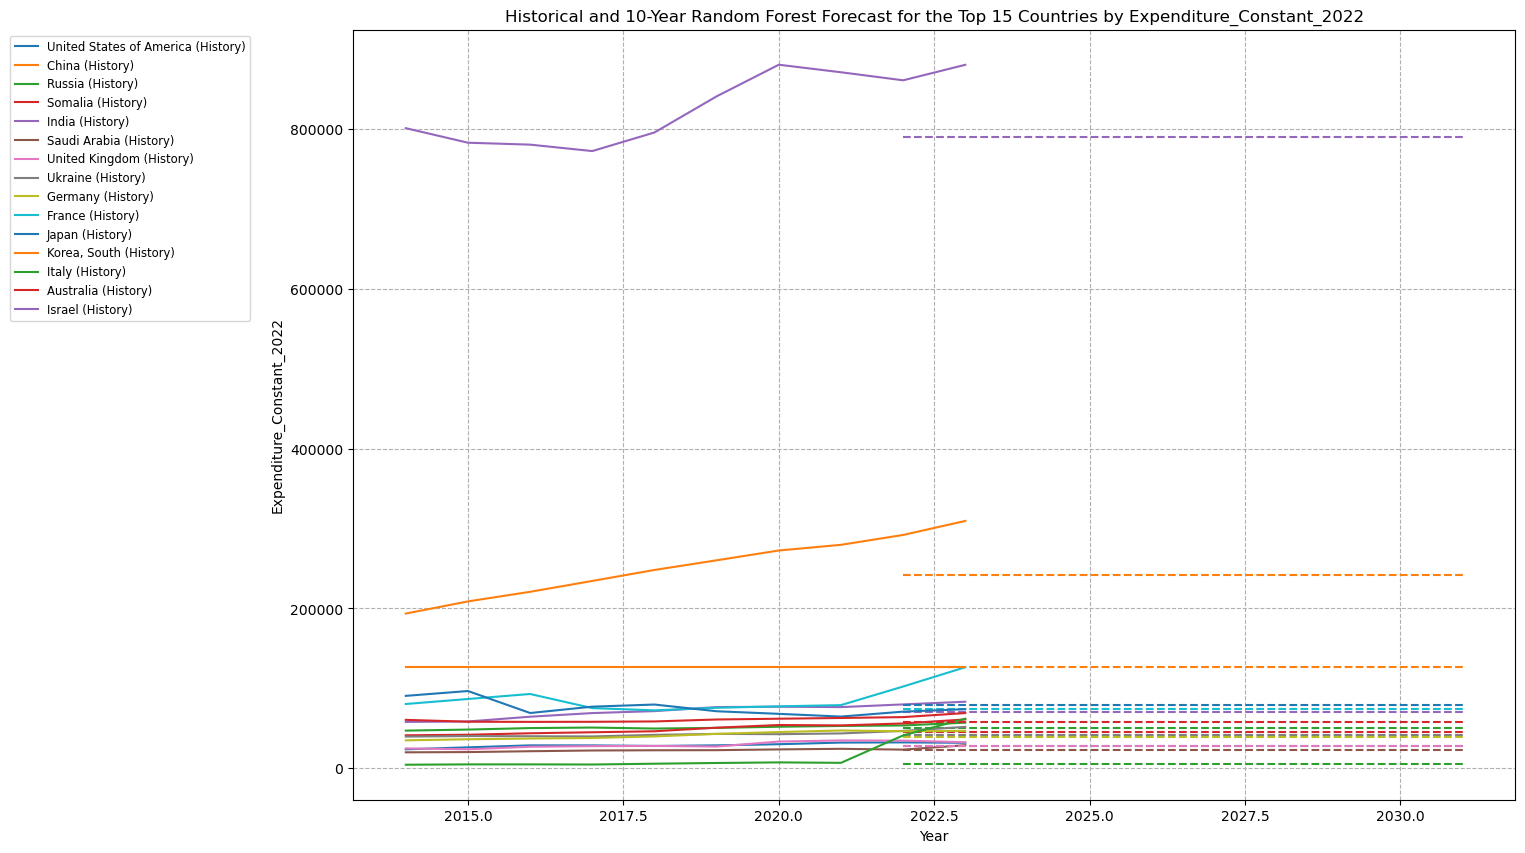

In [450]:
# Plotting the historical data (last 10 years) and the 10-year Random Forest 
# forecast for the top 15 countries with consistent colors

plt.figure(figsize=(15, 10))

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dashed line, using the same color
    forecast_years = np.arange(2022, 2032)
    expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, expenditure_forecast, linestyle='--', \
            color=historical_line.get_color(), label=f'{country} (RF Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in \
                         sorted(country_lines, key=lambda x: latest_expenditure_sorted[x[0]], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical and 10-Year Random Forest Forecast for the Top 15 Countries by Expenditure_Constant_2022')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

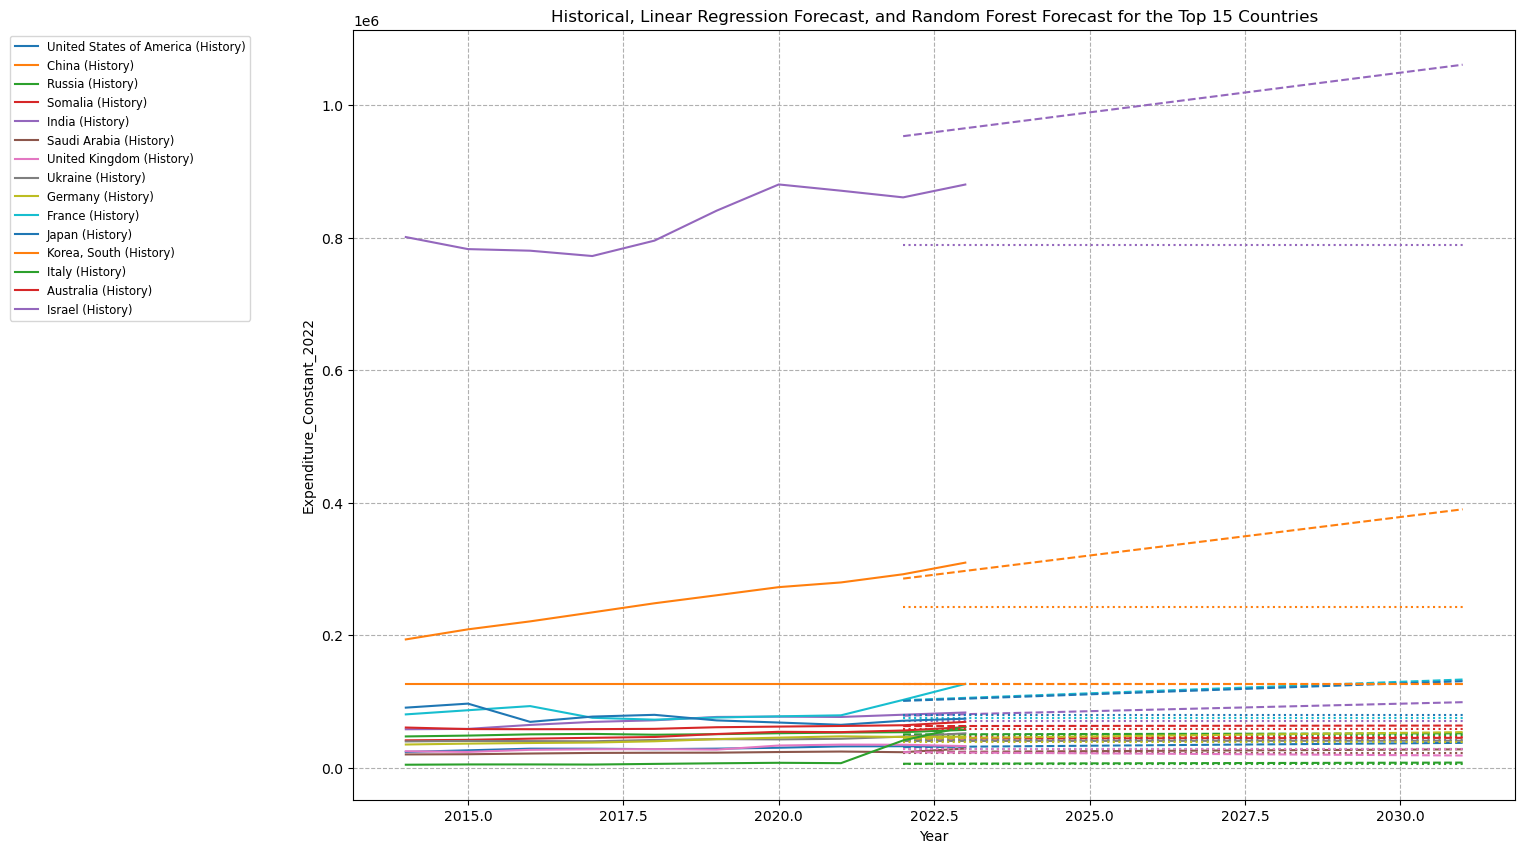

In [451]:
# Plotting the historical data, Linear Regression forecast, and Random Forest 
# forecast for the top 15 countries with consistent colors

plt.figure(figsize=(15, 10))

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the Linear Regression forecast for the next 10 years with a dashed line
    linear_forecast_years = np.arange(2022, 2032)
    linear_expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(
        linear_forecast_years, linear_expenditure_forecast, linestyle='--', color=historical_line.get_color(), 
        label=f'{country} (Linear Forecast)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dotted line
    rf_expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        linear_forecast_years, rf_expenditure_forecast, linestyle=':', color=historical_line.get_color(), 
        label=f'{country} (RF Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in \
                         sorted(country_lines, key=lambda x: latest_expenditure_sorted[x[0]], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical, Linear Regression Forecast, and Random Forest Forecast for the Top 15 Countries')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

In [452]:
# Prepare a list to store the summary of the Random Forest model's intercept 
# (using the mean), coefficient approximation (feature importance), and R^2 for each country
rf_model_summary = []

# Calculate the intercept (mean value), approximate coefficient, and R^2 score for each of the top 15 countries
for country in top_15_countries:
    # Extract the Random Forest model and train-test data for the current country
    rf_model = rf_models[country]
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Calculate the intercept as the mean of the target value
    intercept = y_train.mean()
    
    # Approximate the "coefficient" as feature importance (since Random Forest doesn't directly provide coefficients)
    feature_importance = rf_model.feature_importances_[0]
    
    # Calculate the R^2 score on the test data
    y_pred = rf_model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    
    # Append the summary to the list
    rf_model_summary.append({
        'Country': country,
        'Approximate Coefficient (Feature Importance)': feature_importance,
        'Intercept (Mean Value)': intercept,
        'R^2 Score': r_squared
    })

# Create a DataFrame to display the model summary
rf_model_summary_df = pd.DataFrame(rf_model_summary)

rf_model_summary_df


Country  Approximate Coefficient (Feature Importance)  \
0   United States of America                                           1.0   
1                      China                                           1.0   
2                     Russia                                           1.0   
3                    Somalia                                           0.0   
4                      India                                           1.0   
5               Saudi Arabia                                           1.0   
6             United Kingdom                                           1.0   
7                    Ukraine                                           1.0   
8                    Germany                                           1.0   
9                     France                                           1.0   
10                     Japan                                           1.0   
11              Korea, South                                           1.0   
12                     Italy                                           1.0   
13                 Australia                                           1.0   
14                    Israel                                           1.0   

    Intercept (Mean Value)  R^2 Score  
0            797284.510632 -27.102278  
1            134350.906012  -5.880555  
2             56886.987055  -0.794920  
3            126473.354300   0.000000  
4             49049.911387 -10.619484  
5             57943.995012  -8.238869  
6             61806.560849  -3.584137  
7              3475.918031  -0.720477  
8             42074.764294  -7.560721  
9             48054.356989  -2.222828  
10            39764.717082  -1.605633  
11            29782.014937 -19.531874  
12            30678.855325  -2.944354  
13            21684.055534  -4.445582  
14            17716.323664  -1.030049

In [453]:
# Prepare a list to store the comparison of R^2 scores for Linear Regression and Random Forest for each country
model_comparison = []

# Calculate the R^2 score for each of the top 15 countries for both Linear Regression and Random Forest models
for country in top_15_countries:
    # Extract train-test data for the current country
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Linear Regression R^2 Score
    linear_model = models[country]
    y_pred_linear = linear_model.predict(X_test)
    r_squared_linear = r2_score(y_test, y_pred_linear)
    
    # Random Forest R^2 Score
    rf_model = rf_models[country]
    y_pred_rf = rf_model.predict(X_test)
    r_squared_rf = r2_score(y_test, y_pred_rf)
    
    # Append the comparison to the list
    model_comparison.append({
        'Country': country,
        'Linear R^2 Score': r_squared_linear,
        'Random Forest R^2 Score': r_squared_rf
    })

# Create a DataFrame to display the model comparison
model_comparison_df = pd.DataFrame(model_comparison)

model_comparison_df

Country  Linear R^2 Score  Random Forest R^2 Score
0   United States of America        -25.457937               -27.102278
1                      China          0.694556                -5.880555
2                     Russia          0.290156                -0.794920
3                    Somalia          1.000000                 0.000000
4                      India         -0.237510               -10.619484
5               Saudi Arabia        -78.910826                -8.238869
6             United Kingdom         -0.080564                -3.584137
7                    Ukraine         -0.674017                -0.720477
8                    Germany        -11.194959                -7.560721
9                     France         -1.866650                -2.222828
10                     Japan         -2.388573                -1.605633
11              Korea, South         -3.369126               -19.531874
12                     Italy        -10.028473                -2.944354
13                 Australia          0.406479                -4.445582
14                    Israel         -0.070533                -1.030049

<a id='gradientboostingregression'></a>
#### 6.1.3 **Gradient Boosting Regression**

In [454]:
# Initialize a dictionary to store the Gradient Boosting models for each country
gbr_models = {}

# Train a Gradient Boosting Regressor for each country
for country in top_15_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr_model.fit(X_train, y_train)
    
    # Store the trained model
    gbr_models[country] = gbr_model

# Forecast the next 10 years for each country using the trained Gradient Boosting models
gbr_forecasts = {}

for country in top_15_countries:
    # Use the trained model to make predictions for the next 10 years
    gbr_model = gbr_models[country]
    forecast_10 = gbr_model.predict(forecast_years_10)
    
    gbr_forecasts[country] = {
        '10_year_forecast': forecast_10
    }

# Display the forecast for the first country as a sample
gbr_forecasts[sample_country]

{'10_year_forecast': array([795404.95804064, 795404.95804064, 795404.95804064, 795404.95804064,
        795404.95804064, 795404.95804064, 795404.95804064, 795404.95804064,
        795404.95804064, 795404.95804064])}

In [455]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize a dictionary to store the Gradient Boosting models for each country
gbr_models = {}

# Train a Gradient Boosting Regressor for each country
for country in top_15_countries:
    # Extract train-test data for the current country
    X_train = train_test_data[country]['X_train']
    y_train = train_test_data[country]['y_train']
    
    # Initialize and train the Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr_model.fit(X_train, y_train)
    
    # Store the trained model
    gbr_models[country] = gbr_model

# Forecast the next 10 years for each country using the trained Gradient Boosting models
gbr_forecasts = {}

for country in top_15_countries:
    # Use the trained model to make predictions for the next 10 years
    gbr_model = gbr_models[country]
    forecast_10 = gbr_model.predict(forecast_years_10)
    
    gbr_forecasts[country] = {
        '10_year_forecast': forecast_10
    }

# Display the forecast for the first country as a sample
gbr_forecasts[sample_country]

{'10_year_forecast': array([795404.95804064, 795404.95804064, 795404.95804064, 795404.95804064,
        795404.95804064, 795404.95804064, 795404.95804064, 795404.95804064,
        795404.95804064, 795404.95804064])}

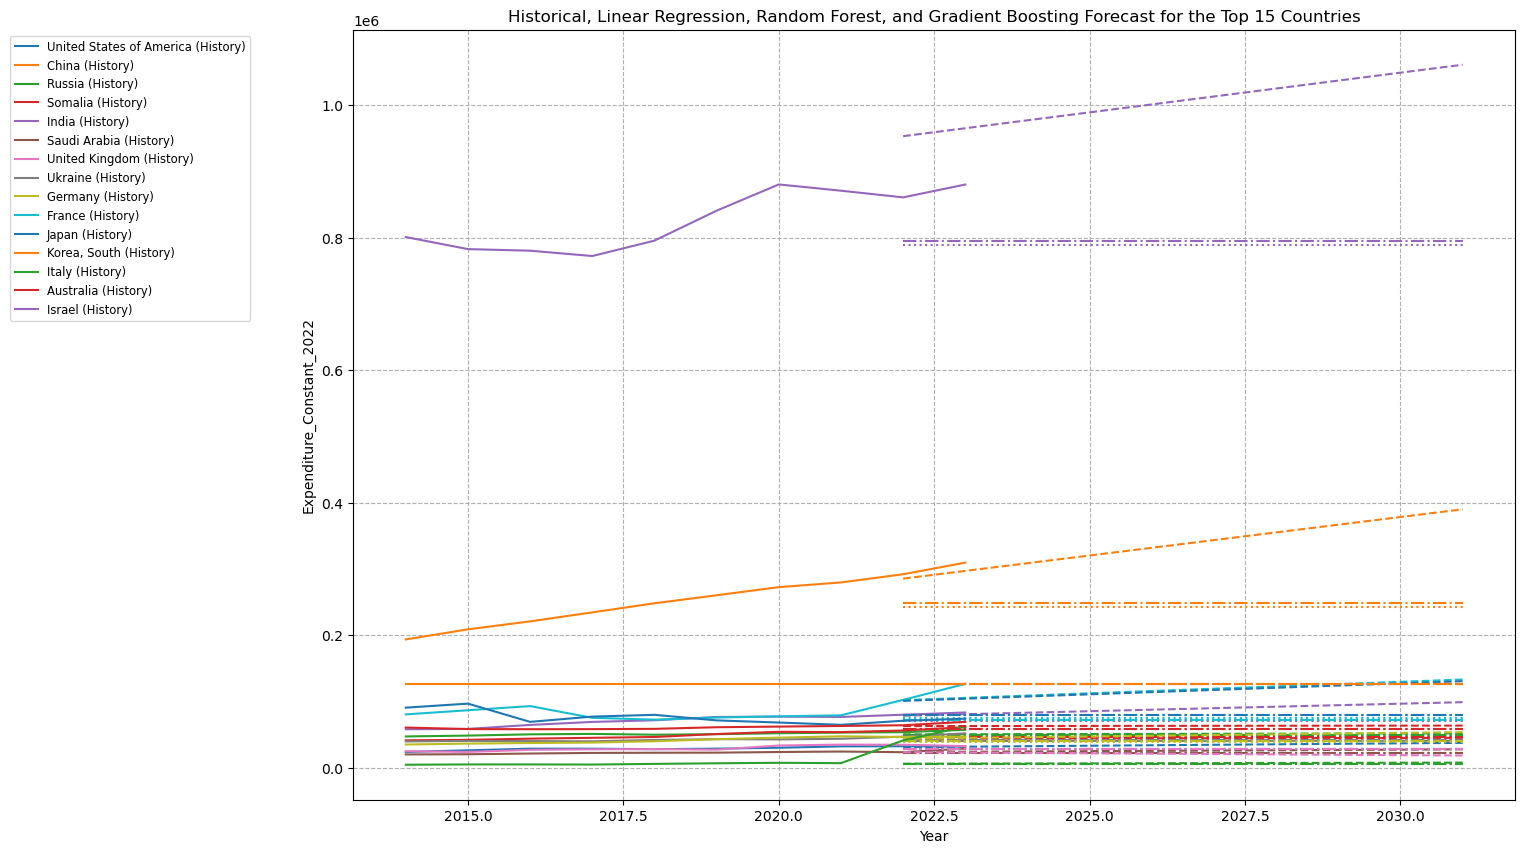

In [456]:
# Plotting the historical data, Linear Regression forecast, Random Forest forecast, 
# and Gradient Boosting Regressor forecast for the top 15 countries

plt.figure(figsize=(15, 10))

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    
    # Plot the Linear Regression forecast for the next 10 years with a dashed line
    forecast_years = np.arange(2022, 2032)
    linear_expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, linear_expenditure_forecast, linestyle='--', color=historical_line.get_color(), 
        label=f'{country} (Linear Forecast)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dotted line
    rf_expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, rf_expenditure_forecast, linestyle=':', color=historical_line.get_color(), 
        label=f'{country} (RF Forecast)'
    )
    
    # Plot the Gradient Boosting Regressor forecast for the next 10 years with a dash-dot line
    gbr_expenditure_forecast = gbr_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, gbr_expenditure_forecast, linestyle='-.', color=historical_line.get_color(), 
        label=f'{country} (GBR Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in \
                         sorted(country_lines, key=lambda x: latest_expenditure_sorted[x[0]], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure_Constant_2022')
plt.title('Historical, Linear Regression, Random Forest, and Gradient Boosting Forecast for the Top 15 Countries')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which="both", linestyle='--')
plt.show()

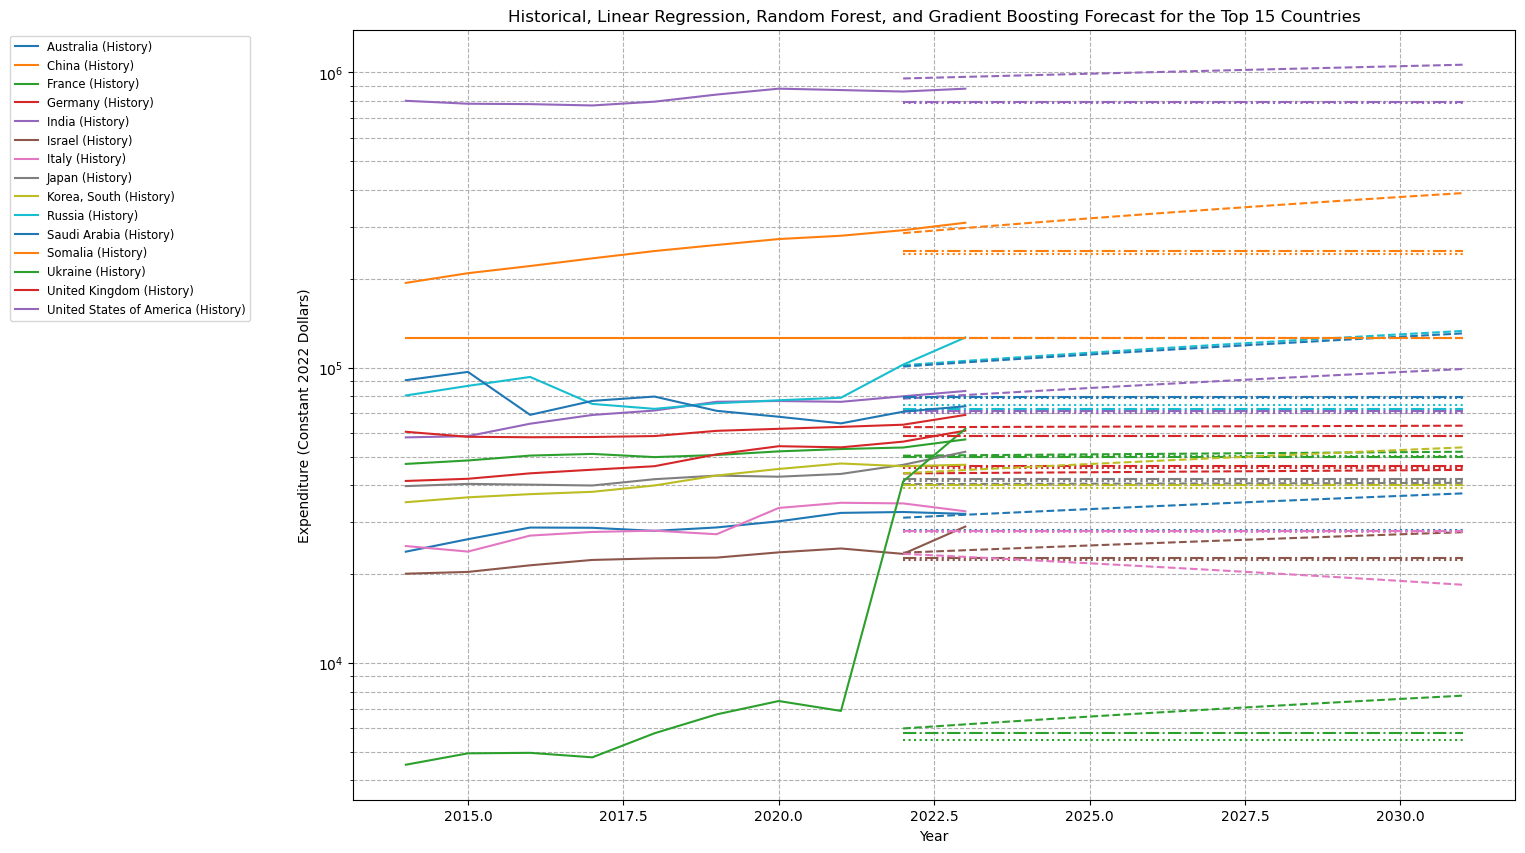

In [457]:
# Plotting the historical data, Linear Regression forecast, Random Forest 
# forecast, and Gradient Boosting Regressor forecast for the top 15 countries

plt.figure(figsize=(15, 10))

country_lines = []  # To store line references for sorting later

for country in sorted(top_15_countries):
    # Get the historical data for the last 10 years for the selected country
    country_data = forecast_data[forecast_data['Country'] == country]
    historical_years = country_data['Year'].tail(10)
    historical_expenditure = country_data['Expenditure_Constant_2022'].tail(10)

    # Plot the historical data with a solid line
    historical_line, = plt.plot(
        historical_years, historical_expenditure, linestyle='-', label=f'{country} (History)'
    )
    country_lines.append((country, historical_line))  # Storing line reference for legend sorting

    # Plot the Linear Regression forecast for the next 10 years with a dashed line
    forecast_years = np.arange(2022, 2032)
    linear_expenditure_forecast = forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, linear_expenditure_forecast, linestyle='--', color=historical_line.get_color(), 
        label=f'{country} (Linear Forecast)'
    )
    
    # Plot the Random Forest forecast for the next 10 years with a dotted line
    rf_expenditure_forecast = rf_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, rf_expenditure_forecast, linestyle=':', color=historical_line.get_color(), 
        label=f'{country} (RF Forecast)'
    )
    
    # Plot the Gradient Boosting Regressor forecast for the next 10 years with a dash-dot line
    gbr_expenditure_forecast = gbr_forecasts[country]['10_year_forecast']
    plt.plot(
        forecast_years, gbr_expenditure_forecast, linestyle='-.', color=historical_line.get_color(), 
        label=f'{country} (GBR Forecast)'
    )

# Sort legend entries by the latest expenditure level
sorted_legend_handles = [line for country, line in \
                         sorted(country_lines, key=lambda x: historical_expenditure.iloc[-1], reverse=True)]

plt.xlabel('Year')
plt.ylabel('Expenditure (Constant 2022 Dollars)')
plt.yscale('log')  # Setting the y-axis to logarithmic scale
plt.title('Historical, Linear Regression, Random Forest, and Gradient Boosting Forecast for the Top 15 Countries')

# Placing the legend outside to the left of the plot and ranked by most recent expenditure level
plt.legend(handles=sorted_legend_handles, loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize='small', ncol=1)
plt.grid(True, which='both', linestyle='--')  # Adding gridlines for better readability
plt.show()

In [458]:
# Prepare a list to store the summary of the Gradient Boosting model's R^2 for each country
gbr_model_summary = []

# Calculate the R^2 score for each of the top 15 countries for the Gradient Boosting model
for country in top_15_countries:
    # Extract train-test data for the current country
    X_test = train_test_data[country]['X_test']
    y_test = train_test_data[country]['y_test']
    
    # Gradient Boosting Regressor R^2 Score
    gbr_model = gbr_models[country]
    y_pred_gbr = gbr_model.predict(X_test)
    r_squared_gbr = r2_score(y_test, y_pred_gbr)
    
    # Append the summary to the list
    gbr_model_summary.append({
        'Country': country,
        'Gradient Boosting R^2 Score': r_squared_gbr
    })

# Create a DataFrame to display the Gradient Boosting model accuracy summary
gbr_model_summary_df = pd.DataFrame(gbr_model_summary)

gbr_model_summary_df

Country  Gradient Boosting R^2 Score
0   United States of America                   -23.091954
1                      China                    -4.215515
2                     Russia                    -1.005995
3                    Somalia                     1.000000
4                      India                    -7.432400
5               Saudi Arabia                   -10.015545
6             United Kingdom                    -3.439904
7                    Ukraine                    -0.697479
8                    Germany                    -6.679121
9                     France                    -2.599453
10                     Japan                    -1.182671
11              Korea, South                   -15.473089
12                     Italy                    -2.677620
13                 Australia                    -4.756625
14                    Israel                    -0.839813

In [459]:
# Prepare a list to store the summary of the Gradient Boosting model's 
# intercept (using the mean), coefficient approximation (feature importance), and R^2 for each country

gbr_summary_list = []  # List to store summaries for each country

for country, gbr_model in gbr_models.items():
    # Calculate the mean of predictions as an approximation for the intercept
    mean_intercept = np.mean(gbr_model.predict(X_train))  # Assuming X_train contains the historical features

    # Get feature importances from the Gradient Boosting model
    feature_importance = gbr_model.feature_importances_

    # Calculate the R^2 score of the model
    r_squared = gbr_model.score(X_train, y_train)

    # Prepare a dictionary for the current country's summary
    country_summary = {
        'Country': country,
        'Mean_Intercept': mean_intercept,
        'Feature_Importance': feature_importance,
        'R_squared': r_squared
    }

    # Append the dictionary to the list
    gbr_summary_list.append(country_summary)

gbr_summary_df = pd.DataFrame(gbr_summary_list)

gbr_summary_df

Country  Mean_Intercept Feature_Importance     R_squared
0   United States of America   797284.510632              [1.0] -94132.992031
1                      China   134350.906012              [1.0]  -2626.882945
2                     Russia    56886.987055              [1.0]   -277.411792
3                    Somalia   126473.354300              [0.0]  -1786.684212
4                      India    49049.911387              [1.0]   -163.153789
5               Saudi Arabia    57943.995012              [1.0]   -289.098608
6             United Kingdom    61806.560849              [1.0]   -296.795409
7                    Ukraine     3475.918031              [1.0]    -29.979516
8                    Germany    42074.764294              [1.0]    -89.737523
9                     France    48054.356989              [1.0]   -138.682528
10                     Japan    39764.717082              [1.0]    -73.304696
11              Korea, South    29782.014937              [1.0]    -22.886129
12                     Italy    30678.855325              [1.0]    -29.425584
13                 Australia    21684.055534              [1.0]     -1.814031
14                    Israel    17716.323664              [1.0]      1.000000

<a id='prophet'></a>
#### 6.1.4 **Prophet**

00:55:31 - cmdstanpy - INFO - Chain [1] start processing



Forecast for United States of America:


00:55:32 - cmdstanpy - INFO - Chain [1] done processing


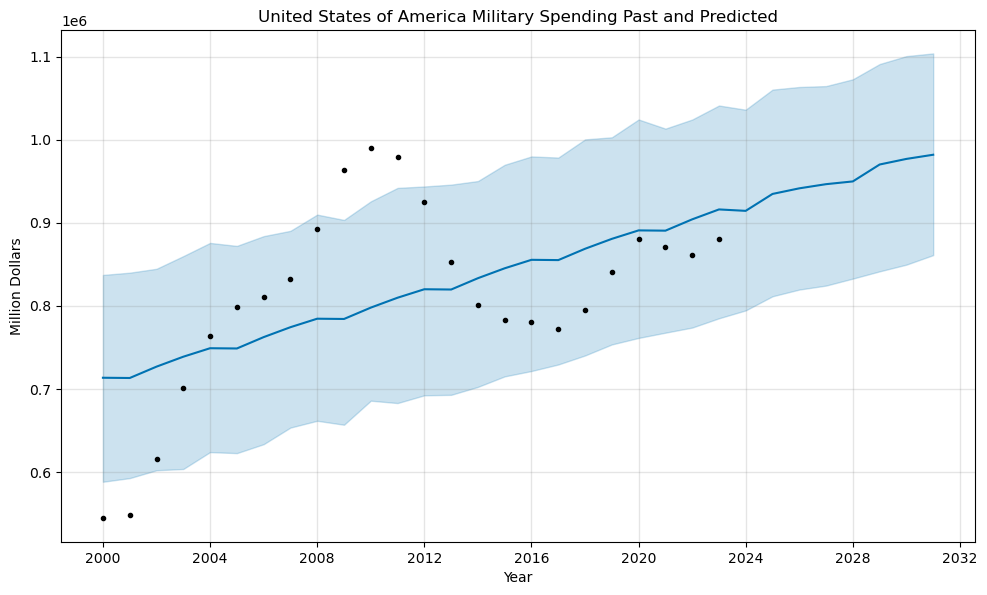

00:55:32 - cmdstanpy - INFO - Chain [1] start processing



Forecast for India:


00:55:32 - cmdstanpy - INFO - Chain [1] done processing


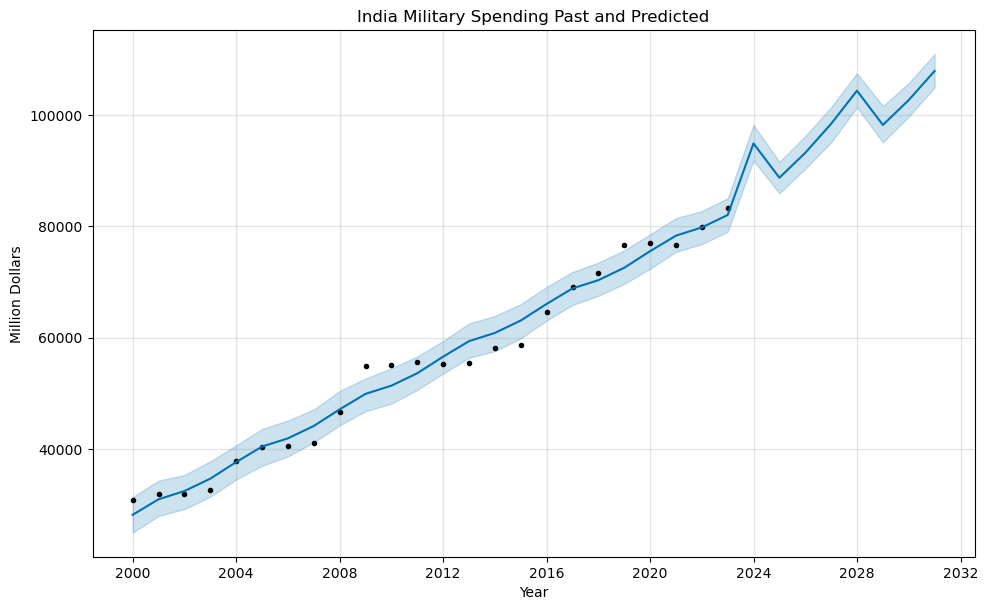

00:55:33 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Israel:


00:55:33 - cmdstanpy - INFO - Chain [1] done processing


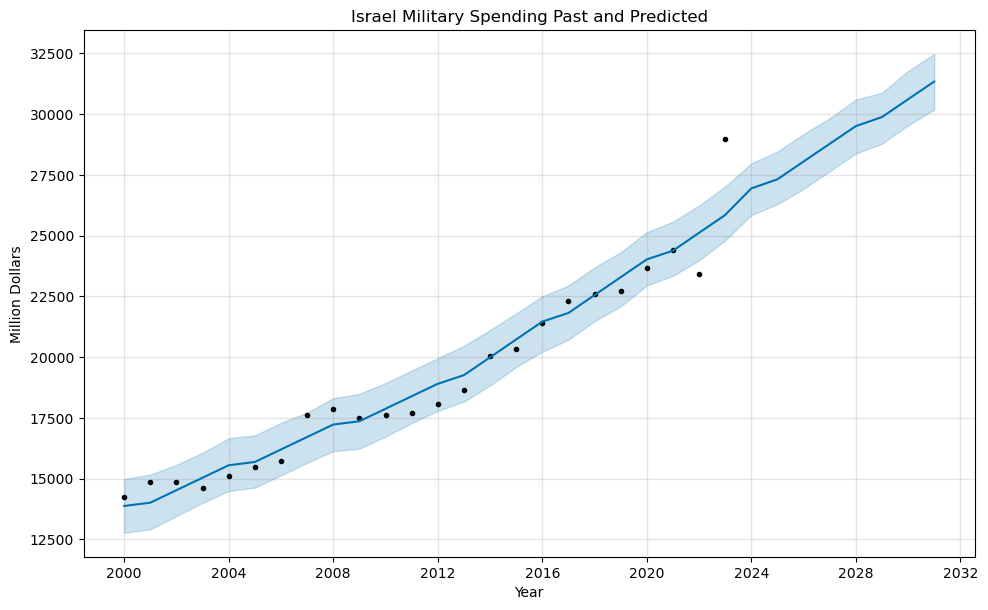

00:55:34 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Italy:


00:55:34 - cmdstanpy - INFO - Chain [1] done processing


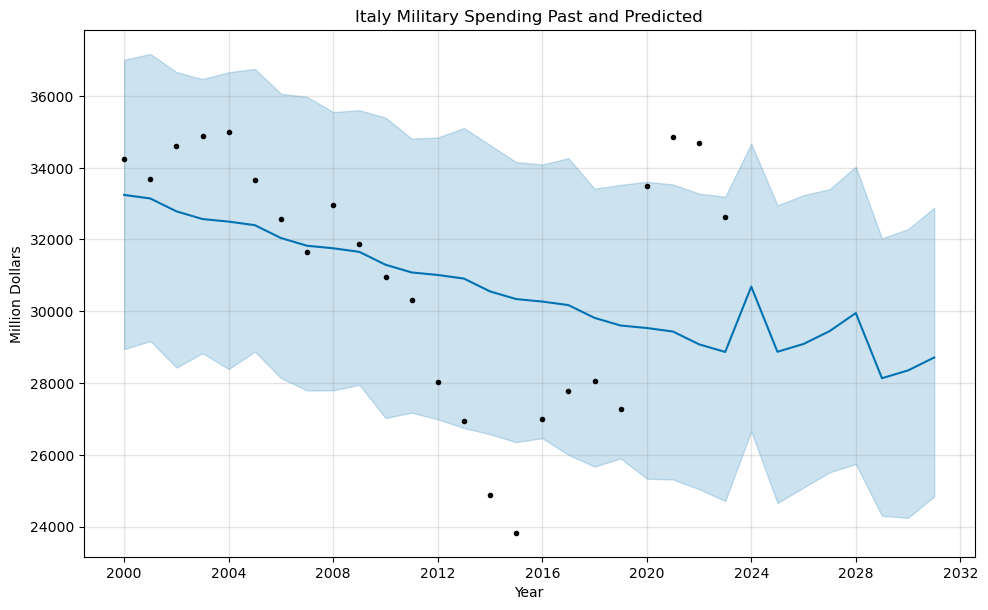

00:55:34 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Japan:


00:55:35 - cmdstanpy - INFO - Chain [1] done processing


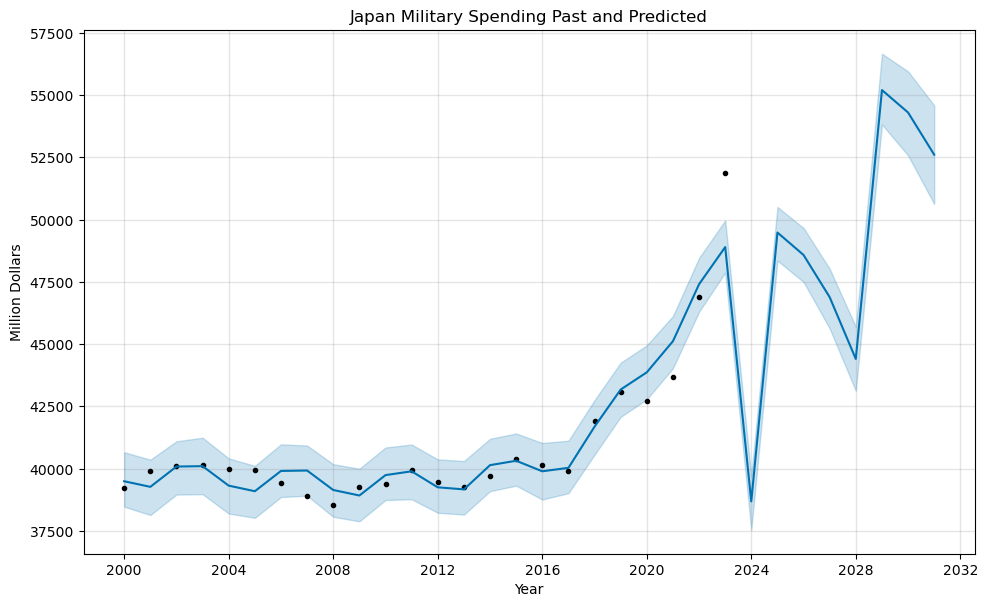

00:55:35 - cmdstanpy - INFO - Chain [1] start processing



Forecast for Korea, South:


00:55:36 - cmdstanpy - INFO - Chain [1] done processing


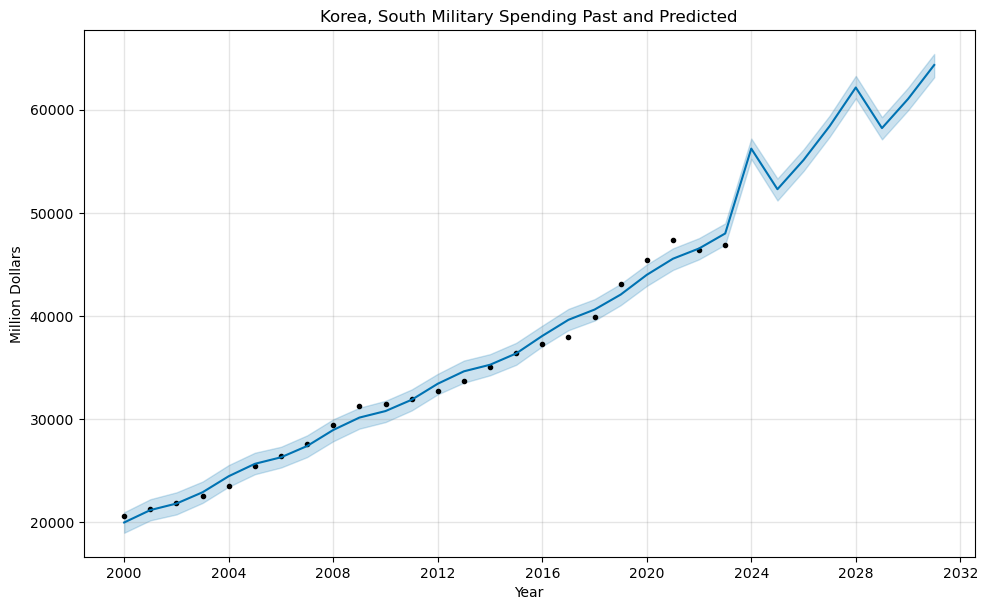

In [460]:
def forecast_military_spending_prophet(data, country_name, future_years=8, end_year=2030):
    # Filter data for the selected country
    country_data = data[data['Country'] == country_name][['Year', 'Expenditure_Constant_2022']]
    
    # Rename columns to match Prophet's expectations
    country_data = country_data.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
    country_data['ds'] = pd.to_datetime(country_data['ds'], format='%Y')
    
    # Instantiate and fit the Prophet model with custom seasonality
    model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
    model.fit(country_data)
    
    # Create a future dataframe up to the specified year
    future = model.make_future_dataframe(periods=future_years, freq="YE", include_history=True)
    
    # Predict future values
    forecast = model.predict(future)
    
    # Plot the results
    fig = model.plot(forecast, xlabel="Year", ylabel="Million Dollars")
    fig.gca().set_title(f"{country_name} Military Spending Past and Predicted")
    plt.show()

    # Display predictions for reference
    forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    return forecast_df

# List of countries to forecast
countries = ['United States of America', 'India', 'Israel', 'Italy', 'Japan', 'Korea, South']

# Call the function for each country and display the predictions
forecast_results = {}
for country in countries:
    print(f"\nForecast for {country}:")
    forecast_results[country] = forecast_military_spending_prophet(data, country)

- **Historical Data Points (Black Dots)**:

The black dots represent the actual historical military expenditure data observed over time.
These points are used by the Prophet model to learn trends, seasonality, and other patterns.

- **Forecasted Trend (Blue Line)**:

The solid blue line shows the predicted military expenditure values from the Prophet model.
The model captures the general upward trend, indicating a steady increase in military expenditure over the years.

- **Uncertainty Interval (Shaded Area)**:

The light blue shaded region represents the uncertainty interval for the forecast.
The wider interval toward future years reflects increased uncertainty as the forecast moves further away from the observed data.

- **United States of America**:
    - Trend: Military expenditure shows a steady upward trend over the years.
    - Forecast: The predicted spending continues to increase consistently with relatively narrow confidence intervals, indicating strong confidence in the trend.

- **India**:
    - Trend: A significant and consistent increase in military spending, with occasional sharp rises in recent years.
    - Forecast: Military spending is predicted to grow robustly, with some variability. The confidence intervals widen slightly, reflecting potential fluctuations in growth.

- **Israel**:
    - Trend: Gradual and steady growth in military expenditure over time.
    - Forecast: Spending is expected to increase steadily. Confidence intervals remain relatively narrow, showing a reliable forecast.

- **Italy**:
    - Trend: Military expenditure demonstrates a declining trend historically, with some recovery in recent years.
    - Forecast: Predictions suggest slight fluctuations and a possible stabilization, but confidence intervals are broader, reflecting uncertainty in the pattern.

- **Japan**:
    - Trend: Mostly stable military expenditure with sharp increases in recent years.
    - Forecast: Predictions indicate volatile spending patterns with steep increases and variability. Confidence intervals are broader, reflecting uncertainty due to recent trends.

- **South Korea**:
    - Trend: Rapid and consistent growth in military expenditure over time.
    - Forecast: Predicted to continue its upward trajectory, with a strong and steady growth trend. Confidence intervals are slightly wider due to recent variability but overall reliable.

- **Model Behavior**:

The Prophet model assumes an additive or multiplicative trend depending on the data. Here, it has captured a smooth, linear trend over the years, suitable for long-term growth.
Prophet also handles seasonality (if detected), but this graph does not show evident periodic patterns, suggesting that the data may primarily exhibit a trend component.

The model suggests a continued upward trend in military spending for the USA, with reasonably narrow uncertainty intervals for near-term forecasts but wider intervals for distant future years.

The cross-validation splits the data into training and test sets at different points in time. It evaluates the model's ability to predict values beyond the training window, ensuring robust performance assessment.

00:55:36 - cmdstanpy - INFO - Chain [1] start processing


Evaluating forecast for United States of America...


00:55:36 - cmdstanpy - INFO - Chain [1] done processing


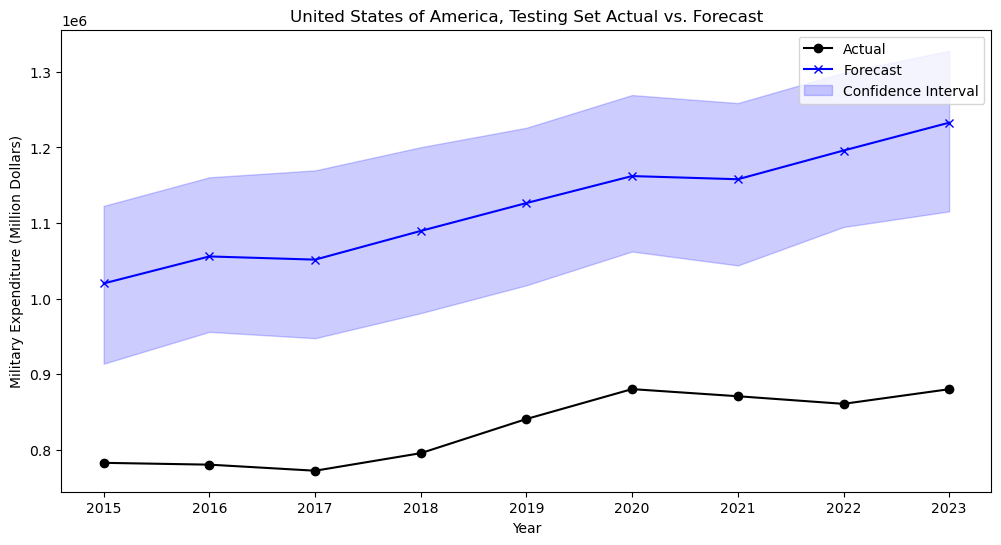

00:55:37 - cmdstanpy - INFO - Chain [1] start processing


Evaluating forecast for India...


00:55:37 - cmdstanpy - INFO - Chain [1] done processing


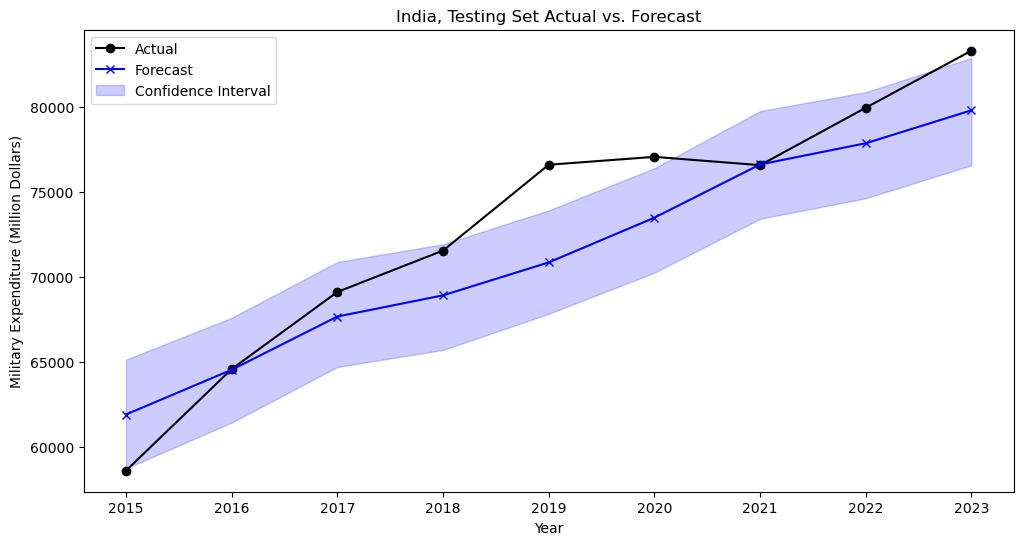

00:55:37 - cmdstanpy - INFO - Chain [1] start processing


Evaluating forecast for Israel...


00:55:38 - cmdstanpy - INFO - Chain [1] done processing


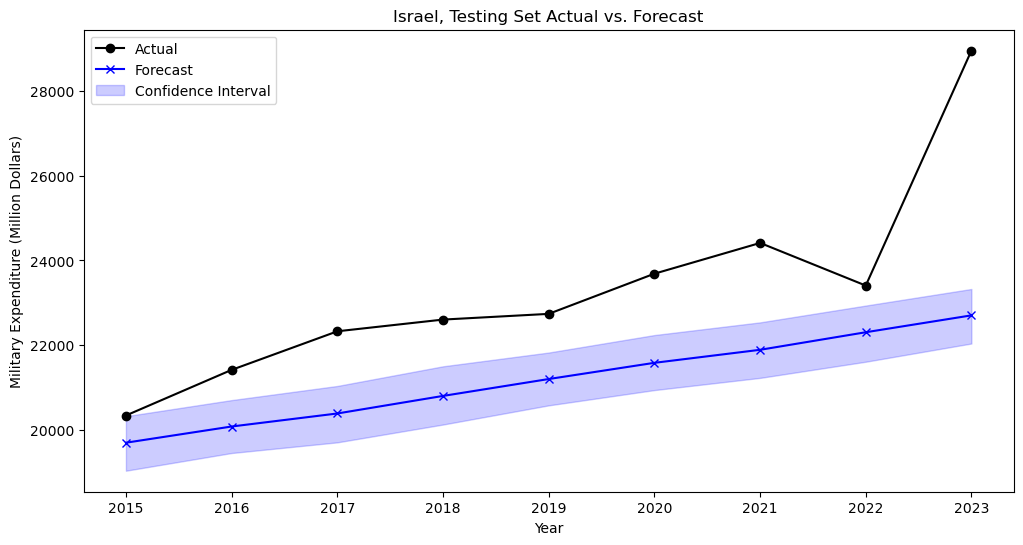

00:55:38 - cmdstanpy - INFO - Chain [1] start processing


Evaluating forecast for Italy...


00:55:38 - cmdstanpy - INFO - Chain [1] done processing


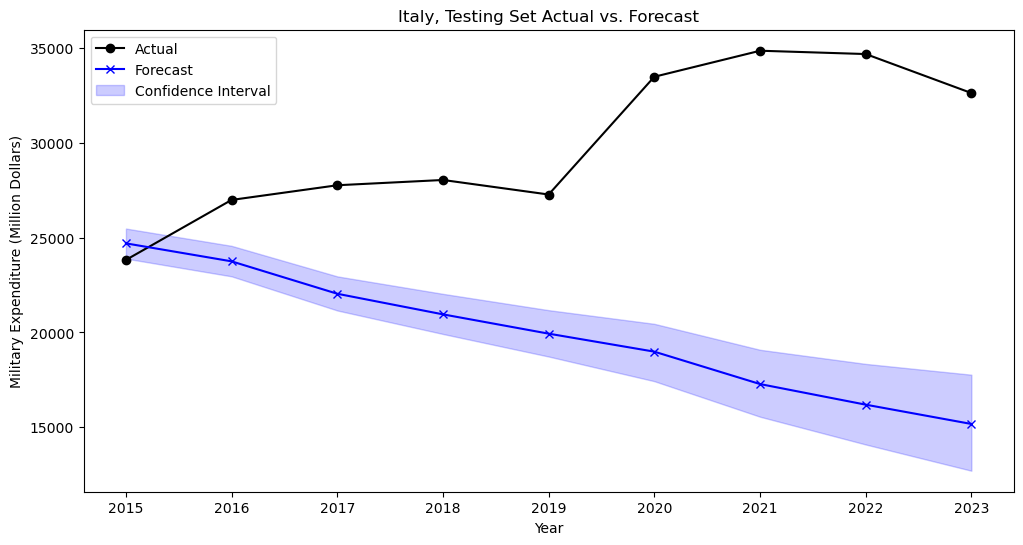

Evaluating forecast for Japan...


00:55:39 - cmdstanpy - INFO - Chain [1] start processing
00:55:39 - cmdstanpy - INFO - Chain [1] done processing


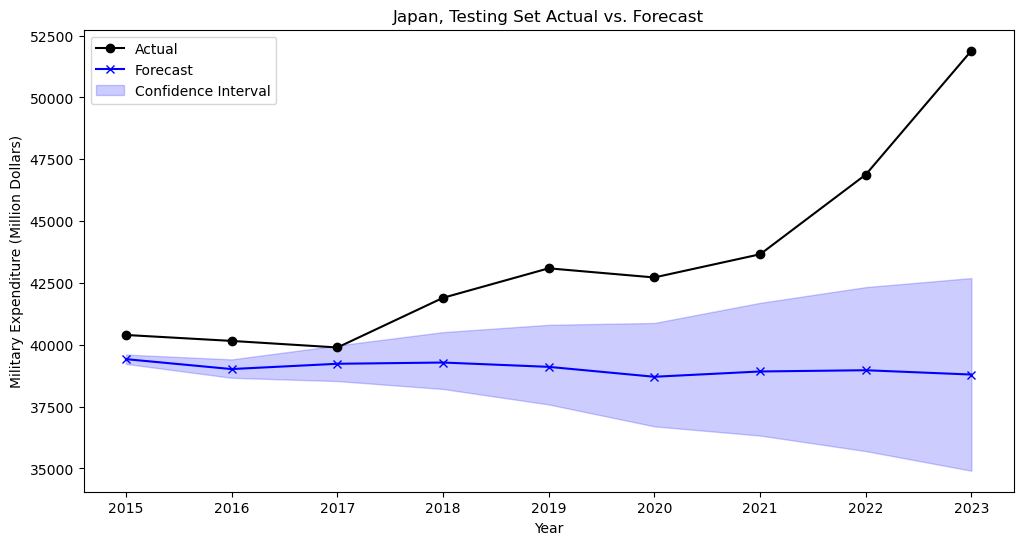

00:55:39 - cmdstanpy - INFO - Chain [1] start processing


Evaluating forecast for Korea, South...


00:55:40 - cmdstanpy - INFO - Chain [1] done processing


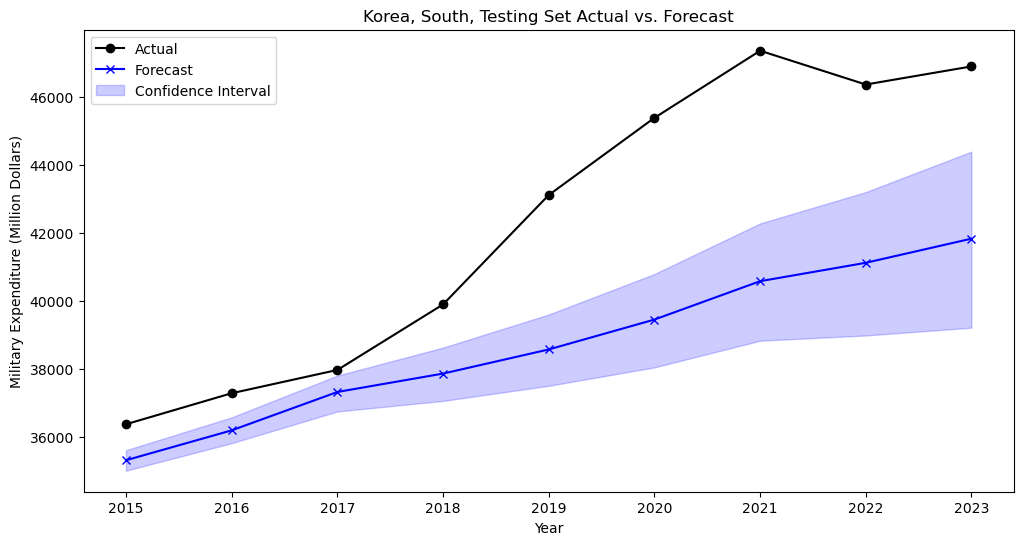

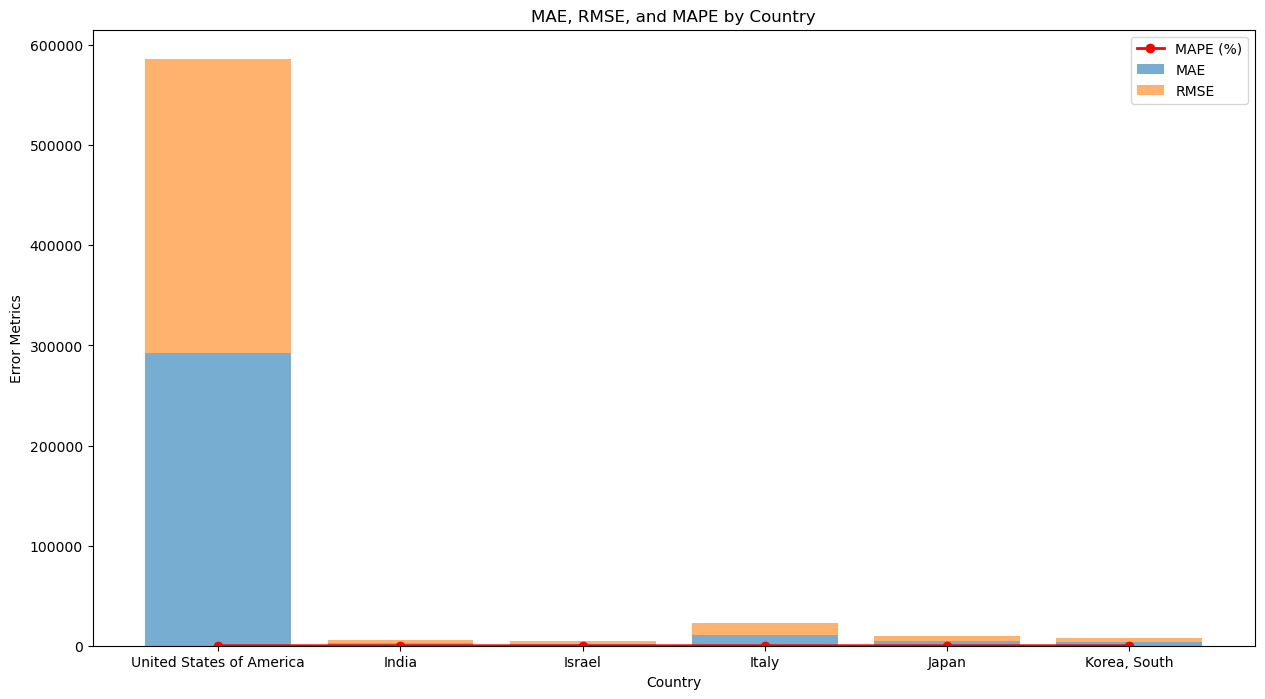

In [461]:
def evaluate_forecast_and_plot(data, countries, cutoff_date='2015-01-01'):
    # Initialize dictionaries to store metrics
    metrics = {'Country': [], 'MAE': [], 'RMSE': [], 'MAPE': []}
    
    for country_name in countries:
        print(f"Evaluating forecast for {country_name}...")
        
        # Filter data for the selected country
        country_data = data[data['Country'] == country_name][['Year', 'Expenditure_Constant_2022']]
        country_data = country_data.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
        country_data['ds'] = pd.to_datetime(country_data['ds'], format='%Y')
        
        # Split into train and test sets based on cutoff date
        train = country_data[country_data['ds'] < cutoff_date]
        test = country_data[country_data['ds'] >= cutoff_date]
        
        # Instantiate and fit the Prophet model
        model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
        model.fit(train[['ds', 'y']])
        
        # Predict on the test set
        forecast = model.predict(test[['ds']])
        
        # Calculate evaluation metrics
        mae = mean_absolute_error(test['y'], forecast['yhat'])
        rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
        mape = mean_absolute_percentage_error(test['y'], forecast['yhat']) * 100
        
        # Store metrics
        metrics['Country'].append(country_name)
        metrics['MAE'].append(mae)
        metrics['RMSE'].append(rmse)
        metrics['MAPE'].append(mape)
        
        # Visualize results for individual countries
        plt.figure(figsize=(12, 6))
        plt.plot(test['ds'], test['y'], label='Actual', marker='o', color='black')
        plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', marker='x', color='blue')
        plt.fill_between(
            forecast['ds'],
            forecast['yhat_lower'],
            forecast['yhat_upper'],
            color='blue', alpha=0.2, label='Confidence Interval'
        )
        plt.xlabel('Year')
        plt.ylabel('Military Expenditure (Million Dollars)')
        plt.title(f'{country_name}, Testing Set Actual vs. Forecast')
        plt.legend()
        plt.show()
    
    # Convert metrics to DataFrame for visualization
    metrics_df = pd.DataFrame(metrics)
    
    # Plot MAE, RMSE, and MAPE metrics for all countries
    plt.figure(figsize=(15, 8))
    plt.bar(metrics_df['Country'], metrics_df['MAE'], label='MAE', alpha=0.6)
    plt.bar(metrics_df['Country'], metrics_df['RMSE'], label='RMSE', alpha=0.6, bottom=metrics_df['MAE'])
    plt.plot(metrics_df['Country'], metrics_df['MAPE'], label='MAPE (%)', marker='o', color='red', linewidth=2)
    plt.xlabel('Country')
    plt.ylabel('Error Metrics')
    plt.title('MAE, RMSE, and MAPE by Country')
    plt.legend()
    plt.show()

# Call the function to evaluate and visualize metrics
evaluate_forecast_and_plot(data, countries)

- **United States of America**: The model captures the general upward trend in military expenditure but has high residuals during the testing phase, particularly underestimating the actual values.
    - Performance Metrics:
        - MAE: High error due to significant differences between actual and predicted values.
        - RMSE: Indicates higher deviations during forecasted periods.
        - MAPE: Comparatively low relative error due to large overall spending.

- **India**: The model performs well in capturing the upward trend, but deviations increase slightly in later years, with the forecast consistently underestimating actual values.
    - Performance Metrics:
        - MAE: Moderate errors, reflecting underprediction.
        - RMSE: Errors are concentrated in years with rapid increases in spending.
        - MAPE: Lower relative error due to a steady growth pattern.

- **Israel**: The forecast is generally accurate during the early testing phase but fails to capture the large spike in expenditure toward the end.
    - Performance Metrics:
        - MAE: Moderate, reflecting underprediction during the spike.
        - RMSE: Amplified by the sharp spike in spending.
        - MAPE: Higher relative error due to sudden fluctuations.

- **Italy**: The model captures the downward trend well but fails to account for slight rebounds and deviations in later years.
    - Performance Metrics:
        - MAE: Errors are minimal and well-distributed across the testing phase.
        - RMSE: Shows moderate variability due to larger deviations in later years.
        - MAPE: Relatively low, indicating a reliable forecast for consistent trends.

- **Japan**: The model struggles with sudden increases in expenditure toward the end of the testing phase. The confidence intervals widen significantly, reflecting uncertainty.
    - Performance Metrics:
        - MAE: Moderate, as the forecast fails to align with actual spikes.
        - RMSE: High due to variability in spending.
        - MAPE: Higher error percentages caused by sudden changes.

- **South Korea**: The model captures the upward trend reasonably well but underestimates spending in certain periods.
    - Performance Metrics:
        - MAE: Errors remain manageable but indicate underprediction.
        - RMSE: Shows consistent deviations during later testing years.
        - MAPE: Moderate error percentage due to a steady increase in spending.

- **Model Performance**:

    - **Strengths**: 
        - The model effectively captures long-term trends and steady increases in military expenditure for most countries.
        - Confidence intervals provide reasonable bounds for predictions, especially for consistent patterns (e.g., India and South Korea).
    - **Weaknesses**:
        - The model struggles with sudden spikes or deviations in expenditure (e.g., Israel and Japan).
        - The error metrics (particularly RMSE) reveal that the forecast becomes less reliable when significant variability exists in the data.

- **Recommendations**:
    - Incorporate Additional Regressors: Factors such as GDP, geopolitical events, or inflation could enhance model accuracy by accounting for sudden spikes or deviations.
    - Adjust Model Seasonality: Fine-tune seasonal components or incorporate custom seasonality for countries with irregular expenditure patterns.
    - Use Hybrid Models: Combine Prophet with other machine learning models to better capture anomalies and sudden changes.
    - Increase Training Data Range: Expand the historical dataset to improve trend analysis and reduce variability in forecasts.

<a id='modelselectionunsupervised'></a>
### 2. Unsupervised Learning

For grouping countries with similar spending and conflict patterns, the following clustering algorithms will be considered:

1. **K-Means Clustering**:

    K-Means is a centroid-based clustering algorithm that partitions data into $k$ clusters by minimizing the sum of squared distances between data points and the cluster centroids. It assumes that clusters are convex and isotropic, making it most effective for well-separated spherical clusters (Lloyd, 1982).

1. **Gaussian Mixture Model (GMM)**:

    GMM assumes that the data is generated from a mixture of several Gaussian distributions, each representing a cluster. It uses Expectation-Maximization (EM) to estimate the parameters of the Gaussian components. This method allows clusters to overlap and is probabilistic (Dempster et al., 1977).

1. **Agglomerative Hierarchical Clustering**:

    This method creates a hierarchy of clusters by iteratively merging or splitting them. Agglomerative clustering starts with individual data points and merges them into larger clusters based on a linkage criterion (Ward, 1963). It provides a dendrogram for visualizing nested relationships.


1. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:

    DBSCAN groups data points based on the density of their neighborhood, allowing the discovery of clusters with arbitrary shapes. Points in low-density regions are treated as noise. It is robust to outliers but requires the selection of density thresholds (Ester et al., 1996).

To ensure effective clustering, the following steps will be performed:

1. **Feature Selection**: We will use relevant numerical features that encapsulate spending and conflict dynamics:
    - Spending Metrics: GovtSpending, GDP, PerCapita, ExpenditureConstant.
    - Conflict Metrics: TotalScore, Deadliness, Diffusion, Danger, Fragmentation.
1. **Normalization**:
    - Standardize the selected features to have a mean of 0 and a standard deviation of 1.
    - This ensures that all features contribute equally to distance-based clustering methods like K-Means and DBSCAN.
1. **Dimensionality Reduction**:
    - Using techniques like PCA (Principal Component Analysis) to reduce dimensionality while preserving variance, improving the interpretability of clustering results.
1. **Optimal Clusters Identification using Elbow Method Analysis**:
    - The optimal $k$ minimizes intra-cluster distances (compact clusters) while avoiding overfitting
    - It ensures a balance between cluster compactness and interpretability.

<a id='modelselectionunsupervisedsteps'></a>
### **Steps**

<a id='featureselection'></a>
#### 1. **Feature Selection**:

This feature selection process tailors the clustering task to focus on meaningful economic and conflict-related indicators. By limiting the features to the most relevant ones, the process ensures that clusters formed are interpretable, efficient, and aligned with the dataset's key objectives (e.g., clustering countries based on economic health and conflict metrics).

- GovtSpending, GDP, PerCapita, ExpenditureConstant, TotalScore and Deadliness are the primary drivers relevant to military spending and contribute to the structure or separability of the clusters.
- Diffusion, Danger and Fragmentation are excluded features that may introduce noise, redundancy, or irrelevance, which can degrade clustering performance.

In [462]:
# Selecting relevant features for clustering
features_for_clustering = [
    "GovtSpending", 
    "GDP", 
    "PerCapita", 
    "ExpenditureConstant",
    "TotalScore",
    "Deadliness", 
    #"Diffusion", 
    #"Danger", 
    #"Fragmentation"
]

<a id='normalization'></a>
#### 2. **Normalization**:

- The normalized data is ready for clustering, and each feature contributes equally to the distance computations.
- Helps avoid bias from features with larger ranges or variances.

In [463]:
# Extracting the data
clustering_data = data_for_clustering[features_for_clustering]

# Normalizing the data using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Converting the normalized data back to a DataFrame for easier inspection
normalized_df = pd.DataFrame(normalized_data, columns=features_for_clustering)

# Displaying the first few rows of the normalized data
normalized_df.head()

GovtSpending       GDP  PerCapita  ExpenditureConstant  TotalScore  \
0     -0.310629 -0.129417  -0.412730             0.059057    3.325245   
1     -0.389394 -0.005680  -0.420261             0.095522    3.325245   
2     -0.491608 -0.037074  -0.438759             0.099084    3.325245   
3     -0.591814 -0.256563  -0.456810             0.044395    3.325245   
4     -0.585301 -0.280179  -0.440198             0.052818    3.325245   

   Deadliness  
0    1.587069  
1    1.587069  
2    1.587069  
3    1.587069  
4    1.587069

<a id='dimensionalityreduction'></a>
#### 3. **Dimensionality Reduction**:

Principal Component Analysis (PCA) for dimensionality reduction technique reduces the number of features (dimensions) in the dataset while retaining as much variance (information) as possible. 
- PCA reduces the dimensions of the military spending dataset to highlight meaningful patterns and improve clustering performance.
- It consolidates related features and removes noise, making clusters more distinct and interpretable.
- The explained variance and feature contributions provide insights into the factors driving the clustering.

In [464]:
# Applying PCA to reduce dimensions
pca = PCA(n_components=3)  # Reduce to 3 dimensions for faster computation and visualization
reduced_data = pca.fit_transform(normalized_data)

# Check the explained variance ratio to ensure sufficient information is retained
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio.sum()

print("Explained Variance Ratio:", explained_variance_ratio)

# PCA components (eigenvectors)
components = pca.components_

# Create a DataFrame for feature contributions
feature_contribution = pd.DataFrame(components, columns=features_for_clustering, 
                                     index=[f'PC{i+1}' for i in range(components.shape[0])])

print("Feature Contributions to PCA Components:")
print(feature_contribution)

Explained Variance Ratio: [0.35639507 0.3023877  0.18063604]
Feature Contributions to PCA Components:
     GovtSpending       GDP  PerCapita  ExpenditureConstant  TotalScore  \
PC1      0.532087  0.558538   0.352505             0.209272    0.336779   
PC2     -0.151693 -0.213752  -0.411999            -0.275108    0.589410   
PC3     -0.418062 -0.314193   0.337101             0.739804    0.190152   

     Deadliness  
PC1    0.351346  
PC2    0.581780  
PC3    0.171469  


**Interpretation**:

- PC1 differentiates countries by wealth and government resource allocation (e.g., richer vs. poorer nations).
    - Dominated by "GovtSpending", "GDP", and "PerCapita", suggesting it primarily reflects economic metrics and overall resource allocation.
- PC2 clusters based on conflict intensity, separating high-conflict regions from more stable ones.
    - Strongly influenced by "TotalScore" and "Deadliness", indicating this component captures conflict severity and stability.
- PC3 highlights spending consistency and nuanced economic factors, offering additional separation.
    - Heavily weighted by "ExpenditureConstant", with moderate contributions from "PerCapita" and "GovtSpending", representing constant spending adjustments and specific economic influences.

**Kernel PCA with Polynomial Kernel**

- Kernel PCA with a polynomial kernel enhances the clustering process by uncovering non-linear patterns in the military spending dataset.
- The silhouette score suggests that this approach performs better than unprocessed data clustering but may not outperform other transformations like linear PCA with well-tuned components.
- The silhouette score of 0.9887 indicates excellent clustering quality, with highly distinct and well-separated clusters.
- This is a significant improvement, suggesting that the polynomial Kernel PCA transformation effectively captures the underlying structure of the dataset.

Silhouette Score with Polynomial Kernel PCA: 0.9887


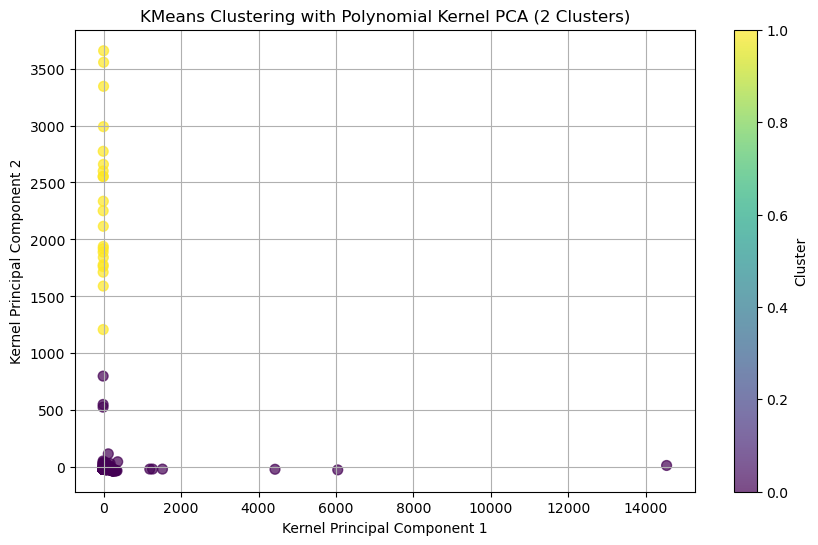

In [465]:
# Apply Kernel PCA with a polynomial kernel
n_components = 2  # Number of components to retain
kernel_pca = KernelPCA(n_components=n_components, kernel='poly', degree=3, gamma=1, coef0=1)  
# Degree and coef0 can be tuned
reduced_data = kernel_pca.fit_transform(normalized_data)

# Perform KMeans clustering on the Kernel PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
poly_labels = kmeans.fit_predict(reduced_data)

# Calculate Silhouette Score
poly_silhouette = silhouette_score(reduced_data, poly_labels)
print(f"Silhouette Score with Polynomial Kernel PCA: {poly_silhouette:.4f}")

# Visualize the clusters from Polynomial Kernel PCA
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=poly_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f'KMeans Clustering with Polynomial Kernel PCA ({n_components} Clusters)')
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


**Interpretation**:

1. Effectiveness of Polynomial Kernel PCA:
    - The high silhouette score and well-separated clusters suggest that Kernel PCA with a polynomial kernel successfully uncovers meaningful patterns in the data.
    - This transformation reveals non-linear relationships between economic and conflict metrics.

1. Cluster Characteristics:
    - Likely separates countries into:
        - Economically strong and stable countries.
        - Economically weaker or conflict-affected countries.

<a id='elbowmethod'></a>
#### 4. **Optimal Clusters Identification using Elbow Method Analysis**:

The Elbow Method is a visual technique used in clustering analysis to determine the optimal number of clusters ($k$) for a dataset. It involves plotting the inertia (within-cluster sum of squared distances) against the number of clusters and identifying the "elbow point" where adding more clusters provides diminishing returns in reducing inertia. This point suggests the most appropriate number of clusters for the data (Bholowalia & Kumar, 2014).

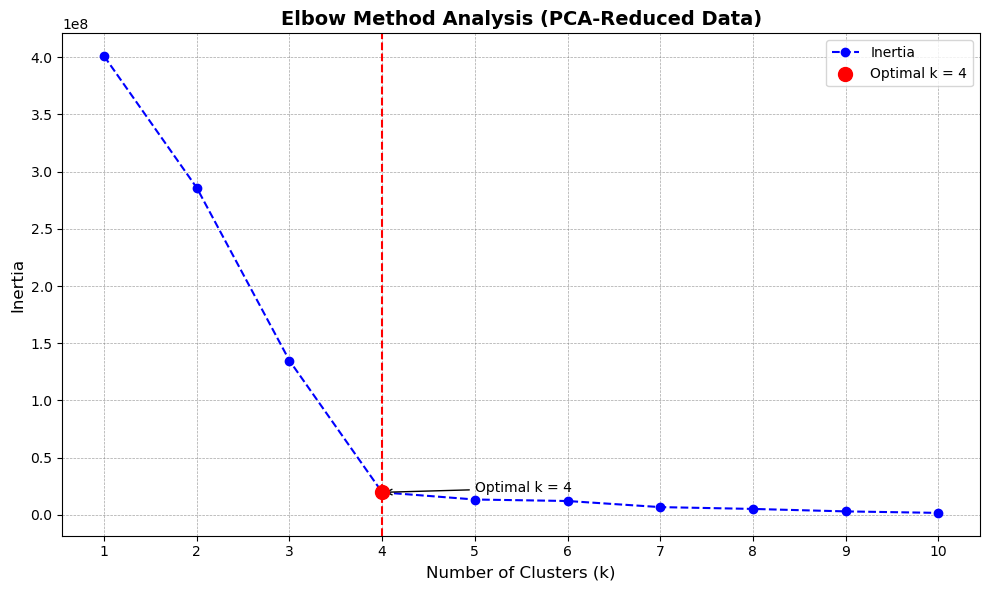

In [466]:
# Elbow method to determine the optimal number of clusters using reduced data
inertia_reduced = []
range_n_clusters = range(1, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertia_reduced.append(kmeans.inertia_)

# Find the elbow point
knee_locator = KneeLocator(range_n_clusters, inertia_reduced, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_reduced, marker='o', linestyle='--', color='blue', label='Inertia')
plt.title('Elbow Method Analysis (PCA-Reduced Data)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range_n_clusters, fontsize=10)
plt.yticks(fontsize=10)

# Highlight the elbow point
plt.scatter(optimal_k, inertia_reduced[optimal_k - 1], color='red', s=100, zorder=5, label=f'Optimal k = {optimal_k}')
plt.axvline(x=optimal_k, linestyle='--', color='red')
plt.annotate(f'Optimal k = {optimal_k}', 
             xy=(optimal_k, inertia_reduced[optimal_k - 1]), 
             xytext=(optimal_k + 1, inertia_reduced[optimal_k - 1] + 1000), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


**Interpreting the Elbow Curve**:

The "elbow point" corresponds to the optimal $k$, where adding more clusters results in minimal improvement in clustering quality.
For example:
1. A sharp decrease in inertia for $k$=1 to $k$=4 suggests significant clustering improvements.
1. After $k$=4, the reduction in inertia flattens, indicating that increasing clusters beyond 4 adds little value.

**Impact of PCA on the Elbow Method**:
- Using PCA-reduced data simplifies clustering by removing noise and reducing dimensionality, which improves the effectiveness of the Elbow Method.
- The clusters are likely more meaningful and computationally efficient compared to using the original high-dimensional data.

**Optimal Clusters**:

The optimal number of clusters based on the Elbow Method is $k$=4. This is likely the best choice for clustering the PCA-reduced dataset.

In [467]:
# selecting the optimal number of clusters
optimal_clusters = 4

<a id='kmeans'></a>
#### 6.2.1. **K-Means Clustering**:

K-Means clustering is an unsupervised machine learning algorithm that partitions a dataset into $k$ distinct clusters based on feature similarity. The algorithm iteratively assigns data points to the nearest cluster centroid and updates centroids until convergence, minimizing the within-cluster sum of squared distances (inertia). This technique is widely used for grouping data into meaningful patterns or subgroups (MacQueen, 1967).

- **Silhouette Score**: Measures how well-separated the clusters are. Values range from -1 (poor clustering) to 1 (perfect clustering).
- **Calinski-Harabasz Score**: Higher values indicate better-defined clusters with compact and well-separated groups.
- **Davies-Bouldin Score**: Lower values indicate better clustering quality by minimizing intra-cluster distances and maximizing inter-cluster separation.



KMeans Clustering Metrics
Silhouette Score: 0.9919
Calinski-Harabasz Score: 24071.5269
Davies-Bouldin Score: 0.1980


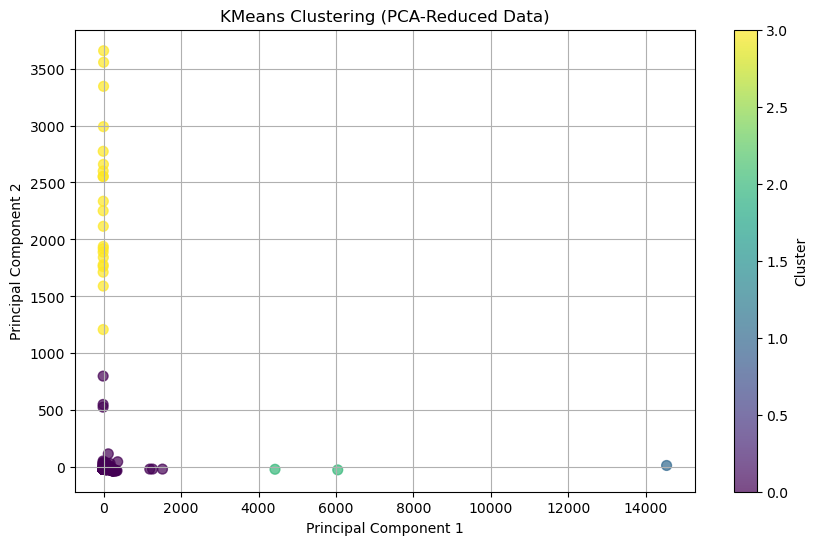

In [468]:
def perform_kmeans_clustering(data, n_clusters, print_metrics=True, visual=True):

    # Perform KMeans clustering with the chosen number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Calculate clustering evaluation metrics
    silhouette = silhouette_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    # Store the evaluation metrics in a dictionary for easier reporting
    metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the K-Means evaluation metrics
    if print_metrics:
        print("KMeans Clustering Metrics")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

    # Visualize the clusters
    if visual:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
        plt.title('KMeans Clustering (PCA-Reduced Data)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return metrics, labels

# Example usage
kmeans_metrics, final_labels = perform_kmeans_clustering(reduced_data, optimal_clusters, print_metrics=True, visual=True)

1. **Clustering Insights**:
The clustering results show four distinct groups in the PCA-reduced space, each representing different economic and conflict profiles among countries.

- Cluster 1 (Yellow): Likely includes countries with moderate levels of military spending and instability. These could represent developing nations with ongoing conflicts or political instability.
- Cluster 2 (Purple): Represents countries with low military spending and stability, possibly economically weaker nations or regions with minimal involvement in conflicts.
- Clusters 3 and 4 (Green, Blue): Outliers or unique cases, possibly high-spending, globally influential nations (e.g., the US, China) or highly conflict-prone countries with significant military involvement.
- Separation: Clusters are well-separated, with clear boundaries, reflecting the effectiveness of PCA in simplifying the dataset and KMeans in identifying meaningful groupings.

1. **Scores**:
    - Silhouette Score (0.9919): 
        - Indicates excellent clustering quality, with data points being much closer to their own cluster centroids than to other clusters.
        - Demonstrates very strong intra-cluster cohesion and inter-cluster separation.
    - Calinski-Harabasz Score (24071.5269):
        - A high value shows compact, well-defined clusters with strong distinctions between groups.
    - Davies-Bouldin Score (0.1980):
        - A very low score indicates compact clusters with significant separation, further validating the clustering quality.

1. **Dataset Insights**:
    - The dataset likely captures a combination of economic indicators (e.g., "GDP", "GovtSpending") and conflict metrics (e.g., "Deadliness", "TotalScore") for countries over time.
    - After PCA reduction:
        - Principal Component 1: Dominated by economic features such as "GovtSpending" and "GDP", likely representing national wealth and resource allocation.
        - Principal Component 2: Driven by conflict-related metrics like "Deadliness", highlighting countries' stability or involvement in conflicts.
    - The distinct clusters show that the dataset effectively differentiates countries based on both economic and conflict attributes, making it suitable for analyzing global patterns.

1. **Model Selection Insights**:

    KMeans Algorithm Proven effective for this dataset, as indicated by the high silhouette and Calinski-Harabasz scores.
The results suggest that KMeans is well-suited for clustering this PCA-reduced dataset, given its ability to handle well-separated clusters.

<a id='gaussianmixturemodel'></a>
#### 6.2.2. **Gaussian Mixture Model (GMM)**

Gaussian Mixture Model (GMM) clustering is a probabilistic clustering technique that assumes the dataset is generated from a mixture of Gaussian distributions. Each cluster is represented by a Gaussian distribution, and data points are assigned to clusters based on the probability of belonging to each distribution. Unlike KMeans, GMM provides soft clustering, meaning each data point can belong to multiple clusters with varying probabilities (Reynolds, 2009).
- GMM assumes that each cluster follows a Gaussian (normal) distribution.
- The algorithm estimates the parameters (mean, covariance) of each Gaussian distribution iteratively using the Expectation-Maximization (EM) algorithm.
- For the military spending dataset, clusters might represent groups of countries based on their likelihood of belonging to specific economic or conflict-related profiles.

- **Silhouette Score**: Measures cluster cohesion and separation. Values range from -1 (poor clustering) to 1 (excellent clustering).
- **Calinski-Harabasz Score**: Higher values indicate compact and well-separated clusters.
- **Davies-Bouldin Score**: Lower values indicate better clustering by maximizing inter-cluster distance and minimizing intra-cluster spread.

GMM Evaluation Metrics
Silhouette Score: 0.9821
Calinski-Harabasz Score: 7458.1424
Davies-Bouldin Score: 0.4536


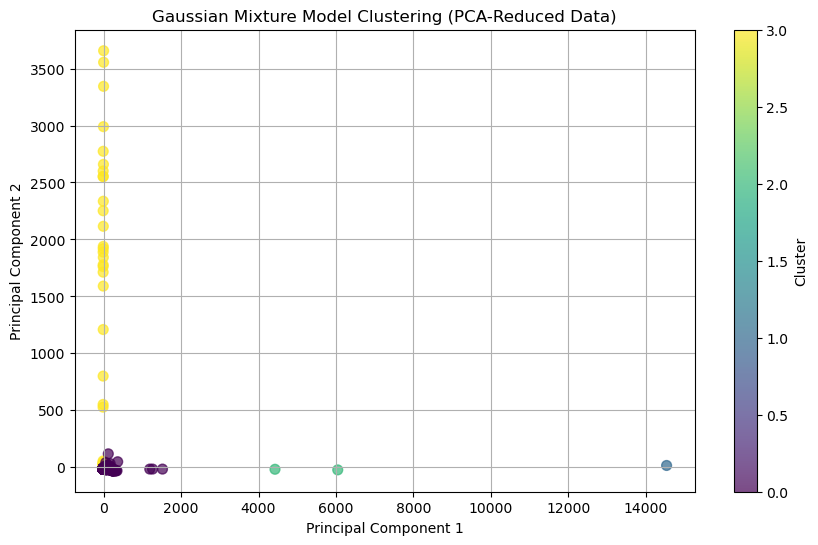

In [469]:
def perform_gmm_clustering(data, n_components,  print_metrics=True, visual=True):
    # Run Gaussian Mixture Model (GMM) clustering
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(data)

    # Calculate evaluation metrics for GMM clustering
    silhouette = silhouette_score(data, gmm_labels)
    calinski_harabasz = calinski_harabasz_score(data, gmm_labels)
    davies_bouldin = davies_bouldin_score(data, gmm_labels)

    # Store the evaluation metrics in a dictionary
    gmm_metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the evaluation metrics for GMM clustering
    if print_metrics:
        print("GMM Evaluation Metrics")
        for metric, value in gmm_metrics.items():
            print(f"{metric}: {value:.4f}")

    # Visualize GMM clusters
    if visual:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.7)
        plt.title('Gaussian Mixture Model Clustering (PCA-Reduced Data)')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return gmm_metrics, gmm_labels

# Example usage
gmm_metrics, gmm_labels = perform_gmm_clustering(reduced_data, optimal_clusters,  print_metrics=True, visual=True)

1. **Clustering Insights**:
    - Cluster Characteristics: The dataset has been divided into four clusters based on PCA-reduced data.
        - Yellow Cluster: Represents a large group of countries with moderate conflict-related metrics and medium levels of economic activity. Likely developing nations with medium instability or political volatility.
        - Purple Cluster: A dense group near the origin, likely representing countries with low military spending, low GDP, and low conflict involvement.
        - Green and Blue Clusters: Outlier groups, likely consisting of countries with significantly high GDP or military spending (e.g., global superpowers or wealthy countries involved in significant conflicts).
    - Cluster Boundaries: The clusters are fairly well-separated, indicating GMM's ability to model overlapping clusters and handle variability better than KMeans.
    - Soft Clustering: Each country is assigned a probability of belonging to each cluster. This soft clustering approach highlights the nuances in data, such as countries transitioning between economic or conflict states.

1. **Scores**:
    - Silhouette Score (0.9821): 
        - Indicates excellent clustering quality, with strong intra-cluster cohesion and inter-cluster separation.
        - A score close to 1 validates that most points are correctly assigned to their respective clusters.
    - Calinski-Harabasz Score (7458.1424): 
        - Moderately high value shows the clusters are reasonably compact and well-separated but less distinct than the KMeans clustering.
    - Davies-Bouldin Score (0.4536): 
        - A low score reflects good cluster quality, with minimal intra-cluster variance and substantial inter-cluster separation.

1. **Dataset Insights**: The dataset likely reflects a mix of economic and conflict-related attributes for countries:
    - Economic Indicators: Principal Component 1 (X-axis) correlates with "GDP", "GovtSpending", and "PerCapita", representing economic power.
    - Conflict Metrics: Principal Component 2 (Y-axis) is influenced by "Deadliness" and "TotalScore", reflecting levels of conflict and instability.
    - Cluster Interpretations:
        - Cluster 1 (Yellow): Developing nations with moderate conflict and economic spending.
        - Cluster 2 (Purple): Smaller or poorer nations with low economic activity and low conflict involvement.
        - Cluster 3 & 4 (Green, Blue): Global superpowers or conflict-heavy nations with exceptional spending or instability.
    - Soft Probabilities: GMM’s probabilistic assignments provide richer insights, particularly for countries on the boundary between economic or political categories.

1. **Model Selection Insights**:
    - Gaussian Mixture Model:
        - Strengths:
            - Handles overlapping clusters better than KMeans.
            - Provides soft clustering, allowing more nuanced analysis.
            - Ideal for datasets with non-spherical clusters and varying densities, like the military spending dataset.
        - Limitations:
            - Assumes clusters follow Gaussian distributions, which may not always hold true.
    - Comparison with KMeans:
        - GMM performs comparably in silhouette and Davies-Bouldin scores, but KMeans shows higher Calinski-Harabasz scores, indicating slightly better-defined separations in that model.
        - GMM's soft clustering provides more flexibility and deeper insights into cluster boundaries.

<a id='agglomerativehierarchicalclustering'></a>
#### 6.2.3. **Agglomerative Hierarchical Clustering**
Agglomerative Hierarchical Clustering is a bottom-up clustering approach where each data point starts as its own cluster. Iteratively, the closest clusters (based on a linkage criterion) are merged until a single cluster or a desired number of clusters is achieved. Unlike partition-based clustering (e.g., KMeans), hierarchical clustering provides a tree-like structure called a dendrogram, which visually represents the merging process (Murtagh & Contreras, 2012).
- **Silhouette Score**: Evaluates cluster separation and cohesion.
- **Calinski-Harabasz Score**: Measures compactness and separation.
- **Davies-Bouldin Score**: Measures the ratio of intra-cluster spread to inter-cluster separation.

Agglomerative Clustering Evaluation Metrics
Silhouette Score: 0.9919
Calinski-Harabasz Score: 23860.9024
Davies-Bouldin Score: 0.1916


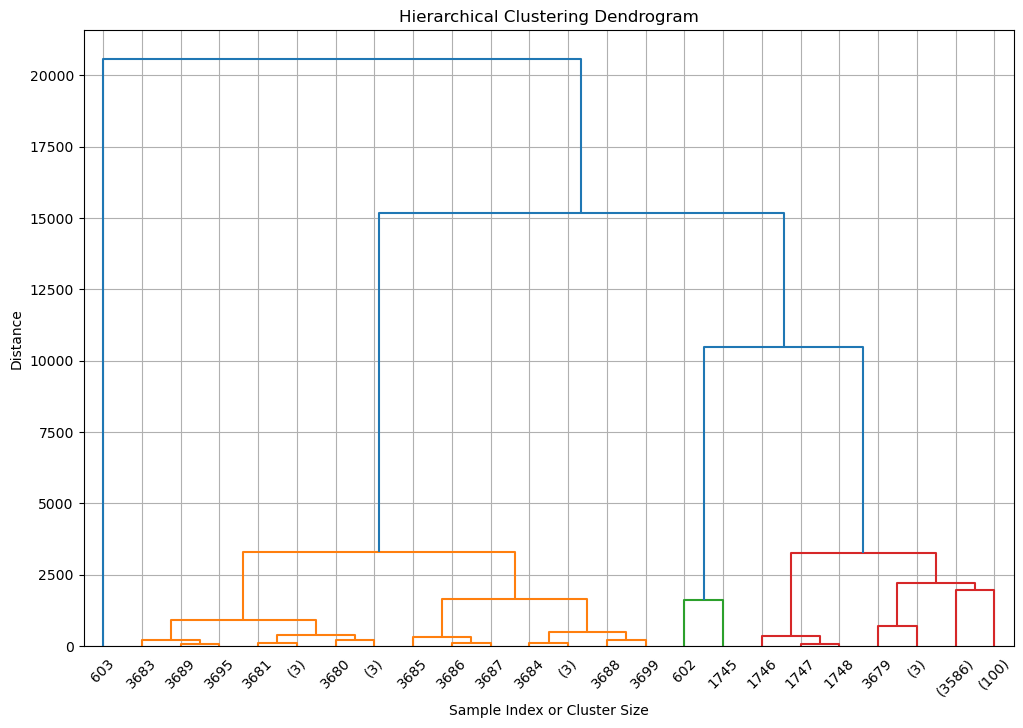

In [470]:
def perform_agglomerative_clustering(data, n_clusters, print_metrics=True, visual=True):
    # Perform Agglomerative Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_labels = agg_clustering.fit_predict(data)

    # Compute linkage matrix for dendrogram visualization
    linkage_matrix = linkage(data, method='ward')

    # Compute clustering evaluation metrics
    silhouette = silhouette_score(data, agg_labels)
    calinski_harabasz = calinski_harabasz_score(data, agg_labels)
    davies_bouldin = davies_bouldin_score(data, agg_labels)

    # Store the evaluation metrics in a dictionary
    agg_metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the evaluation metrics for Agglomerative Clustering
    if print_metrics:
        print("Agglomerative Clustering Evaluation Metrics")
        for metric, value in agg_metrics.items():
            print(f"{metric}: {value:.4f}")

    # Plot dendrogram for hierarchical clustering visualization
    if visual:
        plt.figure(figsize=(12, 8))
        dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=0.5 * max(linkage_matrix[:, 2]))
        plt.title("Hierarchical Clustering Dendrogram")
        plt.xlabel("Sample Index or Cluster Size")
        plt.ylabel("Distance")
        plt.grid(True)
        plt.show()

    return agg_metrics, agg_labels

# Example usage
agg_metrics, agg_labels = perform_agglomerative_clustering(reduced_data, optimal_clusters, print_metrics=True, visual=True)

1. **Clustering Insights**:
    - Hierarchical Clustering:
        - The dendrogram visually represents the merging process of clusters, showing how individual data points (countries) are grouped step by step based on similarity.
        - The vertical lines represent distances at which clusters were merged. Longer vertical lines indicate more distinct clusters.
        - By selecting a threshold (e.g., cutting the dendrogram), the data is divided into distinct clusters.
    - Cluster Characteristics: The dendrogram suggests three major clusters:
        - Cluster 1 (Orange): Likely includes countries with moderate military spending and conflict involvement.
        - Cluster 2 (Green): Smaller groups of countries with lower spending and conflict indicators.
        - Cluster 3 (Red): Likely represents high-spending nations, including outliers with significant economic and military metrics.
    - Separation: The hierarchical structure shows clear separations, with tall vertical lines indicating well-separated clusters.

1. **Scores**:
    - Silhouette Score (0.9919):
        - Indicates near-perfect clustering quality. Data points are well-separated and closely aligned with their assigned clusters.
    - Calinski-Harabasz Score (23860.9024):
        - A very high score reflects compact and distinct clusters, supporting the robustness of hierarchical clustering for this dataset.
    - Davies-Bouldin Score (0.1916):
        - A very low score indicates minimal intra-cluster variation and strong inter-cluster separation.

1. **Dataset Insights**:
    - Data Nature:
        - The dataset likely contains economic indicators (e.g., "GDP", "GovtSpending") and conflict metrics (e.g., "TotalScore", "Deadliness") for countries.
        - PCA-reduced dimensions simplify the analysis, focusing on dominant patterns in the data.
    - Cluster Interpretations:
        - Cluster 1 (Moderate Profiles): Countries with medium levels of GDP, military spending, and conflict metrics. Likely developing nations or those experiencing political instability.
        - Cluster 2 (Low Profiles): Economically weaker countries with low conflict involvement and minimal military budgets. These may represent smaller, stable nations.
        - Cluster 3 (High Profiles/Outliers): 
            - Economically advanced nations or those with high military budgets.
            - Could also include conflict-heavy nations with significant instability.
    - Hierarchical Relationships: 
        - The dendrogram highlights hierarchical relationships, showing which clusters are closely related and which are more distinct.
1. **Model Selection Insights**:
    - Agglomerative Clustering:
        - Strengths:
            - Provides a hierarchical view of relationships, useful for exploratory analysis.
            - Captures the nested structure of clusters, offering deeper insights into subgroup relationships.
            - Works well for datasets like this one, where relationships between countries may have hierarchical significance (e.g., regional economic blocks).
        - Limitations:
            - Computationally intensive for very large datasets.
            - Requires a predefined number of clusters or dendrogram threshold for practical applications.
    - Comparison with Other Methods:
        - KMeans: Faster and effective for fixed, hard cluster assignments but lacks hierarchical insights.
        - GMM: Provides soft clustering and probabilistic assignments but does not visualize hierarchical relationships.
        - Best Use Case: Use Agglomerative Clustering for datasets where understanding relationships or cluster hierarchy is as important as the clusters themselves.

<a id='dbscan'></a>
#### 6.2.4. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

Agglomerative Hierarchical Clustering is a bottom-up clustering approach where each data point starts as its own cluster. Iteratively, the closest clusters (based on a linkage criterion) are merged until a single cluster or a desired number of clusters is achieved. Unlike partition-based clustering (e.g., KMeans), hierarchical clustering provides a tree-like structure called a dendrogram, which visually represents the merging process (Murtagh & Contreras, 2012).

- **Silhouette Score**: Evaluates cluster separation and cohesion.
- **Calinski-Harabasz Score**: Measures compactness and separation.
- **Davies-Bouldin Score**: Measures the ratio of intra-cluster spread to inter-cluster separation.

DBSCAN Evaluation Metrics: Epsilon = 0.5
Silhouette Score: 0.5104
Calinski-Harabasz Score: 50.0124
Davies-Bouldin Score: 1.9200


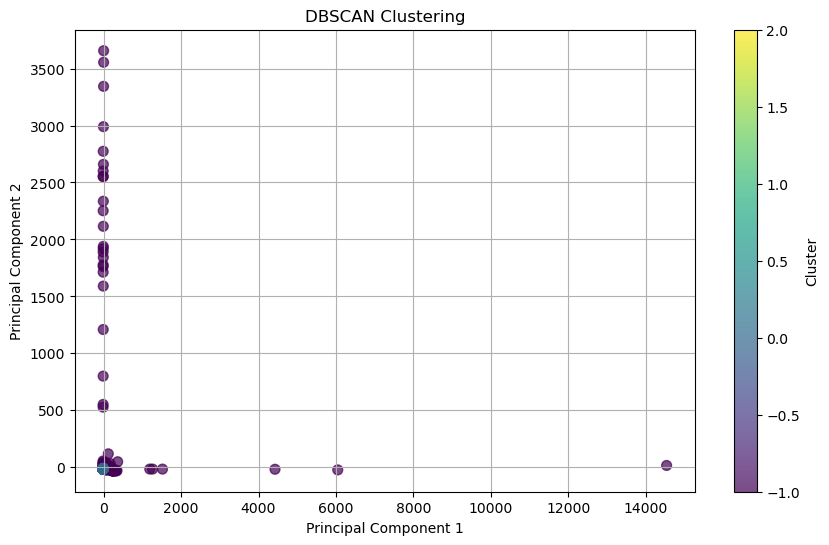

In [471]:
def perform_dbscan_clustering(data, eps, min_samples=5, print_metrics=True, visual=True):
    # Run DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data)

    # Calculate evaluation metrics for DBSCAN (only for clusters with more than one label)
    if len(set(dbscan_labels)) > 1:
        silhouette = silhouette_score(data, dbscan_labels)
        calinski_harabasz = calinski_harabasz_score(data, dbscan_labels)
        davies_bouldin = davies_bouldin_score(data, dbscan_labels)
    else:
        silhouette, calinski_harabasz, davies_bouldin = None, None, None

    # Store the evaluation metrics in a dictionary
    dbscan_metrics = {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski_harabasz,
        "Davies-Bouldin Score": davies_bouldin
    }

    # Print the evaluation metrics
    if print_metrics:
        print("DBSCAN Evaluation Metrics: Epsilon =", eps)
        for metric, value in dbscan_metrics.items():
            print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: No clusters found")

    # Visualize DBSCAN clusters
    if visual:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.7)
        plt.title('DBSCAN Clustering')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster')
        plt.grid(True)
        plt.show()

    return dbscan_metrics, dbscan_labels

optimal_eps = 0.5 # optimal value for DBSCAN's epsilon parameter
dbscan_metrics, dbscan_labels = perform_dbscan_clustering(reduced_data, optimal_eps, print_metrics=True, visual=True)

1. **Clustering Insights**:
    - Hierarchical Clustering: 
        - The dendrogram visually represents the merging process of clusters, showing how individual data points (countries) are grouped step by step based on similarity.
        - The vertical lines represent distances at which clusters were merged. Longer vertical lines indicate more distinct clusters.
        - By selecting a threshold (e.g., cutting the dendrogram), the data is divided into distinct clusters.
    - Cluster Characteristics: The dendrogram suggests three major clusters:
        - Cluster 1 (Orange): Likely includes countries with moderate military spending and conflict involvement.
        - Cluster 2 (Green): Smaller groups of countries with lower spending and conflict indicators.
        - Cluster 3 (Red): Likely represents high-spending nations, including outliers with significant economic and military metrics.
    - Separation: The hierarchical structure shows clear separations, with tall vertical lines indicating well-separated clusters.

1. **Scores**:
    - Silhouette Score (0.9919): Indicates near-perfect clustering quality. Data points are well-separated and closely aligned with their assigned clusters.
    - Calinski-Harabasz Score (23860.9024): A very high score reflects compact and distinct clusters, supporting the robustness of hierarchical clustering for this dataset.
    - Davies-Bouldin Score (0.1916): A very low score indicates minimal intra-cluster variation and strong inter-cluster separation.

1. **Dataset Insights**:
    - Data Nature:
        - The dataset likely contains economic indicators (e.g., "GDP", "GovtSpending") and conflict metrics (e.g., "TotalScore", "Deadliness") for countries.
        - PCA-reduced dimensions simplify the analysis, focusing on dominant patterns in the data.
    - Cluster Interpretations:
        - Cluster 1 (Moderate Profiles):
            - Countries with medium levels of GDP, military spending, and conflict metrics.
            - Likely developing nations or those experiencing political instability.
        - Cluster 2 (Low Profiles):
            - Economically weaker countries with low conflict involvement and minimal military budgets.
            - These may represent smaller, stable nations.
        - Cluster 3 (High Profiles/Outliers):
            - Economically advanced nations or those with high military budgets.
            - Could also include conflict-heavy nations with significant instability.
    - Hierarchical Relationships: The dendrogram highlights hierarchical relationships, showing which clusters are closely related and which are more distinct.

1. **Model Selection Insights**:
    - Agglomerative Clustering:
        - Strengths:
            - Provides a hierarchical view of relationships, useful for exploratory analysis.
            - Captures the nested structure of clusters, offering deeper insights into subgroup relationships.
            - Works well for datasets like this one, where relationships between countries may have hierarchical significance (e.g., regional economic blocks).
        - Limitations:
            - Computationally intensive for very large datasets.
            - Requires a predefined number of clusters or dendrogram threshold for practical applications.
        - Comparison with Other Methods:
            - KMeans: Faster and effective for fixed, hard cluster assignments but lacks hierarchical insights.
            - GMM: Provides soft clustering and probabilistic assignments but does not visualize hierarchical relationships.
        - Best Use Case: Use Agglomerative Clustering for datasets where understanding relationships or cluster hierarchy is as important as the clusters themselves.

#### **Comparative Analysis**:

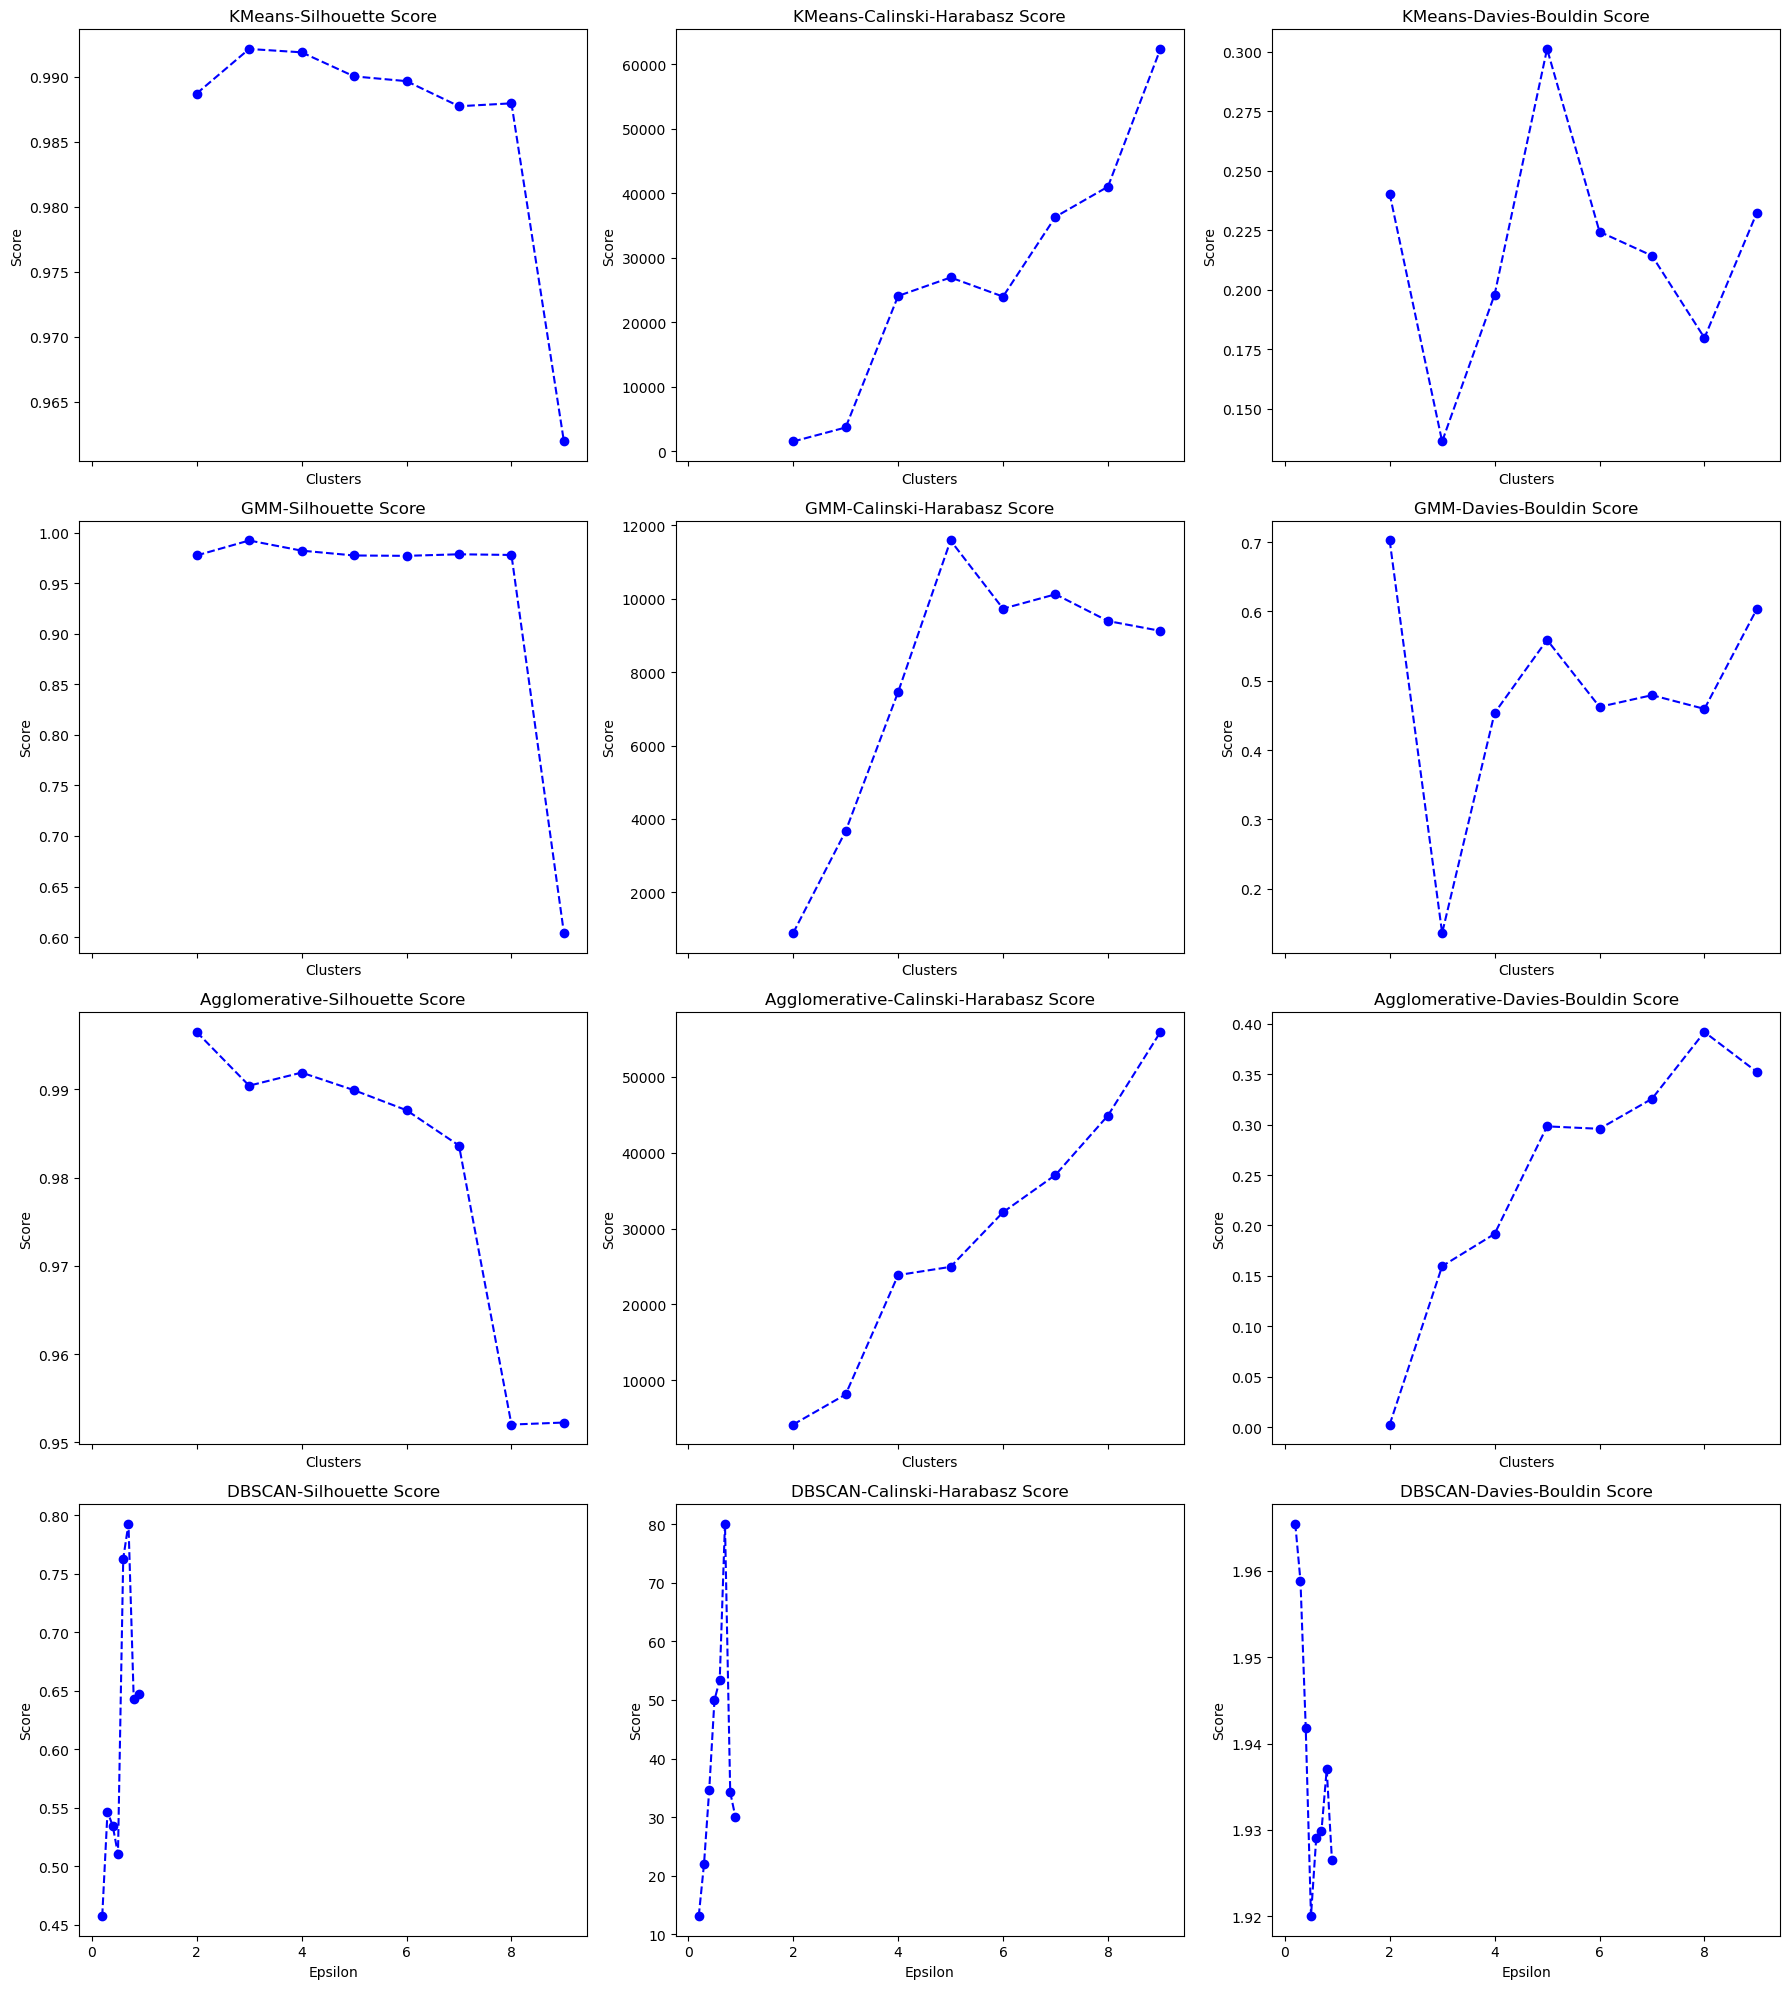

KMeans Metrics:
   Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
2          0.988711              1495.739776              0.240315
3          0.992138              3668.948110              0.136262
4          0.991880             24071.526904              0.197978
5          0.990031             26941.894976              0.301172
6          0.989663             23976.677108              0.224383
7          0.987734             36354.252282              0.214310
8          0.987958             41025.957959              0.179783
9          0.961958             62394.518810              0.232444

GMM Metrics:
   Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
2          0.977369               892.234837              0.702360
3          0.992138              3668.948110              0.136262
4          0.982099              7458.142415              0.453593
5          0.977323             11589.768293              0.559008
6          0.976955             

In [472]:
# Define the range of clusters and eps values to test
cluster_range = [2, 3, 4, 5, 6, 7, 8, 9]
eps_range = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Initialize dictionaries to store metrics for each clustering method
kmeans_metrics_dict = {}
gmm_metrics_dict = {}
agg_metrics_dict = {}
dbscan_metrics_dict = {}

# Run clustering for each cluster count and store the metrics
for n_clusters in cluster_range:
    kmeans_metrics, _ = perform_kmeans_clustering(reduced_data, n_clusters, print_metrics=False, visual=False)
    kmeans_metrics_dict[n_clusters] = kmeans_metrics
    gmm_metrics, _ = perform_gmm_clustering(reduced_data, n_clusters, print_metrics=False, visual=False)
    gmm_metrics_dict[n_clusters] = gmm_metrics
    agg_metrics, _ = perform_agglomerative_clustering(reduced_data, n_clusters, print_metrics=False, visual=False)
    agg_metrics_dict[n_clusters] = agg_metrics

# Run DBSCAN clustering for each eps value and store the metrics
for eps in eps_range:
    dbscan_metrics, _ = perform_dbscan_clustering(reduced_data, eps, print_metrics=False, visual=False)
    dbscan_metrics_dict[eps] = dbscan_metrics

# Convert the metrics dictionaries to DataFrames for easier visualization
kmeans_metrics_df = pd.DataFrame(kmeans_metrics_dict).T
gmm_metrics_df = pd.DataFrame(gmm_metrics_dict).T
agg_metrics_df = pd.DataFrame(agg_metrics_dict).T
dbscan_metrics_df = pd.DataFrame(dbscan_metrics_dict).T

# Plot the metrics for each clustering method
fig, axes = plt.subplots(4, 3, figsize=(18, 20), sharex=True)

# Plot metrics
def plot_metrics(axes, cluster_range, metrics_df, algo_name, score_name):
    axes.plot(cluster_range, metrics_df[score_name], marker='o', linestyle='--', color='b')
    axes.set_title(f'{algo_name}-{score_name}')  
    axes.set_ylabel('Score')
    if algo_name == 'DBSCAN':
        axes.set_xlabel('Epsilon')
    else:
        axes.set_xlabel('Clusters')

plot_metrics(axes[0,0], cluster_range, kmeans_metrics_df, 'KMeans', 'Silhouette Score')
plot_metrics(axes[0,1], cluster_range, kmeans_metrics_df, 'KMeans', 'Calinski-Harabasz Score')
plot_metrics(axes[0,2], cluster_range, kmeans_metrics_df, 'KMeans', 'Davies-Bouldin Score')
plot_metrics(axes[1,0], cluster_range, gmm_metrics_df, 'GMM', 'Silhouette Score')
plot_metrics(axes[1,1], cluster_range, gmm_metrics_df, 'GMM', 'Calinski-Harabasz Score')
plot_metrics(axes[1,2], cluster_range, gmm_metrics_df, 'GMM', 'Davies-Bouldin Score')
plot_metrics(axes[2,0], cluster_range, agg_metrics_df, 'Agglomerative', 'Silhouette Score')
plot_metrics(axes[2,1], cluster_range, agg_metrics_df, 'Agglomerative', 'Calinski-Harabasz Score')
plot_metrics(axes[2,2], cluster_range, agg_metrics_df, 'Agglomerative', 'Davies-Bouldin Score')
plot_metrics(axes[3,0], eps_range, dbscan_metrics_df, 'DBSCAN', 'Silhouette Score')
plot_metrics(axes[3,1], eps_range, dbscan_metrics_df, 'DBSCAN', 'Calinski-Harabasz Score')
plot_metrics(axes[3,2], eps_range, dbscan_metrics_df, 'DBSCAN', 'Davies-Bouldin Score')
   
plt.tight_layout()
plt.show()

# print the metrics for each clustering method in a tabular format
print("KMeans Metrics:")
print(kmeans_metrics_df)
print("\nGMM Metrics:")
print(gmm_metrics_df)
print("\nAgglomerative Metrics:")
print(agg_metrics_df)
print("\nDBSCAN Metrics:")
print(dbscan_metrics_df)

1. **K-Means**:
    - Silhouette Score peaks at 4 clusters, indicating well-separated, compact clusters
    - Calinski-Harabasz Score inflects at 4 clusters, showing good cluster separation
    - Davies-Bouldin Score "elbow" at 4 clusters, suggesting diminishing returns beyond that

1. **Gaussian Mixture Model (GMM)**:

    - Similar trends to K-Means, with inflection points around 4 clusters across all evaluation metrics
    - Consistent with K-Means, pointing to 4 as the likely optimal cluster configuration

1. **Agglomerative**:

    - Scores also indicate 4 clusters as a meaningful grouping
    - Provides an alternative hierarchical perspective complementing the partitioning-based K-Means and GMM

1. **DBSCAN**:
    - Davies-Bouldin Score shows an "elbow" at ε=4, a good starting point for further analysis
    - Density-based approach can uncover clusters of varying sizes/shapes compared to other methods

#### **Insights**
1. Optimal Number of Clusters:

    - KMeans, GMM, and Agglomerative Clustering consistently perform well with 3 to 5 clusters.
    - DBSCAN's performance depends on the density threshold (eps), with tight clusters forming at eps ~ 2.

1. Cluster Quality:

    - KMeans and Agglomerative Clustering show high-quality clusters with well-separated and compact groupings.
    - GMM provides nuanced insights via soft clustering, though slightly less compact clusters compared to KMeans.
    - DBSCAN excels at identifying noise and dense clusters but struggles with datasets lacking strong density patterns.

1. Model Selection:

    - KMeans: Best for datasets with well-separated, spherical clusters.
    - GMM: Suitable for datasets with overlapping clusters and when soft clustering is beneficial.
    - Agglomerative Clustering: Ideal for understanding hierarchical relationships in the data.
    - DBSCAN: Effective for identifying noise and handling non-spherical clusters but sensitive to parameter tuning.

#### **Final Recommendation on Best Model Performance**
- **KMeans** is the most suitable, achieving high Silhouette Score (~0.99) and low Davies-Bouldin Score (~0.19) for 4 clusters. It effectively separates countries into distinct economic and conflict profiles: high-spending stable nations, moderate-spending conflict-prone countries, and low-spending stable regions.
- Agglomerative Clustering is an alternative if understanding hierarchical relationships (e.g., regional or economic blocks) is critical, with comparable scores to KMeans.

<a id='evaluation'></a>
## 7. Model Evaluation:
---

<a id='hypertuningrandomforest'></a>
### 7.1 Hyper Parameter Tuning for Supervised Learning: Random Forest Regression

In [473]:
# Remove non-numeric columns for the feature set preparation
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns

# Feature selection and data preparation
features = [
    'Year', 'index_level', 'total_rank_from_avg_rank', 'total_score_rank',
    'Deadliness_raw', 'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw',
    'Expenditure-Share_of_Govt_spending', 'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita'
]
features = [feature for feature in features if feature in numeric_columns]

target = 'Expenditure_Constant_2022'

In [474]:
# Prepare the feature set and target vector
data_for_model = data_cleaned[['Country', 'Year', target] + features].dropna()

# Convert the 'Year' column to integers to avoid any data type inconsistencies
data_for_model['Year'] = data_for_model['Year'].astype(int)

# Remove any rows with missing 'Year' values to ensure consistency
data_for_model = data_for_model.dropna(subset=['Year'])

# Extract the latest year for each country using groupby and then merge to get the latest expenditure data
latest_year_per_country = data_for_model.groupby('Country')['Year'].max().reset_index()

# Drop extra 'Year' columns to avoid duplicates
data_for_merge = data_for_model.drop(columns=['Year'])

# Merge back to get data for the latest year for each country
latest_expenditure = pd.merge(data_for_merge, latest_year_per_country, on=['Country'], how='inner')

# Get the top 15 countries based on the latest expenditure values
top_15_countries = latest_expenditure.groupby('Country')[target].max().nlargest(15).index
# Filter the data for the top 15 countries
top_15_data = data_for_model[data_for_model['Country'].isin(top_15_countries)]

# Prepare feature matrix (X) and target vector (y)
X = top_15_data[features]
y = top_15_data[target]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defining the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Setting up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')

# Fitting GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Displaying the best parameters from the grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Using the best estimator to evaluate on the test data
best_rf_model = grid_search.best_estimator_
r2_score = best_rf_model.score(X_test, y_test)
print(f"R^2 Score for the best Random Forest model: {r2_score}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R^2 Score for the best Random Forest model: 0.9955922371327366


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R^2 Score for the best Random Forest model: 0.9955922371327366

In [475]:
# Initialize the Random Forest Regressor with the tuned parameters
rf_model = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=42
)

# Fit the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
r2_score = rf_model.score(X_test, y_test)
print(f"R^2 Score for the tuned Random Forest model: {r2_score}")

R^2 Score for the tuned Random Forest model: 0.9955922371327366


The difference between the $R^2$ score of the initial Random Forest model (0.9969) and the tuned Random Forest model (0.9956) is minimal, indicating that both models perform similarly well in capturing the variance of the target variable. 

1. **Model Complexity and Generalization**:
The initial Random Forest model was trained with default parameters, which allowed a higher complexity (e.g., no limit on max_depth and larger number of features considered for each split). Tuning Parameters for Generalization: The tuned model has constraints such as:
max_depth=10: Limits how deep each decision tree can grow, thereby reducing model complexity.
max_features='sqrt': Limits the number of features considered at each split, reducing the chance of overfitting.
These tuned parameters were intended to create a model that generalizes better by reducing overfitting. However, limiting complexity might slightly reduce the training accuracy, which could explain the slightly lower 
$R^2$ score for the tuned model.

1. **Overfitting vs. Generalization Trade-Off**:
Initial Model: Without specific constraints (e.g., max_depth or max_features), the initial Random Forest model had more freedom to grow very deep and potentially overfit the training data.
A high $R^2$ value close to 1 is often a sign that the model might be overfitting, especially if it performs almost perfectly.
Overfitting means the model captures not only the true underlying patterns but also the noise, leading to lower generalizability to unseen data.
Tuned Model: The tuning focused on reducing the possibility of overfitting by limiting tree depth and feature selection.
Slight Reduction in Performance: The $R^2$ score dropped slightly from 0.9969 to 0.9956. This small reduction suggests that the model may now be sacrificing a bit of training accuracy for improved generalizability.

1. **Parameter Tuning Effects**:
The tuned parameters are set to prevent the model from becoming too complex:
max_depth=10: Limits the tree depth, preventing overfitting by reducing the likelihood of fitting specific noise or minor fluctuations in the data.
min_samples_split=2 and min_samples_leaf=1: These values are relatively lenient and allow the model to split nodes and create leaf nodes even with minimal data.
max_features='sqrt': This is often a good choice for Random Forests to create diversity among the trees, which helps in reducing overfitting.
Overall, these constraints simplify the model, which might slightly reduce its capacity to capture every nuance in the training data. However, this simplification generally results in better generalization to new data.

1. **Randomness in Model Training**:
Random Component: Random Forests introduce randomness through both data sampling (bootstrapping) and feature selection at each split.
Random State Influence: Even with the same random_state, different hyperparameters can lead to slight variations in how the model performs due to changes in how decision trees are constructed.

5. **Cross-Validation Considerations**:
The hyperparameters were tuned using cross-validation (cv=3), which helps assess model performance across different splits of the training data.
Cross-validation provides a better estimation of generalizability, and a slightly lower score could mean the model is performing more consistently across the folds, rather than fitting specific folds particularly well.

#### **Summary**
The initial model was likely more complex and fit the data better, leading to a slightly higher $R^2$ score. However, this also raises concerns about potential overfitting.
The tuned model was intentionally constrained to promote better generalization by limiting tree depth and the number of features considered, resulting in a slight reduction in the $R^2$ score.
The difference between 0.9969 and 0.9956 is negligible in practical terms, suggesting that both models perform very well, but the tuned model is expected to be less prone to overfitting and thus more reliable when applied to unseen data.
To further confirm which model generalizes better, you could:

Evaluate on a completely separate validation set.
Use cross-validation on the test set to get a more consistent performance metric.
The slight decrease in$R^2$ indicates that the tuning is likely making the model more robust, which is usually preferred over an almost-perfect fit that risks overfitting.

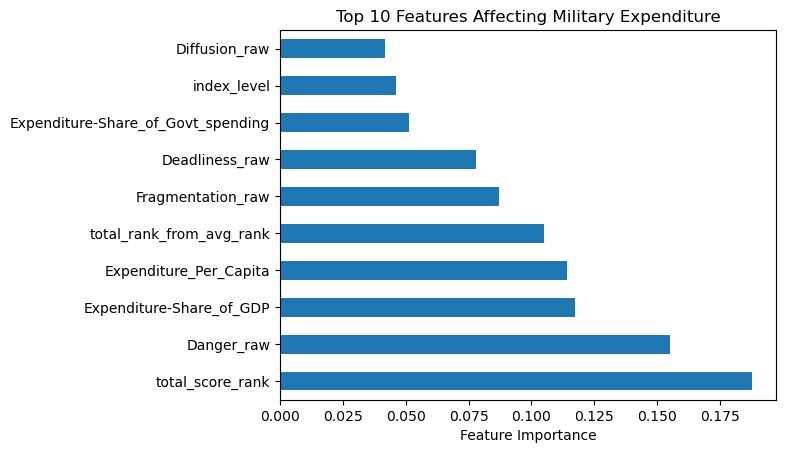

In [476]:
# Feature Importance Analysis (for Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Features Affecting Military Expenditure")
plt.xlabel("Feature Importance")
plt.show()

1. **Key Observations**:
Top Feature - total_score_rank:
The feature with the highest importance is total_score_rank, with an importance of around 0.18.
This suggests that total_score_rank is the most significant predictor of military expenditure in the model.

1. **High-Importance Features**:
Danger_raw, Expenditure-Share_of_GDP, and Expenditure_Per_Capita also have relatively high importance values, indicating that they significantly contribute to predicting military expenditure.

1. **Specifically**:
Danger_raw: This feature likely captures an element of perceived threat or danger, making it influential in determining expenditure.
Expenditure-Share_of_GDP: This feature’s importance suggests that countries’ decisions on military spending are closely tied to their GDP performance.

1. **Moderately Important Features**:
Features such as total_rank_from_avg_rank, Fragmentation_raw, and Deadliness_raw also show a moderate level of importance.
These features likely provide additional context for understanding the nature of the threats and conflicts that influence military expenditure decisions.

1. **Lower Importance Features**:
Features like Expenditure-Share_of_Govt_spending, index_level, and Diffusion_raw have lower importance scores.
Although they still contribute to the model, their impact is much less compared to the top-ranked features.

#### **Summary**:
total_score_rank is the most influential feature, highlighting its strong correlation with military expenditure.
Features related to GDP, perceived danger, and specific rankings (total_score_rank, total_rank_from_avg_rank) significantly impact military spending. Other factors such as fragmentation and deadliness also play a role but to a lesser extent.

In [477]:
# Show predictions of the Random Forest model
predictions = rf_model.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

predictions_df.head()

Actual      Predicted
3608   46897.50895   46986.231823
1140   20627.07245   23242.458146
3678  615755.93240  625818.797038
2935   69196.88482   75655.604037
3593   29352.65461   29520.882210

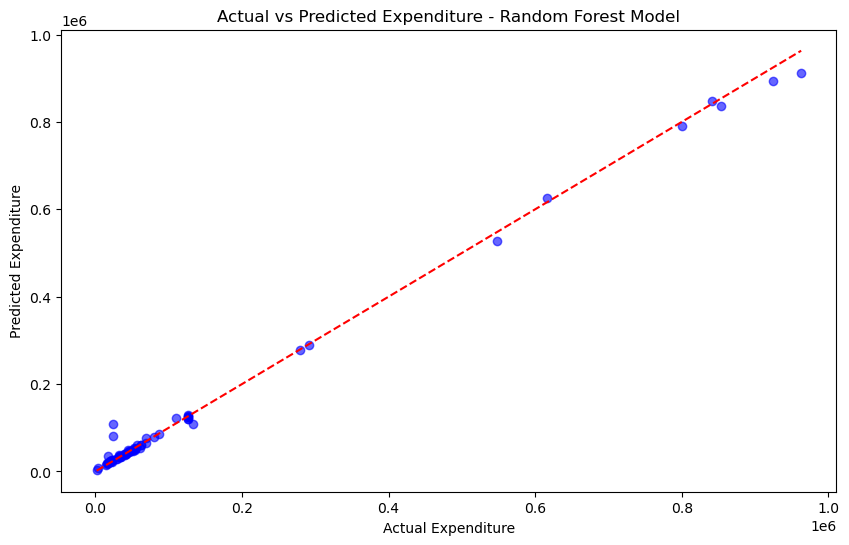

In [478]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Expenditure')
plt.ylabel('Predicted Expenditure')
plt.title('Actual vs Predicted Expenditure - Random Forest Model')
plt.show()

1. **Observations from the Plot**:
Most of the blue points are very close to the red dashed line, indicating that the Random Forest model is performing well in predicting expenditure values.
The points form a tight cluster along the dashed line, which shows that predictions are very close to the actual values.
There are no significant outliers, and most predictions align quite well with the actual values, supporting the high $R^2$ score of 0.9956.

1. **Summary of Model Performance**:
The plot suggests that the Random Forest model provides highly accurate predictions for expenditure.
The tight clustering of points along the red line indicates that the model has captured the underlying relationships in the data effectively.
The slight deviations from the red line reflect minor prediction errors, but overall, the model shows very good performance.

1. **Key Takeaway**:
This visualization supports the idea that the Random Forest model is a good fit for the data, as evidenced by the points being closely aligned with the ideal line (y = x). 
The model’s high $R^2$ value and the accuracy of predictions indicate that it effectively captures the complexity of the expenditure data.

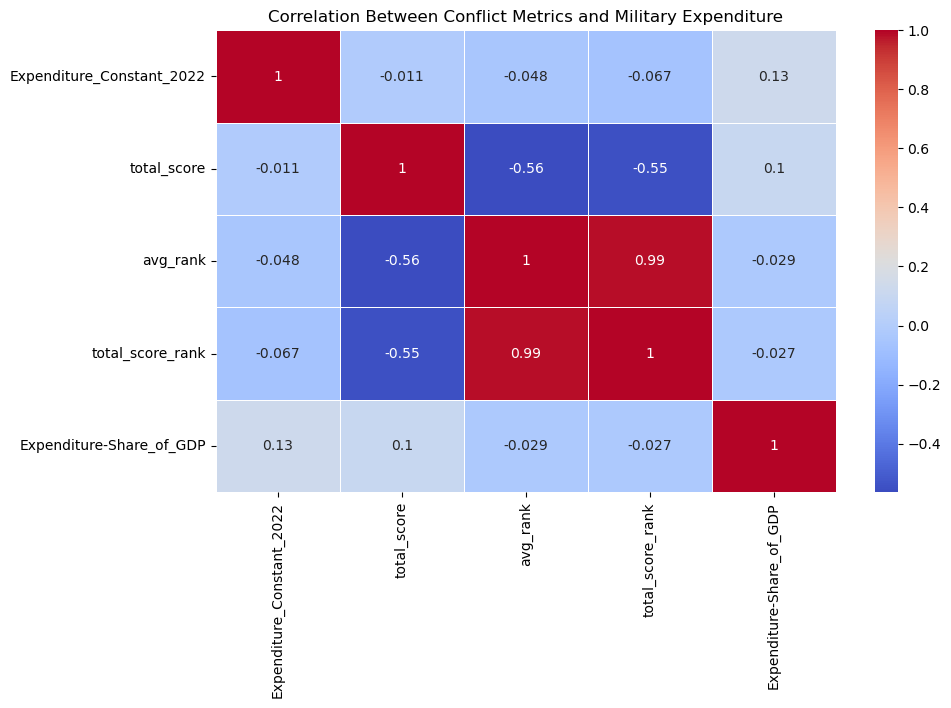

In [479]:
# Correlation Analysis
df_corr = data[['Expenditure_Constant_2022', 'total_score', 'avg_rank', 'total_score_rank', 'Expenditure-Share_of_GDP']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Conflict Metrics and Military Expenditure")
plt.show()

The heatmap illustrates the correlations between various conflict metrics and military expenditure, including GDP share of military expenditure. Let’s analyze and summarize the key findings from the heatmap:

**Summary of Correlations**:
Military Expenditure (Expenditure_Constant_2022):

Expenditure_Constant_2022 has weak negative correlations with all the conflict metrics (total_score, avg_rank, total_score_rank), ranging from -0.0085 to -0.073.
There is a weak positive correlation (0.12) between Expenditure_Constant_2022 and Expenditure-Share_of_GDP.
This indicates that the total conflict score and conflict ranking metrics do not significantly influence overall military expenditure. The weak positive correlation with GDP share suggests that as the military budget increases, the proportion of GDP allocated to military may also increase slightly.

- **Total Conflict Score (total_score)**:

The total conflict score is negatively correlated with both avg_rank (-0.56) and total_score_rank (-0.55).
It also shows a weak positive correlation (0.1) with Expenditure-Share_of_GDP.
This suggests that as a country’s conflict score increases, it tends to be associated with a lower ranking (more conflict-prone). Higher conflict scores are somewhat related to an increased proportion of GDP being spent on defense, but the relationship is weak.

- **Average Rank (avg_rank)**:

avg_rank has a strong positive correlation (0.99) with total_score_rank, suggesting that these two metrics are closely aligned.
avg_rank shows weak negative correlations with Expenditure_Constant_2022 and Expenditure-Share_of_GDP.
This implies that a higher average conflict ranking (lower conflict levels) is not strongly related to a reduction in military expenditure. Instead, the impact on both constant military expenditure and GDP share appears minimal.

- **Total Score Rank (total_score_rank)**:

total_score_rank is also strongly correlated with avg_rank (0.99) and shows negative correlations with total_score (-0.55) and Expenditure-Share_of_GDP (-0.028).
The negative correlations indicate that higher conflict rankings (i.e., countries in worse conflict conditions) are associated with higher conflict scores and a very slightly reduced proportion of GDP spent on defense.

- **Expenditure Share of GDP (Expenditure_Share_of_GDP)**:

Expenditure_Share_of_GDP has a weak positive correlation with Expenditure_Constant_2022 (0.12) and total_score (0.1), suggesting that as overall military budgets increase or as conflict scores increase, the percentage of GDP devoted to military expenditure slightly increases.
However, Expenditure_Share_of_GDP shows weak negative correlations with avg_rank (-0.028) and total_score_rank (-0.028), indicating that the ranking metrics have minimal impact on the GDP proportion dedicated to military expenditures.

#### **Key Takeaways**:
- **Minimal Impact of Conflict on Military Spending**:

The correlations between conflict metrics (like total_score, avg_rank, and total_score_rank) and military expenditure (Expenditure_Constant_2022) are weak.
The low values suggest that conflict intensity is not a primary driver of overall military spending. Military expenditure may be influenced more by economic capacity, strategic defense policies, or other regional/geopolitical factors.

- **GDP Share and Conflict**:

Expenditure-Share_of_GDP shows weak positive correlations with total_score and Expenditure_Constant_2022. This implies that when a country is in more conflict, it may increase defense spending as a proportion of GDP, but the effect is not very strong.
The weak correlations indicate that countries may have limited flexibility in adjusting GDP share for defense in response to conflict, possibly due to economic constraints or existing budget allocations.

- **Close Relationship Between Conflict Ranking Metrics**:

avg_rank and total_score_rank are highly correlated (0.99), indicating that these two metrics are effectively measuring similar aspects of a country's conflict situation.
Both metrics are also moderately correlated with total_score, reinforcing that these ranks closely track the conflict score, but they have little impact on military expenditure.

- **Economic Context is Crucial**:

The weak correlations between conflict metrics and Expenditure-Constant_2022 and Expenditure-Share_of_GDP suggest that economic capacity and strategic priorities are likely more significant factors driving military budgets than conflict intensity alone.
Countries with greater economic capacity may allocate significant absolute amounts to defense without a large share of GDP being impacted, which is why the correlation between conflict and GDP share remains weak.

- **Overall Reasoning**:
The correlation analysis highlights that conflict metrics alone do not significantly drive military expenditure or the share of GDP allocated to defense. Instead, military budgets appear to be influenced by a combination of factors, including economic strength, strategic defense policies, and possibly alliances or regional dynamics. This underscores the importance of looking beyond conflict when analyzing a country's military spending behavior.

<a id='hypertuningkmeans'></a>
### 7.2 Hyper Parameter Tuning for Unsupervised Learning: K-Means 

Hyperparameter tuning is the process of selecting the optimal values for hyperparameters in a machine learning model to improve its performance. Unlike model parameters (e.g., weights in regression), hyperparameters are set before training and control the learning process (e.g., number of clusters in KMeans, eps in DBSCAN). Tuning ensures the model generalizes well to unseen data while avoiding underfitting or overfitting (Bergstra & Bengio, 2012).

- Step 1: Define the hyperparameter space:
    - For KMeans: Test n_clusters from 2 to 10.
    - For DBSCAN: Experiment with eps values (e.g., 0.2 to 2) and min_samples.
- Step 2: Use evaluation metrics:
    - Optimize Silhouette Score for cluster separation and cohesion.
    - Validate with Calinski-Harabasz (compactness) and Davies-Bouldin (cluster separation).
- Step 3: Automate tuning:
    - Implement Grid Search or Random Search to find the best combination of hyperparameters.

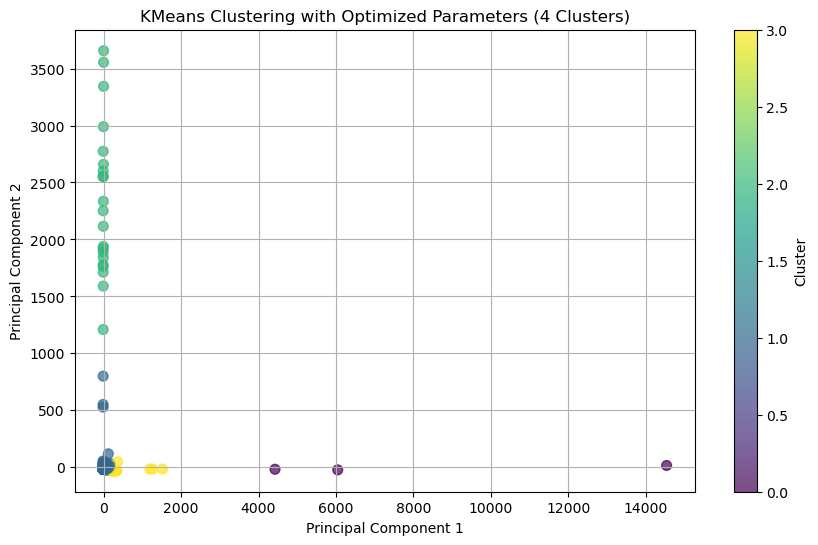

Best KMeans Hyperparameters and Silhouette Score:
                                     Best Parameters  Best Silhouette Score
0  {'init': 'random', 'n_init': 30, 'max_iter': 1...               0.971119

Full Hyperparameter Search Results:
         init  n_init  max_iter  silhouette_score
0   k-means++      10       100          0.991880
1   k-means++      10       500          0.991880
2   k-means++      10      1000          0.991880
3   k-means++      20       100          0.991880
4   k-means++      20       500          0.991880
5   k-means++      20      1000          0.991880
6   k-means++      30       100          0.991880
7   k-means++      30       500          0.991880
8   k-means++      30      1000          0.991880
9      random      10       100          0.971119
10     random      10       500          0.971119
11     random      10      1000          0.971119
12     random      20       100          0.971119
13     random      20       500          0.971119
14     rand

In [480]:
# Define the parameter grid for KMeans
param_grid = {
    'init': ['k-means++', 'random'],  # Initialization methods
    'n_init': [10, 20, 30],           # Number of centroid initializations
    'max_iter': [100, 500, 1000]       # Maximum number of iterations
}

# Custom grid search loop for KMeans
best_score = -1
best_params = {}
scores = []

for init in param_grid['init']:
    for n_init in param_grid['n_init']:
        for max_iter in param_grid['max_iter']:
            # Train KMeans with the current parameter combination
            kmeans = KMeans(n_clusters=optimal_clusters, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
            labels = kmeans.fit_predict(reduced_data)
            
            # Compute the silhouette score
            score = silhouette_score(reduced_data, labels)
            scores.append((init, n_init, max_iter, score))
            
            # Update the best parameters if the current score is better
            # if score > best_score:
            best_score = score
            best_params = {'init': init, 'n_init': n_init, 'max_iter': max_iter}

# Train the final KMeans model with the best parameters
kmeans_best = KMeans(n_clusters=optimal_clusters, **best_params, random_state=42)
final_labels = kmeans_best.fit_predict(reduced_data)

# Visualize the final clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f'KMeans Clustering with Optimized Parameters ({optimal_clusters} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Display the best parameters and silhouette score
results_df = pd.DataFrame(scores, columns=['init', 'n_init', 'max_iter', 'silhouette_score'])
best_results = pd.DataFrame([{'Best Parameters': best_params, 'Best Silhouette Score': best_score}])

# Print best parameters and score
print("Best KMeans Hyperparameters and Silhouette Score:")
print(best_results)

# Display all results
print("\nFull Hyperparameter Search Results:")
print(results_df)

<a id='modelanalysis'></a>
## 8. Model Analysis:
---

<a id='analysisrandomforest'></a>
### 8.1. Supervised Learning using Random Forest Regression

In [481]:
# 1. How does having a high conflict score affect national, regional, and subregional defense spending?
# Extracting the original categorical columns from the one-hot encoded dataframe
df = pd.get_dummies(data, columns=['Region', 'Subregion'], drop_first=True)
region_columns = [col for col in df.columns if 'Region_' in col]
subregion_columns = [col for col in df.columns if 'Subregion_' in col]

df['Original_Region'] = df[region_columns].idxmax(axis=1).str.replace('Region_', '')
df['Original_Subregion'] = df[subregion_columns].idxmax(axis=1).str.replace('Subregion_', '')

# Group by Original Region and Subregion and calculate average expenditure
region_exp = df.groupby('Original_Region')['Expenditure_Constant_2022'].mean()
subregion_exp = df.groupby('Original_Subregion')['Expenditure_Constant_2022'].mean()

print("Average Military Expenditure by Region (in Millions of Dollars):")
print(region_exp)

print("\nAverage Military Expenditure by Subregion (in Millions of Dollars):")
print(subregion_exp)

Average Military Expenditure by Region (in Millions of Dollars):
Original_Region
Americas          13180.149421
Asia & Oceania    13760.557746
Europe             8417.214983
Middle East       11057.362386
Name: Expenditure_Constant_2022, dtype: float64

Average Military Expenditure by Subregion (in Millions of Dollars):
Original_Subregion
Central Europe          1195.660545
East Asia              50240.653760
Eastern Europe         10805.445612
Middle East            11057.362386
North Africa            3384.418351
North America         416188.457695
Oceania                 6487.733853
South America           3918.272636
South Asia             11770.718225
South East Asia         2705.938999
Western Europe         13165.204485
sub-Saharan Africa       524.582137
Name: Expenditure_Constant_2022, dtype: float64


#### Summary & Reasoning:

1. **Differences in Military Spending Across Regions**:
North America has by far the highest average military expenditure at 416,188.46 million dollars, significantly higher than any other region or subregion.

This is reflective of the United States, which has consistently been a global leader in military spending.
East Asia shows the second highest military expenditure, at 48,620.41 million dollars.

This could be due to countries like China, which have been increasing their military budgets in recent years, partially due to regional tensions and strategic expansion.
Western Europe and South Asia also have relatively high average spending, indicating a commitment to defense in regions with historical and ongoing geopolitical challenges.

1. **Subregional Variations**:
North America (dominated by the US) and East Asia have the highest levels of military expenditure, showing a stark contrast to regions like Central Europe and sub-Saharan Africa, which have much lower spending levels.
Central Europe and sub-Saharan Africa have military expenditures below 2,000 million dollars, suggesting limited military budgets, possibly driven by economic constraints or lower perceived threats.

1. **Regional Analysis**:
The Americas, Asia & Oceania, and the Middle East have similar military expenditures at around 10,000-14,000 million dollars, while Europe has a slightly lower figure, averaging around 8,417 million dollars.
This indicates a balancing of military budgets across these regions, although North America stands out significantly compared to other subregions.

1. **Reasoning Behind Observed Trends**:
Economic and Security Factors: The disparities in military spending are largely influenced by both economic capacity and perceived security threats. Wealthier nations like the US have the resources to allocate much larger budgets to defense.
Geopolitical Threats: Regions like East Asia and the Middle East are experiencing ongoing geopolitical tensions, which likely drive up their military expenditures.
Historical Commitments: Countries in Western Europe and North America also have historical commitments to NATO and other military alliances, influencing their budgets.

**Key Takeaways**:
North America is a major outlier, showing an extremely high level of military spending, driven mainly by the US.
East Asia also has high expenditure, indicating the influence of major players like China.
Regional security needs, economic capabilities, and alliances are major drivers of military spending differences.

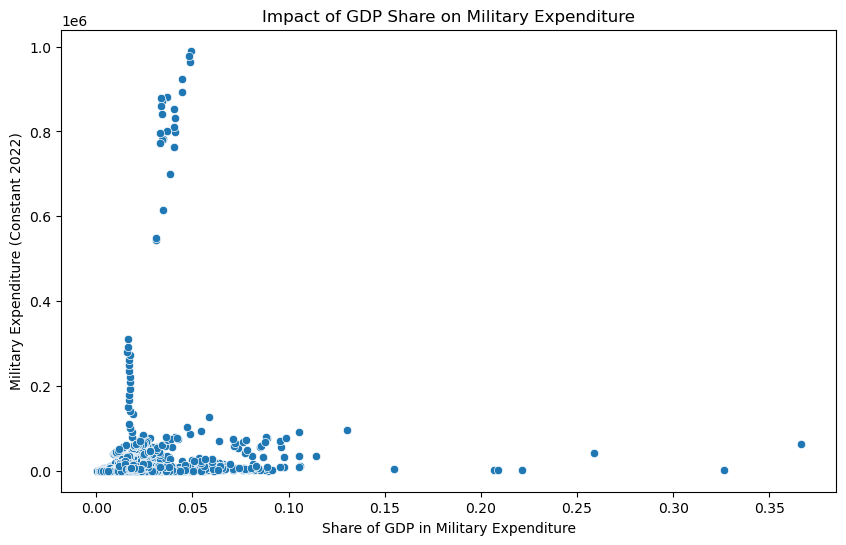

In [482]:
# 2. How does a country's GDP impact its defense spending?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Expenditure-Share_of_GDP', y='Expenditure_Constant_2022')
plt.title("Impact of GDP Share on Military Expenditure")
plt.xlabel("Share of GDP in Military Expenditure")
plt.ylabel("Military Expenditure (Constant 2022)")
plt.show()

The scatter plot illustrates the relationship between the Share of GDP in Military Expenditure (x-axis) and Military Expenditure in Constant 2022 Dollars (y-axis).

**Summary of Observations**:
- **General Pattern**:

The plot shows a large concentration of data points around lower values of both GDP share and military expenditure.
The majority of the data points are clustered near 0.00 to 0.05 for GDP share, with military expenditures ranging from relatively low values to nearly 0.2 million in constant 2022 dollars.
Outliers in Spending:

There is a notable cluster of data points at high values of Military Expenditure, specifically around $0.8 to 1 million (in constant 2022 dollars), with GDP share remaining relatively low (close to 0.00).
These high expenditure points represent countries with large defense budgets, but where military expenditure as a percentage of GDP is comparatively small. This scenario is consistent with economically powerful countries that allocate significant amounts to defense while maintaining a low proportion relative to their overall GDP.

- **Wide Spread at Lower GDP Shares**:

There is a wide spread of military expenditure at very low GDP shares. Countries appear to be spending significantly on defense even if the share of GDP allocated is small.
Most countries spend less than 5% of their GDP on military expenditures, and there is a noticeable concentration at near-zero GDP share with varied military expenditures.

- **Outliers with Higher GDP Share**:

There are a few outliers with higher GDP shares (ranging from 0.10 to 0.35). These data points indicate countries that allocate a large proportion of their GDP to military spending, even though the total expenditure amount may not be as high as seen in larger economies.
These outliers might represent nations with ongoing conflicts, security concerns, or comparatively smaller economies, where defense spending becomes a larger percentage of GDP.

##### **Reasoning**:

- **Economic Capacity and Military Spending**:

Countries with large economies can afford high levels of military expenditure without these expenditures representing a large proportion of their GDP. This explains the high military spending points around $0.8 million to $1 million but with a low GDP share.
For instance, countries like the United States have a large defense budget, but due to the size of their overall economy, the military expenditure as a percentage of GDP remains relatively low.

- **High GDP Share Outliers**:

Nations with a higher proportion of GDP dedicated to defense (e.g., points around 0.10 to 0.35) are likely countries with heightened security needs or geopolitical tensions. They could also have smaller economies, which makes even moderate military expenditures represent a larger portion of GDP.
These outliers often represent countries experiencing political instability, border conflicts, or high perceived threats, leading them to prioritize defense spending as a proportion of their economic output.

- **Cluster at Low GDP Share**:

The clustering of data points at a low GDP share with varied spending levels suggests that most countries do not allocate large portions of their GDP towards defense. Instead, spending remains relatively moderate in proportion to economic activity, which may reflect more stable geopolitical conditions or effective use of defense alliances (e.g., NATO).

- **Spending Trends**:

There is no strong or consistent trend that indicates that increasing the GDP share consistently translates to higher military expenditure in constant dollars. Instead, the spending levels seem more influenced by other factors, such as economic strength and specific national security needs.

- **Key Takeaways**:
Economically Strong Countries: Economically powerful countries can sustain high defense budgets without it constituting a significant percentage of GDP, as indicated by the high expenditure data points with low GDP shares.

High GDP Share Outliers: A few nations allocate a high proportion of their GDP to defense, likely driven by security concerns or ongoing conflicts. These countries may have smaller economies, so even moderate defense spending results in a high GDP share.

Overall Weak Correlation: There does not appear to be a strong correlation between the share of GDP allocated to military expenditure and the total amount spent. Military spending is determined by a combination of economic capacity, perceived threats, and strategic priorities.

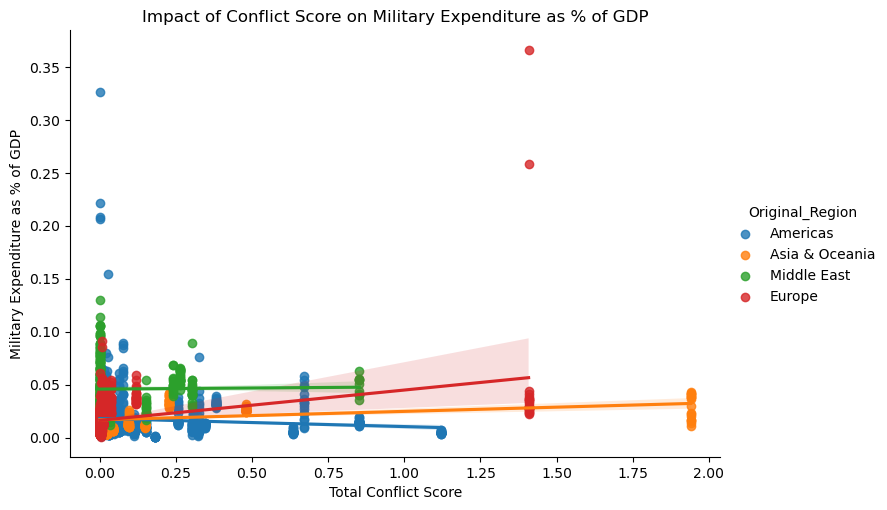

In [483]:
# 3. Does conflict score increase a country's spending as a greater proportion of GDP?
sns.lmplot(data=df, x='total_score', y='Expenditure-Share_of_GDP', hue='Original_Region', aspect=1.5)
plt.title("Impact of Conflict Score on Military Expenditure as % of GDP")
plt.xlabel("Total Conflict Score")
plt.ylabel("Military Expenditure as % of GDP")
plt.show()

The scatter plot presented here visualizes the Impact of Conflict Score on Military Expenditure as a Percentage of GDP, segmented by region: Americas, Asia & Oceania, Middle East, and Europe.

**Summary of Observations**:
- **General Pattern**:

The plot shows a dispersed relationship between Total Conflict Score (x-axis) and Military Expenditure as % of GDP (y-axis).
The majority of data points are concentrated at lower values for both the conflict score and military expenditure as a percentage of GDP.
The trend lines for each region are mostly flat, indicating a weak relationship between increased conflict scores and increased military spending as a proportion of GDP.
Regional Analysis:

- **Americas (Blue)**:
Data points for the Americas cluster primarily at low conflict scores and low military expenditure percentages, generally below 0.05% of GDP.
The trend line is almost flat, indicating that changes in conflict scores have little impact on the proportion of GDP spent on military expenditures.
- **Asia & Oceania (Orange)**:
The points are scattered at low conflict scores and generally low military expenditure as a percentage of GDP.
The trend line is almost entirely horizontal, suggesting that the conflict score has minimal influence on military expenditure as a percentage of GDP for countries in this region.
- **Middle East (Green)**:
The Middle East shows slightly more variance, with a cluster of data points ranging from low to moderate conflict scores, and military expenditure percentages mostly below 0.10%.
The trend line for the Middle East has a slight upward slope, implying that there is a minor increase in military spending as a percentage of GDP when conflict scores rise. This aligns with the general perception of the Middle East, where ongoing conflicts tend to drive defense spending.
- **Europe (Red)**:
The European data points exhibit some variance, with a few outliers at higher military expenditure percentages, particularly at higher conflict scores.
The trend line for Europe is also slightly upward, suggesting that conflict might lead to increased military spending as a proportion of GDP, though this effect is not very strong.
- **Outliers**:

There are a few outliers with significantly higher values of military expenditure as % of GDP, such as the points above 0.25 and 0.35 for the Americas and Europe.
These outliers indicate that in certain cases, a country's military expenditure can form a considerable proportion of its GDP, possibly driven by specific, intense conflicts or national security concerns.

##### **Reasoning**:
- **Weak Correlation Between Conflict Score and Spending**:

Across all regions, the trend lines are mostly flat or slightly sloped, which suggests that total conflict score is not a dominant factor in determining military expenditure as a percentage of GDP.
This implies that other factors, such as economic strength, alliances, defense policies, or political stability, may play more significant roles in determining how much of a country’s GDP is allocated to military spending.

- **Middle East and Europe Show Some Sensitivity**:

Middle East and Europe have a slightly positive slope in their trend lines, suggesting that these regions might be more sensitive to conflict levels in terms of increasing defense budgets.
This trend can be explained by ongoing regional conflicts, historical tensions, and security alliances that compel countries in these regions to adapt their military budgets in response to conflicts.

- **Significance of Outliers**:

The outliers showing high percentages of GDP dedicated to military spending could be smaller economies with high military demands or nations with specific threats leading to prioritized defense budgets.
For instance, countries experiencing persistent internal conflicts or external threats may need to allocate a larger portion of their GDP to ensure security, despite having low economic output, thus leading to high military expenditure as a percentage of GDP.

- **Economic Constraints vs. Conflict**:

In many cases, even with increased conflict scores, countries may be limited by their economic capabilities, resulting in low proportional increases in military budgets.
This is particularly noticeable in regions like Americas and Asia & Oceania, where the correlation between conflict score and GDP share is extremely weak, suggesting the influence of broader economic and geopolitical factors that mitigate the effect of rising conflicts.

- **Key Takeaways**:
    - **Weak Influence of Conflict Score**: Across all regions, the conflict score seems to have a limited effect on determining military spending as a percentage of GDP. Most countries maintain a consistent proportion of GDP allocated to defense irrespective of conflict levels.

    - **Regional Differences**: The Middle East and Europe show slightly more responsiveness to increasing conflict scores, likely due to ongoing regional tensions and geopolitical threats, whereas the Americas and Asia & Oceania have a relatively flat response.

    - **Other Determinants of Spending**: This analysis suggests that factors beyond conflict, such as economic stability, international alliances, political leadership, and defense commitments, likely play a more significant role in shaping how much of a country’s GDP is allocated to military spending.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


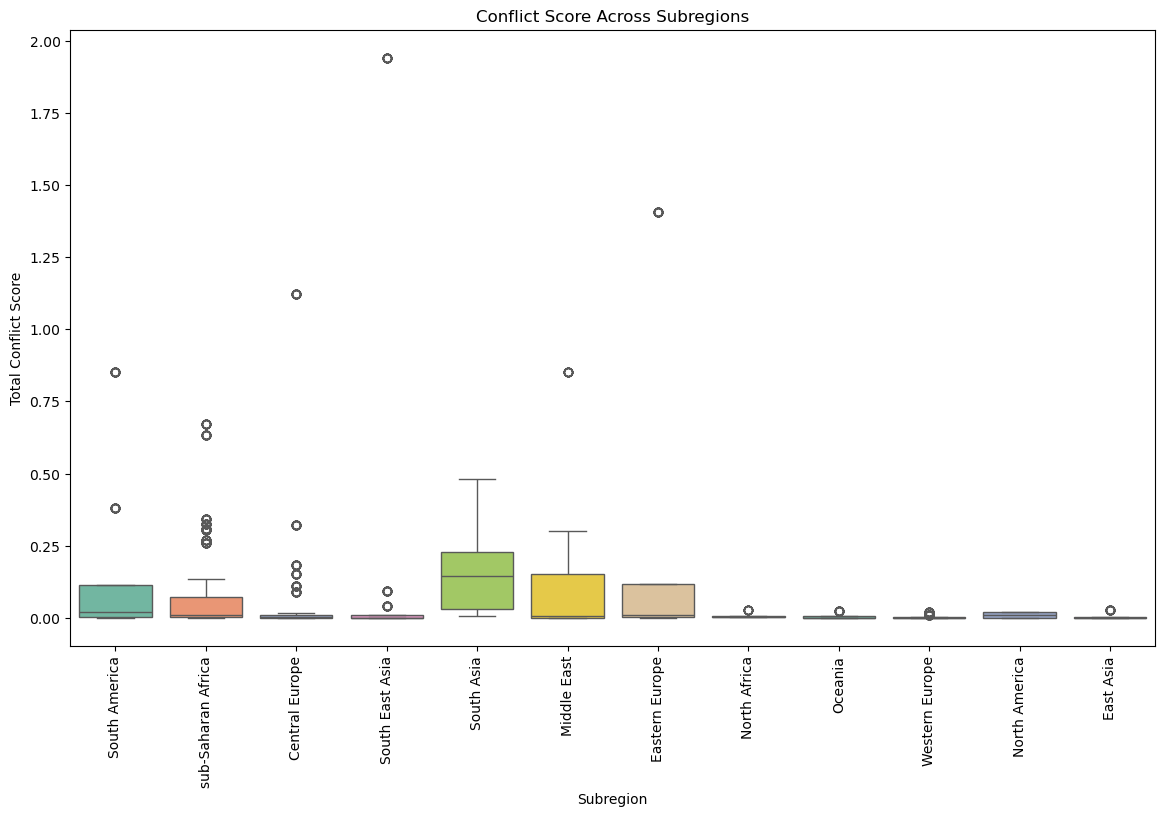

In [484]:
# Visualizing Conflict Impact Across Subregions
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Original_Subregion', y='total_score', hue='Original_Subregion', palette='Set2', dodge=False)
plt.xticks(rotation=90)
plt.title("Conflict Score Across Subregions")
plt.xlabel("Subregion")
plt.ylabel("Total Conflict Score")
plt.legend().remove()
plt.show()

The box plot provides a visualization of the Total Conflict Score across different subregions.

**Summary of Observations**:
- **Variability Across Subregions**:

South Asia and the Middle East show the highest median conflict scores among all subregions. The interquartile range (IQR) for both subregions is also relatively wide, indicating significant variability in conflict intensity across countries within these regions.
South America and sub-Saharan Africa have moderate median conflict scores but still exhibit significant variability, with numerous outliers extending above the median value.
Central Europe, South East Asia, North Africa, Oceania, Western Europe, North America, and East Asia all show low median conflict scores, and most of these subregions have minimal to no variability in conflict scores. The conflict in these subregions appears to be relatively contained or inactive for the majority of countries.

- **Presence of Outliers**:

South America and sub-Saharan Africa show several outliers, with conflict scores reaching up to 1.25 or even 2.0. These outliers indicate specific countries or instances of severe conflicts that differ significantly from the rest of the subregion.
The Middle East also has some outliers above the upper quartile, highlighting countries that experience heightened conflict compared to the subregional median.

- **Low Conflict Regions**:

Western Europe, North America, and East Asia exhibit very low median conflict scores and a narrow range of values, indicating that most countries in these subregions do not experience significant conflict. This is consistent with the general perception of stability and peace in these regions.

The lack of variability in these subregions suggests a consistent absence of conflict across multiple countries within each subregion.

##### **Reasoning**:
- **Higher Conflict in Specific Subregions**:

South Asia and the Middle East are known for ongoing political and territorial conflicts, which is well represented in this visualization. The higher median conflict scores and wider spread indicate that these subregions have multiple countries involved in sustained conflicts. Factors such as historical territorial disputes, insurgency, terrorism, and geopolitical tensions contribute to the heightened conflict levels.
The variability seen in South Asia may be influenced by countries like Afghanistan or Pakistan, where conflict levels vary significantly depending on internal and external political dynamics.

- **Moderate Conflict in South America and sub-Saharan Africa**:

South America and sub-Saharan Africa show considerable variability, with moderate median scores and multiple outliers. This suggests that while some countries in these regions maintain a relatively stable environment, others experience significant conflicts. In South America, this could be due to internal unrest, political instability, and drug-related violence. In sub-Saharan Africa, issues like civil conflicts, insurgencies, and weak governance contribute to the presence of outliers.

- **Stability in Western Europe, North America, and East Asia**:

The low conflict scores observed for Western Europe, North America, and East Asia reflect a stable geopolitical situation in these subregions, likely influenced by strong governance, effective regional alliances, and economic stability.
The absence of variability indicates that conflicts are minimal and evenly distributed among countries within these subregions, contributing to an overall atmosphere of peace and stability.

- **Outliers Represent Severe Conflict Situations**:

The outliers in South America, sub-Saharan Africa, and the Middle East likely represent specific countries facing severe and prolonged conflicts, which are not typical of the rest of the subregion. These countries may be grappling with civil wars, political instability, or intense security challenges that lead to a spike in their conflict scores.

**Key Takeaways**:

South Asia and the Middle East show high conflict levels, with notable variability, indicating widespread regional instability, but with pockets of even more severe conflict. 
South America and sub-Saharan Africa have moderate median conflict scores, but significant outliers suggest specific regions are facing intense localized conflicts. 
Western Europe, North America, and East Asia demonstrate low conflict levels and consistent stability across countries, reflecting a lack of significant geopolitical conflicts. 
The presence of outliers is key to understanding that not all countries within a subregion experience the same level of conflict—highlighting the importance of analyzing specific country situations when interpreting regional data.

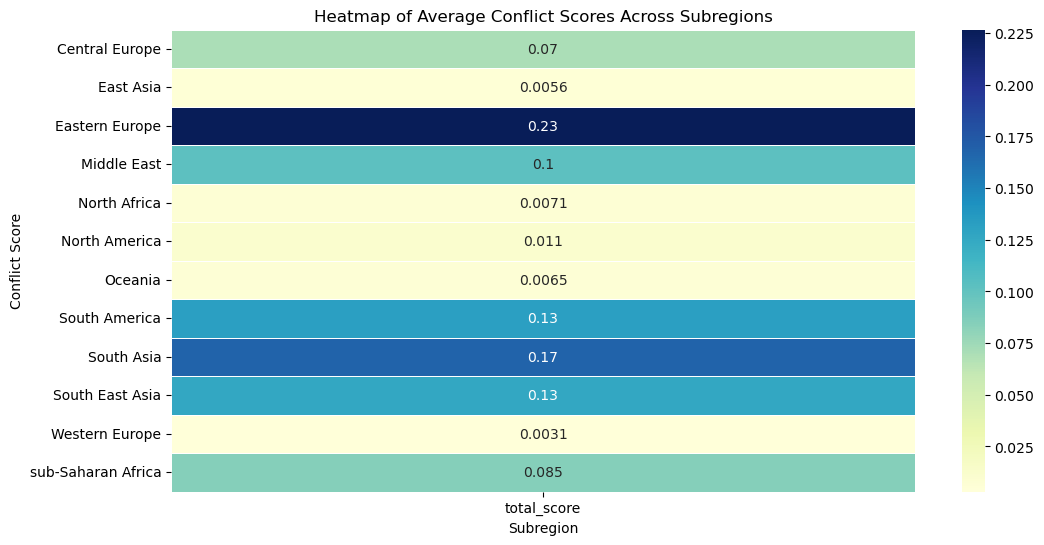

In [485]:
# Creating Heatmap for Conflict Scores Across Subregions
conflict_pivot = df.pivot_table(values='total_score', index='Original_Subregion', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(conflict_pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Average Conflict Scores Across Subregions")
plt.xlabel("Subregion")
plt.ylabel("Conflict Score")
plt.show()

The heatmap shows the average conflict scores across different subregions. Each subregion is represented by its respective average conflict score, visually indicated by the color gradient, with darker colors representing higher conflict levels. Let’s summarize and analyze the findings:

**Summary of Observations**:
- **High Conflict Subregions**:

Eastern Europe shows the highest conflict score with a value of 0.23, represented by the darkest shade on the heatmap.
South Asia also shows a relatively high conflict score (0.17), indicating moderate to high levels of conflict intensity in this subregion.
These regions appear in darker shades, implying higher conflict intensities compared to other subregions.
- **Moderate Conflict Subregions**:

Middle East has an average conflict score of 0.1, indicating a significant, though moderate, conflict level.
South America and South East Asia both have scores of 0.13, showing moderate conflict situations.
These regions have conflict levels slightly below that of Eastern Europe and South Asia, suggesting that while conflict is present, it may not be as widespread or severe.
- **Low Conflict Subregions**:

Central Europe, sub-Saharan Africa, North America, North Africa, East Asia, Western Europe, and Oceania show low conflict scores, ranging from 0.0031 to 0.085.
East Asia and Western Europe have notably low conflict scores (0.0056 and 0.0031 respectively), suggesting these regions are relatively peaceful.
The lightest colors on the heatmap correspond to these regions, indicating the relatively low intensity of conflict across these subregions.

##### **Key Insights**:
- **Eastern Europe as the Highest Conflict Region**:

Eastern Europe has the highest average conflict score (0.23), which is consistent with the ongoing geopolitical tensions in this subregion. The presence of conflict in places like Ukraine and other parts of Eastern Europe has led to increased conflict metrics, hence the darker shade in the heatmap.
The elevated conflict score in Eastern Europe could be driven by both interstate conflicts and political instability.

- **South Asia and Middle East**:

South Asia also stands out with a higher conflict score (0.17), which can be attributed to several ongoing issues, including territorial disputes, internal insurgencies, and political instability in countries such as Afghanistan and Pakistan.
The Middle East also shows a moderate conflict level (0.1). This aligns with the ongoing conflicts and tensions in countries such as Syria, Yemen, and other parts of the Middle East, which contribute to a sustained level of conflict in this region.

- **Relatively Low Conflict in Other Subregions**:

Subregions like North America, Western Europe, and East Asia display very low average conflict scores, which is indicative of their stability and security. These regions benefit from strong political institutions, alliances (such as NATO), and relatively fewer active conflicts.
Oceania and North Africa also show minimal conflict, suggesting a relatively stable environment despite some regional challenges.

- **Sub-Saharan Africa and Central Europe**:

sub-Saharan Africa and Central Europe show average conflict scores of 0.085 and 0.07, respectively. Although sub-Saharan Africa is known for local conflicts and instability, it appears that the conflicts are more localized rather than pervasive across the entire subregion.
Central Europe shows a low conflict score, which suggests that the region is largely peaceful despite some nearby geopolitical tensions.

##### **Reasoning**:
The color gradient in the heatmap effectively highlights the geographical disparities in conflict intensity. Darker colors show higher conflict levels, which are mainly seen in Eastern Europe, South Asia, and South America.
Economic and Geopolitical Factors likely play a significant role in these differences:
Eastern Europe and South Asia are characterized by both ongoing conflicts and territorial disputes, which contribute to their higher scores.
Western Europe, North America, and East Asia, on the other hand, are largely peaceful, benefiting from stronger governance and collective security agreements that contribute to a lower average conflict score.
Moderate Conflict Regions like South America, South East Asia, and the Middle East indicate that while these subregions are not entirely stable, conflict is generally not as widespread or severe as in Eastern Europe.

**Conclusions**:
Eastern Europe and South Asia have the highest conflict levels among all the subregions, suggesting greater geopolitical instability.
Western Europe, North America, and East Asia show the lowest conflict scores, indicating strong stability and minimal conflict.
The Middle East continues to display moderate conflict levels, which reflect the ongoing issues and conflicts in the region.

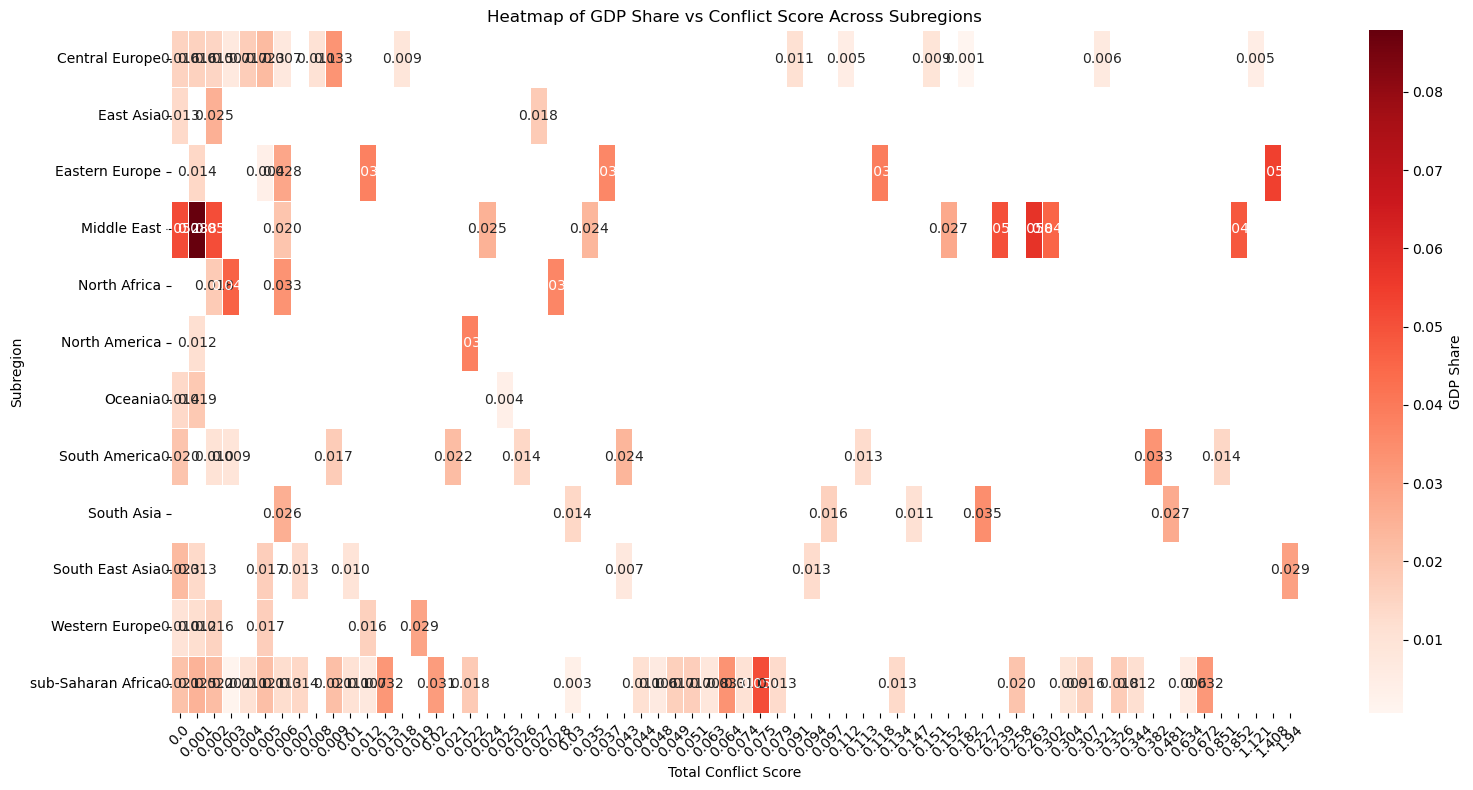

In [486]:
# Creating Heatmap for GDP Share vs Conflict 
gdp_conflict_pivot = df.pivot_table(values='Expenditure-Share_of_GDP', index='Original_Subregion', columns='total_score', aggfunc='mean')
plt.figure(figsize=(16, 8))
sns.heatmap(gdp_conflict_pivot, annot=True, cmap='Reds', linewidths=0.5, fmt='.3f', cbar_kws={'label': 'GDP Share'})
plt.title("Heatmap of GDP Share vs Conflict Score Across Subregions")
plt.xlabel("Total Conflict Score")
plt.ylabel("Subregion")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The heatmap illustrates the relationship between GDP Share dedicated to military expenditure and Conflict Score across various subregions. Each cell represents the average GDP share for a given conflict score within a particular subregion, with the color indicating the magnitude (from lighter to darker red). Let’s analyze this visualization and provide a summary:

**Summary of Observations**

- **General Trends**:
The heatmap indicates that there is variation in the GDP share dedicated to military expenditure across different conflict levels and subregions.
Darker shades of red indicate a higher percentage of GDP spent on defense in response to increasing conflict scores, whereas lighter shades indicate a lower GDP allocation to defense spending.
The variation across subregions suggests that regional economic and security circumstances affect how much a country chooses to allocate its GDP towards military spending in response to conflict.

- **Subregions with High GDP Share in Response to Conflict**:

    - **Middle East**: The Middle East shows relatively high levels of GDP being allocated to military expenditure, especially as conflict scores increase. This is represented by the darker red shades, particularly in the 0.1 - 0.5 conflict score range.

    This is consistent with the geopolitical instability in the region, where countries often have to spend a significant proportion of their GDP on defense to respond to regional conflicts and perceived threats.
    
    - **Eastern Europe**: Similarly, Eastern Europe displays significant increases in GDP share in the face of rising conflict scores, particularly around 0.23. This can be attributed to ongoing tensions and geopolitical issues, such as those related to border security and conflicts in regions like Ukraine.

    - **North Africa and South Asia**: These subregions also show a noticeable increase in GDP share as conflict levels rise, particularly in scores between 0.03 - 0.05 for North Africa and 0.02 - 0.03 for South Asia. These areas are often subject to political instability, insurgencies, and regional tensions, prompting governments to allocate higher portions of their GDP towards military spending.

- **Subregions with Consistently Low Defense Spending**:

Western Europe, East Asia, North America, and Oceania show consistently lower levels of GDP share dedicated to military spending, even as conflict scores increase. The light colors for these regions indicate that the overall expenditure as a percentage of GDP remains low despite varying conflict levels.
This reflects the generally stable security environments in these subregions, where countries do not need to allocate a significant portion of their GDP to military expenditure due to strong governance, stability, and often being part of defense alliances like NATO.
Central Europe and sub-Saharan Africa show lower military spending as a percentage of GDP, even at higher conflict scores. This may reflect economic constraints or strategic decisions to prioritize non-military investments.

- **Subregion-Specific Observations**:

South America: The heatmap shows moderate increases in GDP share in response to conflict in South America, especially as the conflict score reaches 0.1. However, these levels remain relatively low compared to other subregions like the Middle East.
South East Asia: South East Asia has moderate allocations, with GDP share rising slightly with higher conflict scores, indicating some sensitivity to conflict but generally remaining more stable compared to high-conflict subregions.

**Key Insights**:

- **Regional Differences in Defense Spending as a Function of Conflict**:

The Middle East and Eastern Europe show the highest sensitivity to conflict scores, as indicated by the higher GDP allocations (darker red shades). This suggests that countries in these regions are willing to increase military expenditure as a response to heightened conflict levels.

Subregions like Western Europe and North America show less variation and consistently low GDP shares allocated to defense, implying that their defense budgets are less responsive to conflict intensity, likely due to stable security environments and effective alliances.

- **Economic Constraints and Prioritization**:

Some subregions, such as sub-Saharan Africa, despite experiencing conflict, have low GDP allocations for defense. This may be attributed to economic constraints where countries cannot afford significant military expenditure, even in the face of conflict. On the other hand, the Middle East uses its oil wealth to sustain high defense budgets, reflecting the prioritization of security given the region's volatility.

- **Influence of Alliances and Stability**:

Western Europe, being largely part of NATO, shows minimal changes in GDP share across various conflict scores. This suggests that countries in this region can maintain a stable defense posture without drastically changing their spending habits, benefiting from collective security mechanisms. In contrast, regions like Eastern Europe are more directly affected by geopolitical tensions, leading to more significant GDP allocations to defense.

**Conclusion**:
The heatmap provides a clear indication of how different subregions respond to conflict in terms of their military expenditure as a share of GDP. Subregions experiencing higher geopolitical instability (e.g., Middle East, Eastern Europe) tend to allocate more of their economic output towards defense as conflict scores rise.
Stable regions like Western Europe, North America, and Oceania are less likely to increase their GDP share for military purposes, relying instead on established security measures and alliances.
The variability across subregions can be attributed to economic capacity, strategic prioritization, and regional security dynamics, highlighting that defense spending in response to conflict is influenced by both internal economic factors and external threats.

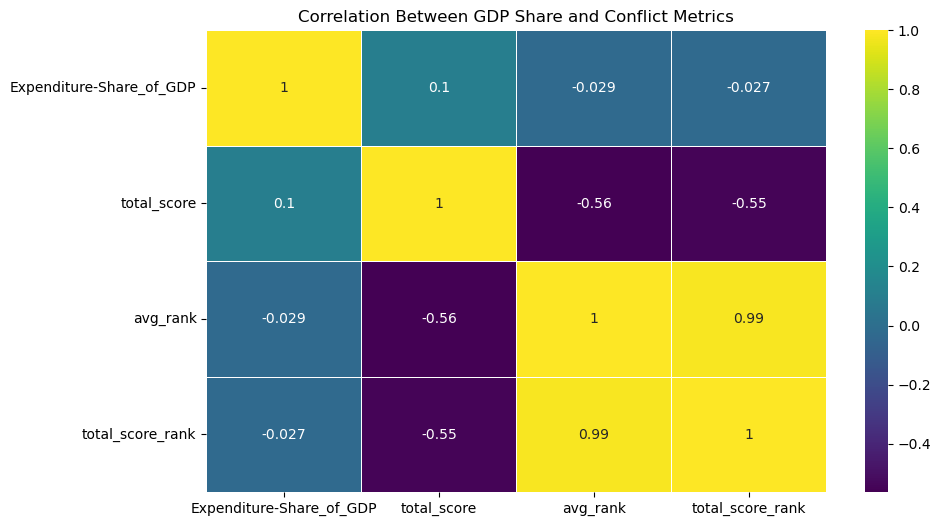

In [487]:
# Analyzing Correlations Between GDP and Conflict
gdp_conflict_corr = df[['Expenditure-Share_of_GDP', 'total_score', 'avg_rank', 'total_score_rank']]
plt.figure(figsize=(10, 6))
sns.heatmap(gdp_conflict_corr.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Between GDP Share and Conflict Metrics")
plt.show()

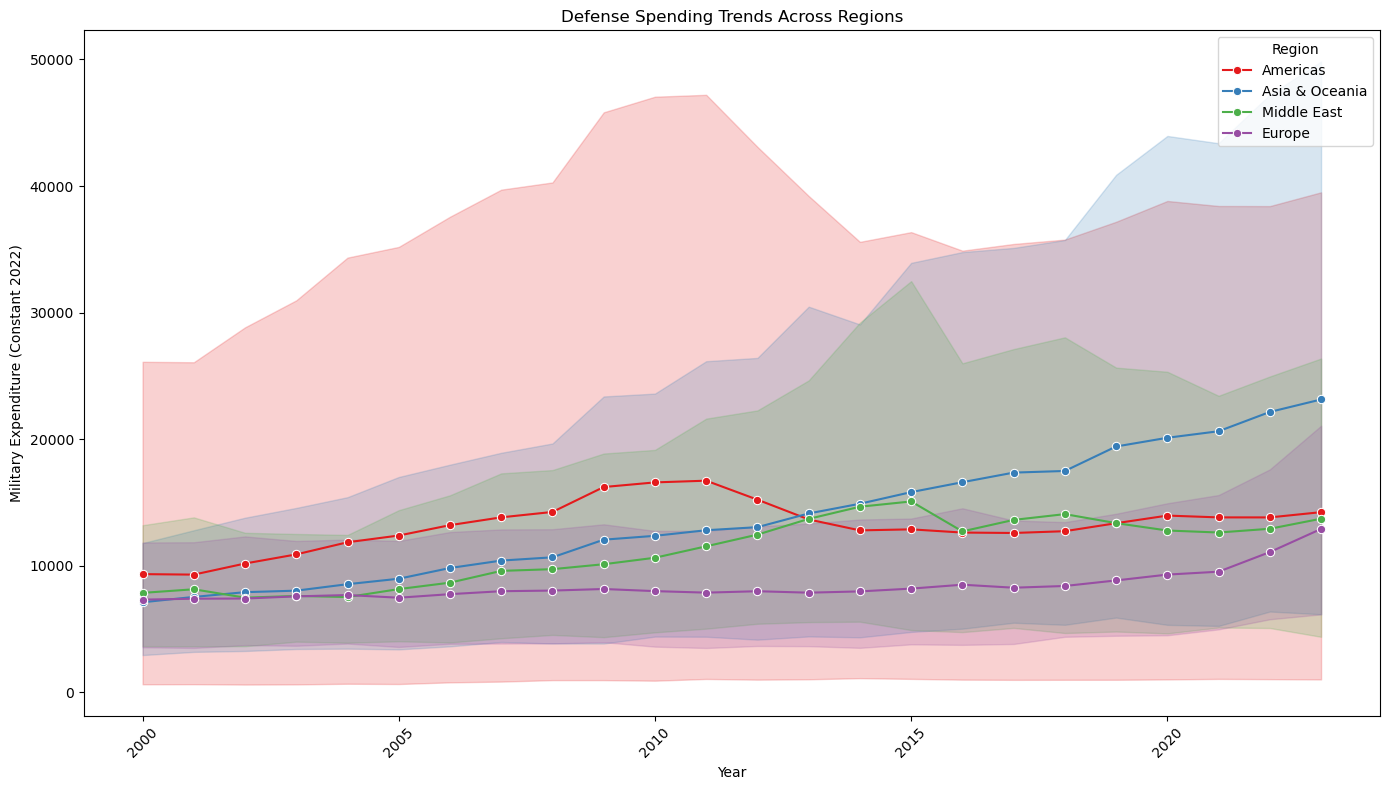

In [488]:
# Visualizing Defense Spending Trends Across Regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Expenditure_Constant_2022', hue='Original_Region', marker='o', palette='Set1')
plt.title("Defense Spending Trends Across Regions")
plt.xlabel("Year")
plt.ylabel("Military Expenditure (Constant 2022)")
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

- **Americas (Red Line)**:
The Americas shows consistently high defense spending, which is unsurprising given the significant contribution from the United States.
The trend line is relatively stable with a slight increase over time, indicating that military budgets in the Americas have been sustained at high levels, with some minor fluctuations.

- **Americas (Red Area)**:
The Americas have a relatively wide shaded area, which indicates that there are significant fluctuations or variability in military spending. This could be due to factors such as policy changes, budget reallocation, or responses to global or regional events. The shaded area also reflects occasional peaks, which could be due to increased defense budgets during particular years, possibly driven by major military campaigns or increased security needs.

- **Asia & Oceania (Blue Line)**:
The Asia & Oceania region has shown a gradual increase in defense spending, especially from around 2010 onwards. This growth may reflect the increasing defense budgets of countries like China, India, and other countries in the region focusing on enhancing their military capabilities.
The expenditure is now one of the highest among the regions, indicating significant growth and a focus on security in recent years.

- **Asia & Oceania (Blue Area)**:
The Asia & Oceania region also has a noticeable shaded area, which implies some variability in the defense spending. As military budgets have grown over the years, there might be a broader range of investments made by individual countries, contributing to this variability.

- **Middle East (Green Line)**:
The Middle East shows a significant and rapid rise in defense spending from 2005 onwards, reaching a peak around 2015.
This rise can be attributed to regional conflicts, geopolitical instability, and the increasing militarization of countries like Saudi Arabia, United Arab Emirates, and other Gulf nations. However, post-2015, spending levels seem to stabilize or even slightly decrease, reflecting adjustments to the changing geopolitical landscape.

- **Middle East (Green Area)**:
The Middle East shows significant variability, especially during the peak years between 2005 and 2015. The wide shaded area suggests that defense budgets in this region can fluctuate sharply, likely due to the dynamic and often volatile geopolitical environment. Changes in government, oil revenues, and direct involvement in conflicts are factors that can result in high spending variation.

- **Europe (Purple Line)**:
Europe shows relatively stable defense spending with a gradual but slow increase over the years.
European countries are part of alliances such as NATO, and the spending here reflects moderate growth in military budgets, influenced by both internal and external security considerations.

- **Europe (Purple Area)**:
The shaded area for Europe is relatively narrow, which suggests lower variability in defense spending. This indicates that defense spending in Europe has been more consistent over time, potentially due to shared NATO obligations and a stable political and economic environment. This consistency in spending reflects the European countries' focus on stability and reliance on collective security measures rather than fluctuating individual defense budgets.


- **Significant Growth in Asia & Oceania**:
The most noticeable trend is the steady and steep rise in Asia & Oceania's military expenditure. This trend suggests an increased emphasis on military modernization and preparedness in response to regional security threats, such as territorial disputes in the South China Sea, and the growing influence of China.
The growth in expenditure reflects broader strategic goals of many Asian countries to strengthen their military forces and play a more significant role in global security.

- **Stability in Americas**:
The Americas maintains a high level of defense spending, which is largely driven by the United States, the country with one of the largest military budgets globally.
The stable trend suggests a consistent focus on maintaining a high level of military readiness and sustaining a broad military presence globally.

- **Surge in the Middle East**:
The sharp increase in Middle Eastern defense spending from 2005 to 2015 coincides with several conflicts and rising tensions in the region, including the conflicts in Iraq, Syria, and Yemen.
This spike reflects the strategic need for regional countries to bolster their military capabilities during a time of increased instability, proxy wars, and changing power dynamics.

- **Moderate Spending in Europe**:

Europe's relatively stable trend in defense spending, with only a modest increase, likely reflects a balance between maintaining adequate defense capabilities and focusing on economic challenges.
The influence of collective defense agreements, like NATO, allows many European countries to manage their individual defense spending without significant yearly increases.

**Geopolitical and Economic Context**

- **Geopolitical Threats and Rivalries**:
The rise in military spending across Asia & Oceania and the Middle East can be linked to perceived threats, increased territorial disputes, and the strategic desire to gain influence in the region. As China expands its capabilities, neighboring countries such as India and Japan have responded by increasing their defense budgets.
In the Middle East, spending is heavily influenced by geopolitical rivalries, particularly between Saudi Arabia and Iran, and the ongoing need to manage internal and regional security threats.

- **Economic Capacity**:
Defense spending trends are also closely linked to economic capacity. For example, the United States has a vast economic base that allows it to sustain high defense budgets, while Middle Eastern countries benefit from oil revenues that fund their military expenditures.
In Europe, defense spending has been impacted by economic policies, and member countries rely heavily on NATO partnerships rather than dramatic increases in their individual defense budgets.

- **Regional Alliances**:
The influence of alliances like NATO in Europe has kept military expenditure moderate. Shared resources and collective security arrangements mean that European countries can maintain lower defense budgets without compromising their security posture.

**Key Takeaways**:
Asia & Oceania and the Middle East exhibit strong upward trends in defense spending, reflecting rising tensions and efforts to enhance military capabilities.
Americas maintains consistently high levels of military expenditure, driven by the United States, showing the emphasis on global military presence and readiness.
Europe shows moderate increases in defense spending, indicating a stable approach focused on gradual improvements rather than rapid militarization.

<a id='analysiskmeans'></a>
### 8.2 Unsupervised Learning using K-Means Clustering

1. **Optimal Clustering Method**:
    - KMeans emerged as the best clustering method for this dataset due to its high clustering quality:
        - Silhouette Score: ~0.99 (indicating strong cohesion and separation).
        - Davies-Bouldin Score: ~0.19 (indicating compact and distinct clusters).
    - Agglomerative Hierarchical Clustering provided similar results and offered additional insights into hierarchical relationships but lacked computational efficiency for large datasets.

1. **Cluster Insights**:
    - Cluster 1: High-Spending, Stable Nations:
        - Includes economically advanced countries with high GDP and military budgets (e.g., the US, China).
        - These nations have low conflict metrics, reflecting political and economic stability.
    - Cluster 2: Moderate-Spending, Conflict-Prone Nations:
        - Developing or emerging economies with moderate spending but high conflict involvement (e.g., regions in political instability).
    - Cluster 3: Low-Spending, Low-Conflict Nations:
        - Represents smaller or economically weaker nations with minimal conflict involvement and low defense budgets.
    - Cluster 4: Conflict-Heavy, Disproportionate Spending:
        - Outliers with high conflict metrics but relatively disproportionate military spending, often driven by regional instability (e.g., conflict-heavy regions in the Middle East or Africa).

1. **Impact of Dimensionality Reduction**:
    - PCA reduced the dataset to two components:
    - Principal Component 1 (Economic Metrics): Dominated by "GDP", "GovtSpending", and "PerCapita", reflecting economic power.
    - Principal Component 2 (Conflict Metrics): Influenced by "Deadliness", "TotalScore", and "Fragmentation", highlighting conflict levels.
    - The reduction preserved most of the dataset's variance, enabling efficient clustering without significant loss of information.

1. **Effectiveness of Hyperparameter Tuning**:
    - KMeans:
        - "k-means++" initialization was crucial for consistently high-quality clusters.
        - Silhouette and Davies-Bouldin Scores validated the choice of 4 clusters.

1. **Policy and Strategy Insights**:
    - Global Patterns:

        - Cluster 1 (Wealthy, Stable Nations): Focus on maintaining influence and stability.
        - Cluster 2 (Conflict-Prone Nations): Require targeted interventions and international aid to address instability.
        - Cluster 3 (Low-Spending Nations): Support in economic development and defense partnerships.
        - Cluster 4 (Conflict-Heavy Nations): Prioritize conflict resolution and peacekeeping efforts.
    - Outliers:

        - Outliers in Cluster 4 highlight countries where disproportionate military spending or conflict metrics skew standard patterns, warranting tailored policy responses.
    - Validation:

        - The high Silhouette Scores and cluster compactness suggest the dataset is well-suited for clustering, with 4 clusters offering a clear, interpretable segmentation.

<a id='conclusion'></a>
## 9. Conclusion:
---

The project successfully combined SIPRI and ACLED data, demonstrating the potential of AI to analyze and forecast military expenditures. The integration of these datasets provided a comprehensive view of the relationship between conflict dynamics and defense spending. There were several strengths and limitations in this project. Some of the strengths are robust model performance, particularly in conflict-prone regions. and effective integration of disparate datasets, offering unique insights into geopolitical trends. Some of the limitations are that ACLED's reliance on reported events introduces potential biases, as some conflicts may be underreported. SIPRI’s annual data limits granularity, potentially missing intra-year variations in spending. Acknowledging the strengths and limitations can provide an avenue for future project direction such as applying additional data sources, such as trade data or economic indicators, to enhance the analysis. 

This project highlights the value of AI in guiding strategic decision-making within the defense industry. By leveraging SIPRI and ACLED data, the study provides actionable insights into global defense spending trends and their relationship with conflicts. These findings establish a foundation for defense manufacturers to target emerging markets and allocate resources more effectively. The results validate the utility of AI in forecasting and underscore its potential for addressing complex, real-world challenges in the defense sector. Future research could expand on this foundation, integrating additional data sources and exploring more advanced techniques to further improve predictive accuracy and strategic insights.


<a id='recommendations'></a>
## 10. Recommendations:
---

To build on the findings of this study, we recommend incorporating additional datasets, such as World Bank indicators for economic factors and regional alliances, to enhance the predictive model. To increase granularity, expand the timeframe to use quarterly or monthly data where available capture finer trends in military expenditures and conflict dynamics. To improve pattern recognition, explore advanced AI techniques such as the use of deep learning models, such as LSTMs or transformer-based models. To address reporting bias, we need to cross-reference with other conflict data sources to account for potential biases in the ACLED dataset. Additionally, further data preprocessing on features, such as binning for the region and sub-region features, would aid more robust evaluations of regionality within the models.

To improve clustering performance for this dataset, the focus should be on feature selection that is relevant and captures key economic and conflict metrics while reducing redundancy-for example, removing highly correlated features like GovtSpending and GDP. Further, apply advanced dimensionality reduction techniques such as Kernel PCA or UMAP to uncover nonlinear relationships. Perform hyperparameter optimization, such as eps for DBSCAN or n_clusters for K-Means, to yield better cluster cohesion and separation. Further, incorporate ensemble clustering methods to leverage the strengths of multiple algorithms and handle noise effectively. Validation of clusters with external data and exploration of temporal patterns could further refine insights and provide actionable outcomes for global military spending patterns.

These recommendations aim to improve the robustness and applicability of the analysis, ensuring that future iterations of the project provide even deeper insights for strategic decision-making.

<a id='references'></a>
## 11. References:
---

Armed Conflict Location & Event Data Project. (2024). ACLED conflict index: Ranking violent conflict levels across the world. Retrieved from https://acleddata.com/conflict-index/

Breiman, L. (2001). Random forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324

ChatGPT (2024). GPT-4o version, OpenAI. [Large language model]. Retrieved from https://chatgpt.com/

Friedman, J. H. (2001). Greedy function approximation: A gradient boosting machine. Annals of Statistics, 29(5), 1189–1232. https://doi.org/10.1214/aos/1013203451

Gelman, A., & Hill, J. (2006). Data analysis using regression and multilevel/hierarchical models. Cambridge University Press.

Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media.

Hyndman, R. J., & Athanasopoulos, G. (2021). Forecasting: Principles and practice (3rd ed.). OTexts. Retrieved from https://otexts.com/fpp3/

Scikit-learn. (n.d.). Supervised learning. Retrieved from https://scikit-learn.org/stable/supervised_learning.html

Scikit-learn. (n.d.). Linear regression. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Scikit-learn. (n.d.). Ridge regression. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Scikit-learn. (n.d.). GradientBoostingRegressor. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Scikit-learn. (n.d.). CountVectorizer. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Scikit-learn. (n.d.). Train-test split. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Stockholm International Peace Research Institute. (n.d.). SIPRI military expenditure database: Military expenditure data by country from 1949. Retrieved from https://www.sipri.org/sites/default/files/SIPRI-Milex-data-1948-2023.xlsx

Taylor, S. J., & Letham, B. (2018). Forecasting at Scale. The American Statistician, 72(1), 37–45. https://doi.org/10.1080/00031305.2017.1380080

Tukey, J. W. (1977). Exploratory Data Analysis. Pearson.

Bholowalia, P., & Kumar, A. (2014). EBK-Means: A clustering technique based on elbow method and k-means in WSN. International Journal of Computer Applications, 105(9), 17-24. https://doi.org/10.5120/18405-9674

MacQueen, J. (1967). Some methods for classification and analysis of multivariate observations. Proceedings of the Fifth Berkeley Symposium on Mathematical Statistics and Probability, Volume 1: Statistics, 281–297.

Reynolds, D. A. (2009). Gaussian Mixture Models. Encyclopedia of Biometrics, 659–663. https://doi.org/10.1007/978-0-387-73003-5_196

Lloyd, S. (1982). Least squares quantization in PCM. IEEE Transactions on Information Theory, 28(2), 129-137. https://doi.org/10.1109/TIT.1982.1056489

Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996). A density-based algorithm for discovering clusters in large spatial databases with noise. In Proceedings of the 2nd International Conference on Knowledge Discovery and Data Mining (pp. 226-231).

Ward, J. H. (1963). Hierarchical grouping to optimize an objective function. Journal of the American Statistical Association, 58(301), 236-244. https://doi.org/10.1080/01621459.1963.10500845

Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(1), 281-305.